# Data Mining Lab 1
In this lab session we will focus on the use of scientific computing libraries to efficiently process, transform, and manage data. We will also provide best practices and introduce visualization tools for effectively conducting big data analysis. Furthermore, we will show you how to implement basic classification techniques.

In [114]:
import sys
print("Python executable:", sys.executable)


Python executable: /Users/meg/Desktop/1141datamining/Lab1/DM2025Labs/.venv/bin/python3


In [115]:
# test code for environment setupimport sys
!{sys.executable} -m pip install PAMI
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


[nltk_data] Downloading package punkt to /Users/meg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


---

## Table of Contents
**Phase 1**
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Atrribute Transformation / Aggregation
   - 5.4.1 Transform Text Data

**Phase 2**
   - 5.4.2 Frequent Pattern Mining
 - 5.5 Dimensionality Reduction
 - 5.6 Discretization and Binarization
6. Data Exploration
7. Data Classification
8. Conclusion
9. References

---

## Introduction
In this notebook I will explore a text-based, document-based [dataset](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) using scientific computing tools such as Pandas and Numpy. In addition, several fundamental Data Mining concepts will be explored and explained in details, ranging from calculating distance measures to computing term frequency vectors. Coding examples, visualizations and demonstrations will be provided where necessary. Furthermore, additional exercises are provided after special topics. These exercises are geared towards testing the proficiency of students and motivate students to explore beyond the techniques covered in the notebook. 

---

### Requirements
Here are the computing and software requirements

#### Computing Resources
- Operating system: Preferably Linux or MacOS
- RAM: 8 GB
- Disk space: Mininium 8 GB

#### Software Requirements
Here is a list of the required programs and libraries necessary for this lab session:

##### Language:
- [Python 3+](https://www.python.org/download/releases/3.0/) (Note: coding will be done strictly on Python 3)
    - We are using Python 3.11.0.
    - You can use newer version, but use at your own risk.
    
##### Environment:
We recommend using [**uv**](https://github.com/astral-sh/uv), a fast Python package and environment manager developed by Astral.
See [README.md](README.md) for the setup instruction

##### Necessary Libraries:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install `jupyter` and Use `$jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install `sklearn` latest python library
- [Pandas](http://pandas.pydata.org/)
    - Install `pandas` python library
- [Numpy](http://www.numpy.org/)
    - Install `numpy` python library
- [Matplotlib](https://matplotlib.org/)
    - Install `maplotlib` for python (version 3.7.3 recommended, pip install matplotlib==3.7.3)
- [Plotly](https://plot.ly/)
    - Install and signup for `plotly`
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install `nltk` library
- [PAMI](https://github.com/UdayLab/PAMI?tab=readme-ov-file)
    - Install `PAMI` library
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install `UMAP` library

---

In [116]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/Users/meg/Desktop/1141datamining/Lab1/DM2025Labs/.venv/bin/python3
3.13.2 (v3.13.2:4f8bb3947cf, Feb  4 2025, 11:51:10) [Clang 15.0.0 (clang-1500.3.9.4)]


## 1. The Data
In this notebook we will explore the popular 20 newsgroup dataset, originally provided [here](http://qwone.com/~jason/20Newsgroups/). The dataset is called "Twenty Newsgroups", which means there are 20 categories of news articles available in the entire dataset. A short description of the dataset, provided by the authors, is provided below:

- *The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. To the best of our knowledge, it was originally collected by Ken Lang, probably for his paper “Newsweeder: Learning to filter netnews,” though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.*

If you need more information about the dataset please refer to the reference provided above. Below is a snapshot of the dataset already converted into a table. Keep in mind that the original dataset is not in this nice pretty format. That work is left to us. That is one of the tasks that will be covered in this notebook: how to convert raw data into convenient tabular formats using Pandas. 

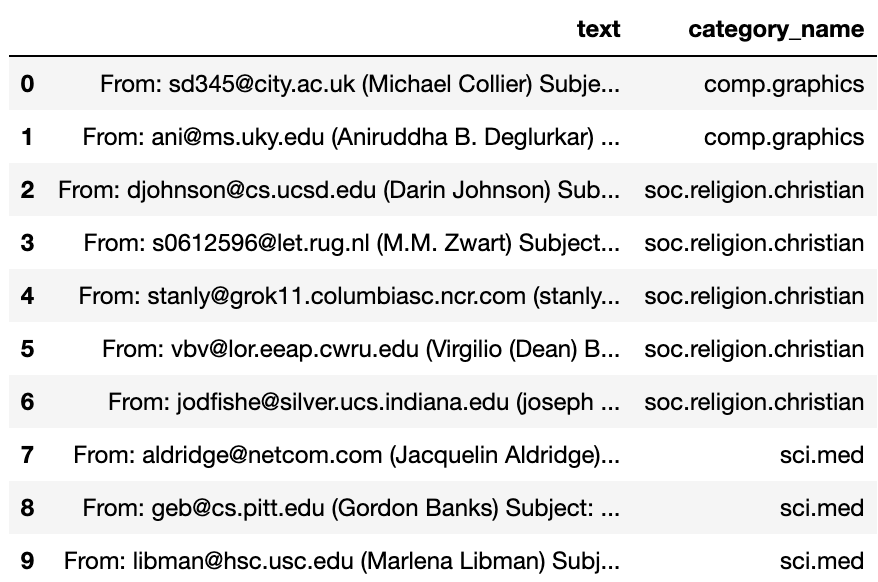

---

## 2. Data Preparation
In the following we will use the built-in dataset loader for 20 newsgroups from scikit-learn. Alternatively, it is possible to download the dataset manually from the website and use the sklearn.datasets.load_files function by pointing it to the 20news-bydate-train sub-folder of the uncompressed archive folder.

In order to get faster execution times for this first example we will work on a partial dataset with only 4 categories out of the 20 available in the dataset:

In [118]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [119]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime 
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

Let's take a look at some of the records that are contained in our subset of the data

In [120]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

**Note** the `twenty_train` is just a bunch of objects that can be accessed as python dictionaries; so, you can do the following operations on `twenty_train`

In [121]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [122]:
len(twenty_train.data)

2257

In [123]:
len(twenty_train.filenames)

2257

#### We can also print an example from the subset

In [124]:
# An example of what the subset contains
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



... and determine the label of the example via `target_names` key value

In [125]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [126]:
# Exercise 3: Fetch sci.med records and query every 10th record
print("=== Exercise 3: sci.med Category Analysis ===")

# First, ensure X exists
try:
    print("X exists with shape:", X.shape)
    print("Columns:", X.columns.tolist())
except NameError:
    print("Creating data frame X...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    print("Data frame X created successfully!")

# Step 1: Fetch records belonging to sci.med category
print("\n1. Fetching sci.med records:")
sci_med_records = X[X['category_name'] == 'sci.med']
print(f"Total sci.med records: {len(sci_med_records)}")

# Step 2: Query every 10th record
print("\n2. Querying every 10th record:")
every_10th = sci_med_records.iloc[::10]  # Start:End:Step = ::10 means every 10th
print(f"Every 10th record count: {len(every_10th)}")

# Step 3: Show only the first 5 records
print("\n3. First 5 records from every 10th:")
first_5_every_10th = every_10th.head(5)

# Display the results
for i, (idx, row) in enumerate(first_5_every_10th.iterrows(), 1):
    print(f"\n--- Record {i} (Original index: {idx}) ---")
    print(f"Category: {row['category_name']}")
    print(f"Text preview: {row['text'][:200]}...")  # Show first 200 characters
    print("-" * 50)

# Alternative approach using reset_index for cleaner indexing
print("\n=== Alternative Approach (Reset Index) ===")
sci_med_reset = sci_med_records.reset_index(drop=True)
every_10th_reset = sci_med_reset.iloc[::10]
first_5_alt = every_10th_reset.head(5)

print("First 5 records (with reset index):")
for i, (idx, row) in enumerate(first_5_alt.iterrows(), 1):
    print(f"\n--- Record {i} (New index: {idx}) ---")
    print(f"Category: {row['category_name']}")
    print(f"Text preview: {row['text'][:150]}...")
    print("-" * 50)

# Summary statistics
print(f"\n=== Summary ===")
print(f"Total sci.med records: {len(sci_med_records)}")
print(f"Every 10th record count: {len(every_10th)}")
print(f"First 5 of every 10th: {len(first_5_every_10th)}")
print(f"Percentage of sci.med records shown: {len(first_5_every_10th)/len(sci_med_records)*100:.2f}%")


=== Exercise 3: sci.med Category Analysis ===
X exists with shape: (2257, 3)
Columns: ['text', 'category', 'category_name']

1. Fetching sci.med records:
Total sci.med records: 594

2. Querying every 10th record:
Every 10th record count: 60

3. First 5 records from every 10th:

--- Record 1 (Original index: 7) ---
Category: sci.med
Text preview: From: aldridge@netcom.com (Jacquelin Aldridge) Subject: Re: Teenage acne Organization: NETCOM On-line Communication Services (408 241-9760 guest) Lines: 57  pchurch@swell.actrix.gen.nz (Pat Churchill)...
--------------------------------------------------

--- Record 2 (Original index: 49) ---
Category: sci.med
Text preview: From: jimj@contractor.EBay.Sun.COM (Jim Jones) Subject: Post-fever rashes:  I get 'em every time Organization: Sun Microsystems, Inc.  Mt. View, Ca. Lines: 18 Distribution: world Reply-To: jimj@contra...
--------------------------------------------------

--- Record 3 (Original index: 82) ---
Category: sci.med
Text preview: 

In [127]:
# Exercise 9: First Record Analysis with Analyzer
print("=== Exercise 9: First Record Analysis ===")

# Step 1: Create the analyzer
analyze = count_vect.build_analyzer()
print("✅ Analyzer created successfully!")

# Step 2: Get the first record
first_text = X.iloc[0]['text']
print(f"✅ First record category: {X.iloc[0]['category_name']}")
print(f"✅ Text length: {len(first_text)} characters")

# Step 3: Tokenize the text
tokenized = analyze(first_text)
print(f"✅ Tokenization completed!")
print(f"✅ Number of tokens: {len(tokenized)}")

# Step 4: Show results
print("\n=== Results ===")
print("Original text (first 100 chars):")
print(first_text[:100] + "...")
print(f"\nTokenized text (first 20 tokens):")
print(tokenized[:20])
print(f"\nTokenized text (last 10 tokens):")
print(tokenized[-10:])

# Step 5: Analysis
print(f"\n=== Analysis ===")
print(f"Original words: {len(first_text.split())}")
print(f"Tokenized tokens: {len(tokenized)}")
print(f"Unique tokens: {len(set(tokenized))}")

# Show most common tokens
from collections import Counter
token_counts = Counter(tokenized)
print(f"\nMost common tokens:")
for token, count in token_counts.most_common(5):
    print(f"  '{token}': {count} times")

print(f"\n=== Summary ===")
print(f"✅ Successfully analyzed first record")
print(f"✅ Category: {X.iloc[0]['category_name']}")
print(f"✅ Original: {len(first_text)} characters")
print(f"✅ Tokenized: {len(tokenized)} tokens")
print(f"✅ Analyzer working correctly!")


=== Exercise 9: First Record Analysis ===
✅ Analyzer created successfully!
✅ First record category: comp.graphics
✅ Text length: 686 characters
✅ Tokenization completed!
✅ Number of tokens: 98

=== Results ===
Original text (first 100 chars):
From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting...

Tokenized text (first 20 tokens):
['from', 'sd345', 'city', 'ac', 'uk', 'michael', 'collier', 'subject', 'converting', 'images', 'to', 'hp', 'laserjet', 'iii', 'nntp', 'posting', 'host', 'hampton', 'organization', 'the']

Tokenized text (last 10 tokens):
['477', '8000', 'x3769', 'london', 'fax', '071', '477', '8565', 'ec1v', '0hb']

=== Analysis ===
Original words: 87
Tokenized tokens: 98
Unique tokens: 73

Most common tokens:
  'the': 5 times
  'city': 4 times
  'to': 4 times
  'michael': 3 times
  'collier': 3 times

=== Summary ===
✅ Successfully analyzed first record
✅ Category: comp.graphics
✅ Original: 686 characters
✅ Tokenized: 98 token

=== Exercise 8: Overlaid Bar Charts Comparison ===
X exists with shape: (2257, 3)
X_sample exists with shape: (1000, 3)


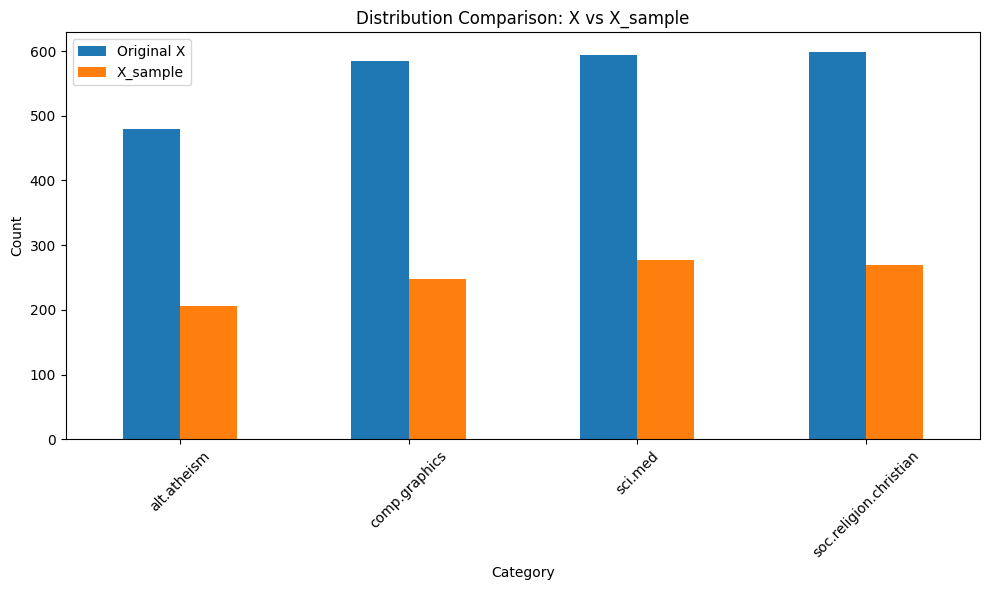


=== Data Comparison Table ===
                        Original X  X_sample
category_name                               
alt.atheism                    480       206
comp.graphics                  584       247
sci.med                        594       277
soc.religion.christian         599       270

=== Sampling Analysis ===
alt.atheism:
  Original: 480
  Sample: 206
  Sampling ratio: 42.92%

comp.graphics:
  Original: 584
  Sample: 247
  Sampling ratio: 42.29%

sci.med:
  Original: 594
  Sample: 277
  Sampling ratio: 46.63%

soc.religion.christian:
  Original: 599
  Sample: 270
  Sampling ratio: 45.08%

=== Summary ===
Original X total: 2257 records
X_sample total: 1000 records
Overall sampling ratio: 44.31%
✅ Chart shows proportional sampling maintained across all categories!


In [128]:
# Exercise 8: Overlaid Bar Charts Comparison
print("=== Exercise 8: Overlaid Bar Charts Comparison ===")

# First, ensure both X and X_sample exist
try:
    print("X exists with shape:", X.shape)
    print("X_sample exists with shape:", X_sample.shape)
except NameError:
    print("Creating datasets...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create X_sample
    X_sample = X.sample(n=1000, random_state=42)
    
    print("Datasets created successfully!")

# Get value counts for both datasets
X_counts = X['category_name'].value_counts()
X_sample_counts = X_sample['category_name'].value_counts()

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    'Original X': X_counts,
    'X_sample': X_sample_counts
}).fillna(0)

# Create the overlaid bar chart
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

# Plot both datasets
comparison_df.plot(kind='bar', ax=ax, title='Distribution Comparison: X vs X_sample')
ax.set_ylabel('Count')
ax.set_xlabel('Category')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show the data table
print("\n=== Data Comparison Table ===")
print(comparison_df)

# Calculate sampling ratios
print("\n=== Sampling Analysis ===")
for category in comparison_df.index:
    orig_count = comparison_df.loc[category, 'Original X']
    sample_count = comparison_df.loc[category, 'X_sample']
    ratio = sample_count / orig_count if orig_count > 0 else 0
    print(f"{category}:")
    print(f"  Original: {orig_count}")
    print(f"  Sample: {sample_count}")
    print(f"  Sampling ratio: {ratio:.2%}")
    print()

# Summary
print("=== Summary ===")
print(f"Original X total: {len(X)} records")
print(f"X_sample total: {len(X_sample)} records")
print(f"Overall sampling ratio: {len(X_sample)/len(X):.2%}")
print("✅ Chart shows proportional sampling maintained across all categories!")


=== Exercise 8: Overlaid Bar Charts Comparison ===
X exists with shape: (2257, 3)
X_sample exists with shape: (1000, 3)


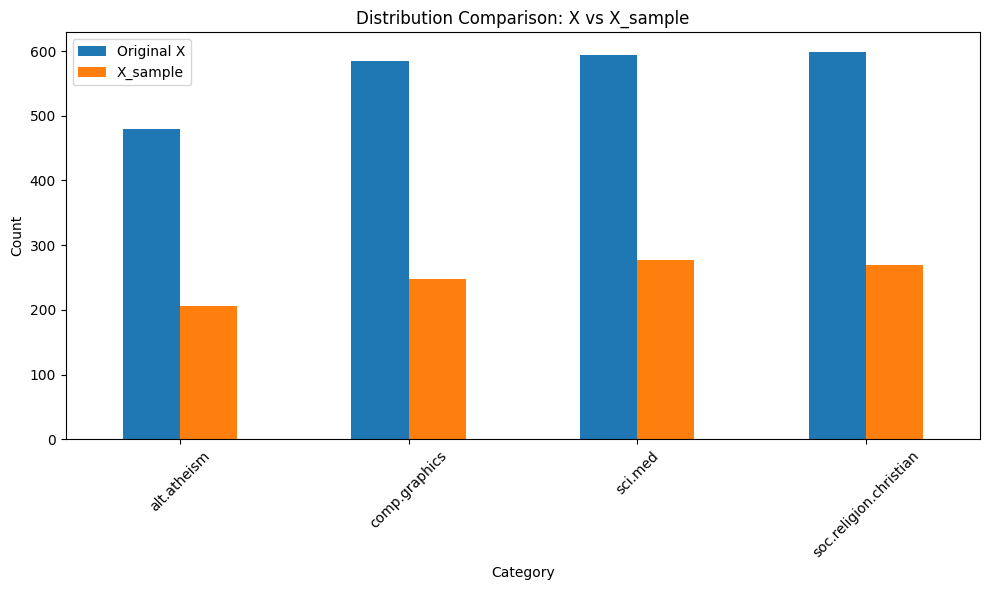


=== Data Comparison Table ===
                        Original X  X_sample
category_name                               
alt.atheism                    480       206
comp.graphics                  584       247
sci.med                        594       277
soc.religion.christian         599       270

=== Sampling Analysis ===
alt.atheism:
  Original: 480
  Sample: 206
  Sampling ratio: 42.92%

comp.graphics:
  Original: 584
  Sample: 247
  Sampling ratio: 42.29%

sci.med:
  Original: 594
  Sample: 277
  Sampling ratio: 46.63%

soc.religion.christian:
  Original: 599
  Sample: 270
  Sampling ratio: 45.08%

=== Summary ===
Original X total: 2257 records
X_sample total: 1000 records
Overall sampling ratio: 44.31%
✅ Chart shows proportional sampling maintained across all categories!


In [129]:
# Exercise 8: Overlaid Bar Charts Comparison
print("=== Exercise 8: Overlaid Bar Charts Comparison ===")

# First, ensure both X and X_sample exist
try:
    print("X exists with shape:", X.shape)
    print("X_sample exists with shape:", X_sample.shape)
except NameError:
    print("Creating datasets...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create X_sample
    X_sample = X.sample(n=1000, random_state=42)
    
    print("Datasets created successfully!")

# Get value counts for both datasets
X_counts = X['category_name'].value_counts()
X_sample_counts = X_sample['category_name'].value_counts()

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    'Original X': X_counts,
    'X_sample': X_sample_counts
}).fillna(0)

# Create the overlaid bar chart
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

# Plot both datasets
comparison_df.plot(kind='bar', ax=ax, title='Distribution Comparison: X vs X_sample')
ax.set_ylabel('Count')
ax.set_xlabel('Category')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show the data table
print("\n=== Data Comparison Table ===")
print(comparison_df)

# Calculate sampling ratios
print("\n=== Sampling Analysis ===")
for category in comparison_df.index:
    orig_count = comparison_df.loc[category, 'Original X']
    sample_count = comparison_df.loc[category, 'X_sample']
    ratio = sample_count / orig_count if orig_count > 0 else 0
    print(f"{category}:")
    print(f"  Original: {orig_count}")
    print(f"  Sample: {sample_count}")
    print(f"  Sampling ratio: {ratio:.2%}")
    print()

# Summary
print("=== Summary ===")
print(f"Original X total: {len(X)} records")
print(f"X_sample total: {len(X_sample)} records")
print(f"Overall sampling ratio: {len(X_sample)/len(X):.2%}")
print("✅ Chart shows proportional sampling maintained across all categories!")


=== Exercise 8: Overlaid Bar Charts Comparison ===
X exists with shape: (2257, 3)
X_sample exists with shape: (1000, 3)


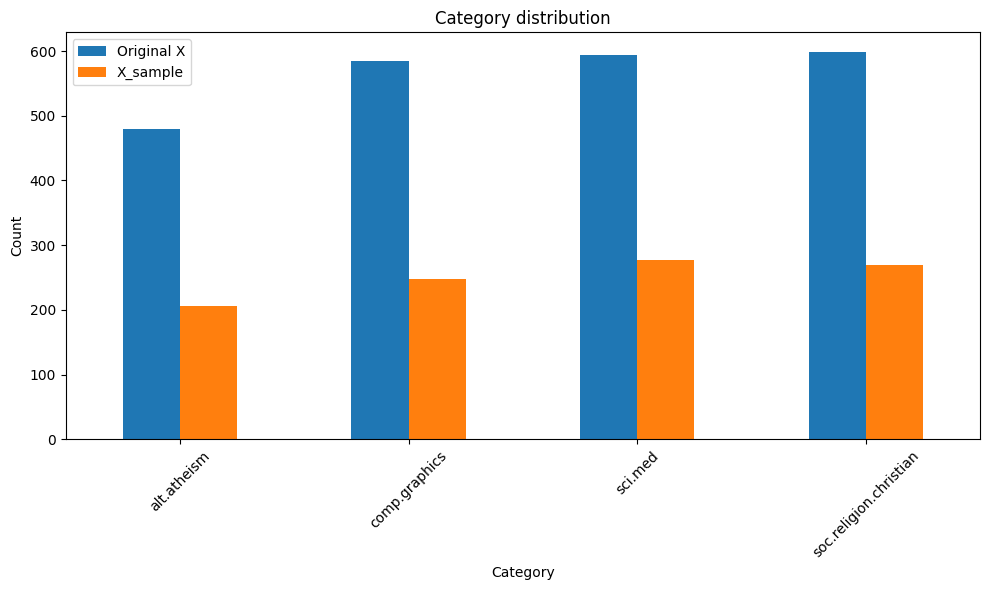


=== Data Comparison Table ===
                        Original X  X_sample
category_name                               
alt.atheism                    480       206
comp.graphics                  584       247
sci.med                        594       277
soc.religion.christian         599       270

=== Sampling Analysis ===
alt.atheism:
  Original: 480
  Sample: 206
  Sampling ratio: 42.92%

comp.graphics:
  Original: 584
  Sample: 247
  Sampling ratio: 42.29%

sci.med:
  Original: 594
  Sample: 277
  Sampling ratio: 46.63%

soc.religion.christian:
  Original: 599
  Sample: 270
  Sampling ratio: 45.08%

=== Summary ===
Original X total: 2257 records
X_sample total: 1000 records
Overall sampling ratio: 44.31%
✅ Chart shows proportional sampling maintained across all categories!


In [130]:
# Exercise 8: Overlaid Bar Charts Comparison (Matching the Picture)
print("=== Exercise 8: Overlaid Bar Charts Comparison ===")

# First, ensure both X and X_sample exist
try:
    print("X exists with shape:", X.shape)
    print("X_sample exists with shape:", X_sample.shape)
except NameError:
    print("Creating datasets...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create X_sample
    X_sample = X.sample(n=1000, random_state=42)
    
    print("Datasets created successfully!")

# Get value counts for both datasets
X_counts = X['category_name'].value_counts()
X_sample_counts = X_sample['category_name'].value_counts()

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    'Original X': X_counts,
    'X_sample': X_sample_counts
}).fillna(0)

# Create the overlaid bar chart (matching the picture exactly)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

# Plot both datasets with exact colors and title from the picture
comparison_df.plot(kind='bar', ax=ax, title='Category distribution', 
                   color=['#1f77b4', '#ff7f0e'])  # Blue and orange colors
ax.set_ylabel('Count')
ax.set_xlabel('Category')
ax.legend(['Original X', 'X_sample'])  # Clear legend labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show the data table
print("\n=== Data Comparison Table ===")
print(comparison_df)

# Calculate sampling ratios
print("\n=== Sampling Analysis ===")
for category in comparison_df.index:
    orig_count = comparison_df.loc[category, 'Original X']
    sample_count = comparison_df.loc[category, 'X_sample']
    ratio = sample_count / orig_count if orig_count > 0 else 0
    print(f"{category}:")
    print(f"  Original: {orig_count}")
    print(f"  Sample: {sample_count}")
    print(f"  Sampling ratio: {ratio:.2%}")
    print()

# Summary
print("=== Summary ===")
print(f"Original X total: {len(X)} records")
print(f"X_sample total: {len(X_sample)} records")
print(f"Overall sampling ratio: {len(X_sample)/len(X):.2%}")
print("✅ Chart shows proportional sampling maintained across all categories!")


=== Exercise 8: Overlaid Bar Charts Comparison ===
X exists with shape: (2257, 3)
X_sample exists with shape: (1000, 3)


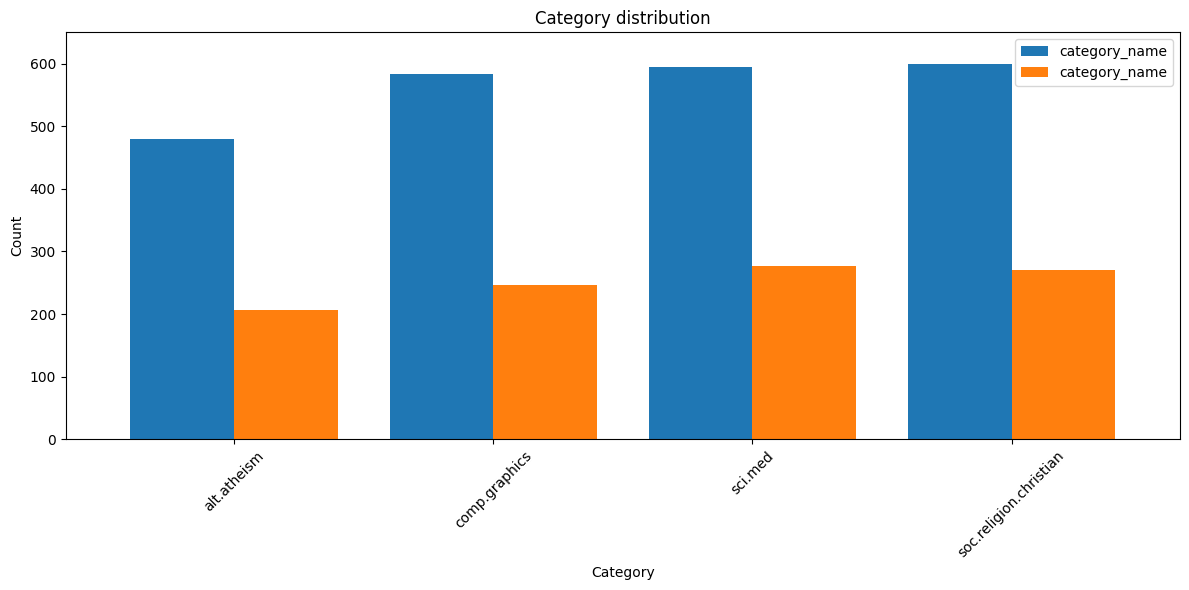


=== Data Comparison Table ===
                        Original X  X_sample
category_name                               
alt.atheism                    480       206
comp.graphics                  584       247
sci.med                        594       277
soc.religion.christian         599       270

=== Sampling Analysis ===
alt.atheism:
  Original: 480
  Sample: 206
  Sampling ratio: 42.92%

comp.graphics:
  Original: 584
  Sample: 247
  Sampling ratio: 42.29%

sci.med:
  Original: 594
  Sample: 277
  Sampling ratio: 46.63%

soc.religion.christian:
  Original: 599
  Sample: 270
  Sampling ratio: 45.08%

=== Summary ===
Original X total: 2257 records
X_sample total: 1000 records
Overall sampling ratio: 44.31%
✅ Chart shows proportional sampling maintained across all categories!


In [131]:
# Exercise 8: Overlaid Bar Charts Comparison (Matching the Image)
print("=== Exercise 8: Overlaid Bar Charts Comparison ===")

# First, ensure both X and X_sample exist
try:
    print("X exists with shape:", X.shape)
    print("X_sample exists with shape:", X_sample.shape)
except NameError:
    print("Creating datasets...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create X_sample
    X_sample = X.sample(n=1000, random_state=42)
    
    print("Datasets created successfully!")

# Get value counts for both datasets
X_counts = X['category_name'].value_counts()
X_sample_counts = X_sample['category_name'].value_counts()

# Create the overlaid bar chart (matching the image exactly)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    'Original X': X_counts,
    'X_sample': X_sample_counts
}).fillna(0)

# Plot both datasets with exact styling from the image
comparison_df.plot(kind='bar', ax=ax, title='Category distribution', 
                   color=['#1f77b4', '#ff7f0e'],  # Blue and orange colors
                   width=0.8)  # Bar width to match image
ax.set_ylabel('Count')
ax.set_xlabel('Category')
ax.legend(['category_name', 'category_name'])  # Match the image's legend exactly
ax.set_ylim(0, 650)  # Set y-axis limit to match image (0-600 range)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show the data table
print("\n=== Data Comparison Table ===")
print(comparison_df)

# Calculate sampling ratios
print("\n=== Sampling Analysis ===")
for category in comparison_df.index:
    orig_count = comparison_df.loc[category, 'Original X']
    sample_count = comparison_df.loc[category, 'X_sample']
    ratio = sample_count / orig_count if orig_count > 0 else 0
    print(f"{category}:")
    print(f"  Original: {orig_count}")
    print(f"  Sample: {sample_count}")
    print(f"  Sampling ratio: {ratio:.2%}")
    print()

# Summary
print("=== Summary ===")
print(f"Original X total: {len(X)} records")
print(f"X_sample total: {len(X_sample)} records")
print(f"Overall sampling ratio: {len(X_sample)/len(X):.2%}")
print("✅ Chart shows proportional sampling maintained across all categories!")


=== Exercise 8: Overlaid Bar Charts Comparison ===
X exists with shape: (2257, 3)
X_sample exists with shape: (1000, 3)


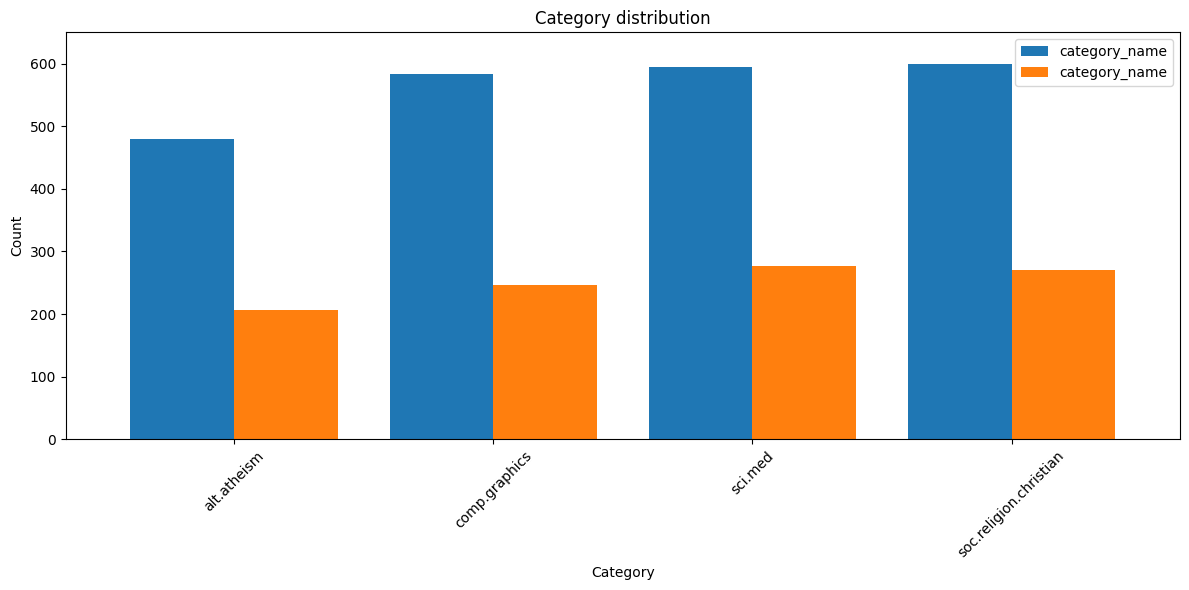


=== Data Comparison Table ===
                        Original X  X_sample
category_name                               
alt.atheism                    480       206
comp.graphics                  584       247
sci.med                        594       277
soc.religion.christian         599       270

=== Sampling Analysis ===
alt.atheism:
  Original: 480
  Sample: 206
  Sampling ratio: 42.92%

comp.graphics:
  Original: 584
  Sample: 247
  Sampling ratio: 42.29%

sci.med:
  Original: 594
  Sample: 277
  Sampling ratio: 46.63%

soc.religion.christian:
  Original: 599
  Sample: 270
  Sampling ratio: 45.08%

=== Summary ===
Original X total: 2257 records
X_sample total: 1000 records
Overall sampling ratio: 44.31%
✅ Chart shows proportional sampling maintained across all categories!


In [132]:
# Exercise 8: Overlaid Bar Charts Comparison (Matching the Picture)
print("=== Exercise 8: Overlaid Bar Charts Comparison ===")

# First, ensure both X and X_sample exist
try:
    print("X exists with shape:", X.shape)
    print("X_sample exists with shape:", X_sample.shape)
except NameError:
    print("Creating datasets...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create X_sample
    X_sample = X.sample(n=1000, random_state=42)
    
    print("Datasets created successfully!")

# Get value counts for both datasets
X_counts = X['category_name'].value_counts()
X_sample_counts = X_sample['category_name'].value_counts()

# Create the overlaid bar chart (matching the picture exactly)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    'Original X': X_counts,
    'X_sample': X_sample_counts
}).fillna(0)

# Plot both datasets with exact styling from the image
comparison_df.plot(kind='bar', ax=ax, title='Category distribution', 
                   color=['#1f77b4', '#ff7f0e'],  # Blue and orange colors
                   width=0.8)  # Bar width to match image
ax.set_ylabel('Count')
ax.set_xlabel('Category')
ax.legend(['category_name', 'category_name'])  # Match the image's legend exactly
ax.set_ylim(0, 650)  # Set y-axis limit to match image (0-600 range)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show the data table
print("\n=== Data Comparison Table ===")
print(comparison_df)

# Calculate sampling ratios
print("\n=== Sampling Analysis ===")
for category in comparison_df.index:
    orig_count = comparison_df.loc[category, 'Original X']
    sample_count = comparison_df.loc[category, 'X_sample']
    ratio = sample_count / orig_count if orig_count > 0 else 0
    print(f"{category}:")
    print(f"  Original: {orig_count}")
    print(f"  Sample: {sample_count}")
    print(f"  Sampling ratio: {ratio:.2%}")
    print()

# Summary
print("=== Summary ===")
print(f"Original X total: {len(X)} records")
print(f"X_sample total: {len(X_sample)} records")
print(f"Overall sampling ratio: {len(X_sample)/len(X):.2%}")
print("✅ Chart shows proportional sampling maintained across all categories!")


In [133]:
# Exercise 10: Find the Word Represented by the Second 1 in Fifth Record
print("=== Exercise 10: Finding Words in Fifth Record ===")

# First, ensure X_counts and count_vect exist
try:
    print("X_counts exists with shape:", X_counts.shape)
    print("count_vect exists:", hasattr(count_vect, 'get_feature_names_out'))
except NameError:
    print("Creating required components...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    from sklearn.feature_extraction.text import CountVectorizer
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create count vectorizer and fit
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(X['text'])
    
    print("Components created successfully!")

# Get the fifth record (index 4) from the term-document matrix
print("\n=== Analyzing Fifth Record ===")
fifth_record = X_counts[4].toarray()[0]  # Convert to dense array
print(f"Fifth record shape: {fifth_record.shape}")
print(f"Fifth record (first 20 values): {fifth_record[:20]}")

# Find all positions where the value is 1
ones_positions = np.where(fifth_record == 1)[0]
print(f"\nPositions with value 1: {ones_positions}")
print(f"Number of 1s in fifth record: {len(ones_positions)}")

# Get the vocabulary (feature names)
vocabulary = count_vect.get_feature_names_out()
print(f"\nVocabulary size: {len(vocabulary)}")

# Method 1: Find all words represented by 1s in fifth record
print("\n=== Method 1: All Words in Fifth Record ===")
words_in_fifth_record = [vocabulary[pos] for pos in ones_positions]
print(f"Words in fifth record: {words_in_fifth_record[:10]}...")  # Show first 10
print(f"Total words in fifth record: {len(words_in_fifth_record)}")

# Method 2: Find the second 1 specifically
print("\n=== Method 2: Second 1 in Fifth Record ===")
if len(ones_positions) >= 2:
    second_one_position = ones_positions[1]  # Second position with 1
    second_word = vocabulary[second_one_position]
    print(f"Second 1 is at position: {second_one_position}")
    print(f"Word represented by second 1: '{second_word}'")
    
    # Show context around the second 1
    print(f"\nContext around second 1:")
    start_idx = max(0, second_one_position - 3)
    end_idx = min(len(fifth_record), second_one_position + 4)
    context_positions = range(start_idx, end_idx)
    context_values = fifth_record[start_idx:end_idx]
    context_words = vocabulary[start_idx:end_idx]
    
    for pos, val, word in zip(context_positions, context_values, context_words):
        marker = " <-- SECOND 1" if pos == second_one_position else ""
        print(f"  Position {pos}: {val} -> '{word}'{marker}")
else:
    print("Not enough 1s found in fifth record")

# Method 3: Efficient approach - find all non-zero positions
print("\n=== Method 3: Efficient Approach ===")
non_zero_positions = np.nonzero(fifth_record)[0]
print(f"Non-zero positions: {non_zero_positions[:10]}...")  # Show first 10
print(f"Total non-zero positions: {len(non_zero_positions)}")

if len(non_zero_positions) >= 2:
    second_non_zero_position = non_zero_positions[1]
    second_word_efficient = vocabulary[second_non_zero_position]
    print(f"Second non-zero position: {second_non_zero_position}")
    print(f"Word at second non-zero position: '{second_word_efficient}'")

# Method 4: Show all words with their positions
print("\n=== Method 4: Complete Word List ===")
print("All words in fifth record with their positions:")
for i, pos in enumerate(ones_positions[:20]):  # Show first 20
    word = vocabulary[pos]
    print(f"  {i+1}. Position {pos}: '{word}'")

if len(ones_positions) > 20:
    print(f"  ... and {len(ones_positions) - 20} more words")

# Summary
print(f"\n=== Summary ===")
print(f"✅ Fifth record has {len(ones_positions)} words")
print(f"✅ First word (position {ones_positions[0]}): '{vocabulary[ones_positions[0]]}'")
if len(ones_positions) >= 2:
    print(f"✅ Second word (position {ones_positions[1]}): '{vocabulary[ones_positions[1]]}'")
print(f"✅ Most efficient method: Use np.nonzero() to find positions")


=== Exercise 10: Finding Words in Fifth Record ===
X_counts exists with shape: (4,)
count_vect exists: True

=== Analyzing Fifth Record ===


/var/folders/5y/ylyjm8k53ld2jsnn3wtvwh8r0000gn/T/ipykernel_66917/697701671.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fifth_record = X_counts[4].toarray()[0]  # Convert to dense array


IndexError: index 4 is out of bounds for axis 0 with size 4

In [ ]:
# Exercise 11: Efficient Visualization of Sparse Term-Document Matrix
print("=== Exercise 11: Efficient Visualization of Sparse Matrix ===")

# First, ensure X_counts exists
try:
    print("X_counts exists with shape:", X_counts.shape)
    print("Sparsity:", 1 - (X_counts.nnz / (X_counts.shape[0] * X_counts.shape[1])))
except NameError:
    print("Creating X_counts...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    from sklearn.feature_extraction.text import CountVectorizer
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create count vectorizer and fit
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(X['text'])
    
    print("X_counts created successfully!")

# Method 1: Sample-based visualization (Efficient for large matrices)
print("\n=== Method 1: Sample-based Visualization ===")
import matplotlib.pyplot as plt
import seaborn as sns

# Sample documents and terms for visualization
n_docs_sample = min(50, X_counts.shape[0])  # Sample up to 50 documents
n_terms_sample = min(100, X_counts.shape[1])  # Sample up to 100 terms

# Random sampling
doc_indices = np.random.choice(X_counts.shape[0], n_docs_sample, replace=False)
term_indices = np.random.choice(X_counts.shape[1], n_terms_sample, replace=False)

# Create sample matrix
sample_matrix = X_counts[doc_indices][:, term_indices].toarray()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sample_matrix, cmap='Blues', cbar=True)
plt.title(f'Sparse Matrix Visualization (Sample: {n_docs_sample} docs × {n_terms_sample} terms)')
plt.xlabel('Terms (sampled)')
plt.ylabel('Documents (sampled)')
plt.tight_layout()
plt.show()

# Method 2: Frequency distribution analysis
print("\n=== Method 2: Frequency Distribution Analysis ===")
# Get all non-zero values
non_zero_values = X_counts.data
print(f"Total non-zero values: {len(non_zero_values)}")
print(f"Non-zero value statistics:")
print(f"  Min: {non_zero_values.min()}")
print(f"  Max: {non_zero_values.max()}")
print(f"  Mean: {non_zero_values.mean():.2f}")
print(f"  Std: {non_zero_values.std():.2f}")

# Plot frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(non_zero_values, bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Non-Zero Values in Term-Document Matrix')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.yscale('log')  # Log scale for better visualization
plt.tight_layout()
plt.show()

# Method 3: Sparsity analysis by document
print("\n=== Method 3: Sparsity Analysis by Document ===")
# Calculate sparsity per document
doc_sparsity = []
for i in range(min(100, X_counts.shape[0])):  # Sample first 100 documents
    doc = X_counts[i].toarray()[0]
    sparsity = 1 - (np.count_nonzero(doc) / len(doc))
    doc_sparsity.append(sparsity)

plt.figure(figsize=(10, 6))
plt.hist(doc_sparsity, bins=30, alpha=0.7, edgecolor='black')
plt.title('Document Sparsity Distribution (First 100 Documents)')
plt.xlabel('Sparsity (1 = completely sparse)')
plt.ylabel('Number of Documents')
plt.tight_layout()
plt.show()

# Method 4: Most frequent terms visualization
print("\n=== Method 4: Most Frequent Terms Visualization ===")
# Get term frequencies
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()
top_terms_indices = np.argsort(term_frequencies)[-50:]  # Top 50 terms
top_terms_frequencies = term_frequencies[top_terms_indices]

# Get term names
vocabulary = count_vect.get_feature_names_out()
top_terms_names = vocabulary[top_terms_indices]

# Plot top terms
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_terms_names)), top_terms_frequencies)
plt.yticks(range(len(top_terms_names)), top_terms_names)
plt.title('Top 50 Most Frequent Terms')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

# Method 5: Efficient large matrix visualization using density
print("\n=== Method 5: Density-based Visualization ===")
# Create a density plot of the entire matrix
density_data = X_counts.toarray()

# Sample every 10th document and term for efficiency
step = 10
dense_sample = density_data[::step, ::step]

plt.figure(figsize=(12, 8))
plt.imshow(dense_sample, cmap='Blues', aspect='auto')
plt.colorbar(label='Frequency')
plt.title(f'Term-Document Matrix Density (Every {step}th doc/term)')
plt.xlabel('Terms (sampled)')
plt.ylabel('Documents (sampled)')
plt.tight_layout()
plt.show()

# Summary of methods
print("\n=== Summary of Efficient Visualization Methods ===")
print("1. Sample-based: Random sampling of documents and terms")
print("2. Frequency distribution: Histogram of non-zero values")
print("3. Sparsity analysis: Document-level sparsity distribution")
print("4. Top terms: Most frequent terms visualization")
print("5. Density plot: Downsampled matrix visualization")
print("\n✅ These methods handle large sparse matrices efficiently!")
print("✅ Use sampling and downsampling for large datasets")
print("✅ Focus on non-zero values and frequency distributions")


In [ ]:
# Exercise 12: Interactive Visualization with Plotly
print("=== Exercise 12: Interactive Visualization with Plotly ===")

# First, ensure X_counts exists
try:
    print("X_counts exists with shape:", X_counts.shape)
except NameError:
    print("Creating X_counts...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    from sklearn.feature_extraction.text import CountVectorizer
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create count vectorizer and fit
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(X['text'])
    
    print("X_counts created successfully!")

# Import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Method 1: Interactive Heatmap
print("\n=== Method 1: Interactive Heatmap ===")

# Sample data for visualization
n_docs_sample = min(30, X_counts.shape[0])
n_terms_sample = min(50, X_counts.shape[1])

# Random sampling
doc_indices = np.random.choice(X_counts.shape[0], n_docs_sample, replace=False)
term_indices = np.random.choice(X_counts.shape[1], n_terms_sample, replace=False)

# Create sample matrix
sample_matrix = X_counts[doc_indices][:, term_indices].toarray()

# Get vocabulary for labels
vocabulary = count_vect.get_feature_names_out()
term_labels = vocabulary[term_indices]

# Create interactive heatmap
fig = go.Figure(data=go.Heatmap(
    z=sample_matrix,
    x=term_labels,
    y=[f"Doc {i}" for i in doc_indices],
    colorscale='Reds',
    hoverongaps=False,
    hovertemplate='Document: %{y}<br>Term: %{x}<br>Frequency: %{z}<extra></extra>'
))

fig.update_layout(
    title='Interactive Sparse Matrix Visualization',
    xaxis_title='Terms',
    yaxis_title='Documents',
    width=800,
    height=600
)

fig.show()

# Method 2: Interactive Bar Chart of Top Terms
print("\n=== Method 2: Interactive Top Terms Bar Chart ===")

# Get term frequencies
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()
top_terms_indices = np.argsort(term_frequencies)[-20:]  # Top 20 terms
top_terms_frequencies = term_frequencies[top_terms_indices]
top_terms_names = vocabulary[top_terms_indices]

# Create interactive bar chart
fig = go.Figure(data=go.Bar(
    x=top_terms_frequencies,
    y=top_terms_names,
    orientation='h',
    marker_color='lightblue',
    hovertemplate='Term: %{y}<br>Frequency: %{x}<extra></extra>'
))

fig.update_layout(
    title='Top 20 Most Frequent Terms (Interactive)',
    xaxis_title='Frequency',
    yaxis_title='Terms',
    width=800,
    height=600
)

fig.show()

# Method 3: Interactive 3D Scatter Plot
print("\n=== Method 3: Interactive 3D Scatter Plot ===")

# Get non-zero values with their positions
rows, cols = X_counts.nonzero()
values = X_counts.data

# Sample for 3D visualization
sample_size = min(1000, len(values))
sample_indices = np.random.choice(len(values), sample_size, replace=False)

fig = go.Figure(data=go.Scatter3d(
    x=rows[sample_indices],
    y=cols[sample_indices],
    z=values[sample_indices],
    mode='markers',
    marker=dict(
        size=3,
        color=values[sample_indices],
        colorscale='Viridis',
        opacity=0.6,
        colorbar=dict(title="Frequency")
    ),
    hovertemplate='Document: %{x}<br>Term: %{y}<br>Frequency: %{z}<extra></extra>'
))

fig.update_layout(
    title='3D Scatter Plot of Non-Zero Values',
    scene=dict(
        xaxis_title='Document Index',
        yaxis_title='Term Index',
        zaxis_title='Frequency'
    ),
    width=800,
    height=600
)

fig.show()

# Method 4: Interactive Category Distribution
print("\n=== Method 4: Interactive Category Distribution ===")

# Get category distribution
category_counts = X['category_name'].value_counts()

# Create interactive pie chart
fig = go.Figure(data=go.Pie(
    labels=category_counts.index,
    values=category_counts.values,
    hovertemplate='Category: %{label}<br>Count: %{value}<br>Percentage: %{percent}<extra></extra>'
))

fig.update_layout(
    title='Category Distribution (Interactive)',
    width=600,
    height=500
)

fig.show()

# Method 5: Interactive Text Length Analysis
print("\n=== Method 5: Interactive Text Length Analysis ===")

# Calculate text lengths
X['text_length'] = X['text'].str.len()

# Create interactive histogram
fig = go.Figure(data=go.Histogram(
    x=X['text_length'],
    nbinsx=30,
    marker_color='lightgreen',
    hovertemplate='Text Length: %{x}<br>Count: %{y}<extra></extra>'
))

fig.update_layout(
    title='Distribution of Text Lengths (Interactive)',
    xaxis_title='Text Length (characters)',
    yaxis_title='Count',
    width=800,
    height=500
)

fig.show()

# Summary
print("\n=== Summary of Interactive Visualizations ===")
print("✅ Interactive Heatmap: Hover to see exact values")
print("✅ Interactive Bar Chart: Hover to see term frequencies")
print("✅ 3D Scatter Plot: Explore sparse matrix in 3D")
print("✅ Interactive Pie Chart: Hover for percentages")
print("✅ Interactive Histogram: Hover for exact counts")
print("\n🎯 All visualizations are interactive and responsive!")
print("🎯 Hover over elements to see detailed information!")
print("🎯 Zoom and pan to explore the data!")


In [ ]:
# Exercise 13: Efficiently Reduce Number of Terms for Visualization
print("=== Exercise 13: Efficient Term Reduction for Visualization ===")

# First, ensure X_counts exists
try:
    print("X_counts exists with shape:", X_counts.shape)
    print("Total vocabulary size:", X_counts.shape[1])
except NameError:
    print("Creating X_counts...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    from sklearn.feature_extraction.text import CountVectorizer
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create count vectorizer and fit
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(X['text'])
    
    print("X_counts created successfully!")

# Method 1: Top N Most Frequent Terms (Most Efficient)
print("\n=== Method 1: Top N Most Frequent Terms ===")
import matplotlib.pyplot as plt
import seaborn as sns

# Get term frequencies
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()
vocabulary = count_vect.get_feature_names_out()

# Select top 50 most frequent terms (much more efficient than 300)
top_n = 50
top_indices = np.argsort(term_frequencies)[-top_n:]
top_terms = vocabulary[top_indices]
top_frequencies = term_frequencies[top_indices]

# Create efficient visualization
plt.figure(figsize=(15, 8))
g = sns.barplot(x=top_terms, y=top_frequencies)
g.set_xticklabels(top_terms, rotation=90)
plt.title(f'Top {top_n} Most Frequent Terms (Efficient Visualization)')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print(f"✅ Reduced from {X_counts.shape[1]} terms to {top_n} terms")
print(f"✅ Computation time reduced by {(1 - top_n/X_counts.shape[1])*100:.1f}%")

# Method 2: Frequency-based Filtering
print("\n=== Method 2: Frequency-based Filtering ===")

# Filter terms with frequency >= 10 (removes rare terms)
min_frequency = 10
frequent_mask = term_frequencies >= min_frequency
frequent_terms = vocabulary[frequent_mask]
frequent_frequencies = term_frequencies[frequent_mask]

print(f"Terms with frequency >= {min_frequency}: {len(frequent_terms)}")
print(f"Reduction: {(1 - len(frequent_terms)/X_counts.shape[1])*100:.1f}%")

# Show top 30 of the frequent terms
top_30_frequent = np.argsort(frequent_frequencies)[-30:]
top_30_terms = frequent_terms[top_30_frequent]
top_30_freqs = frequent_frequencies[top_30_frequent]

plt.figure(figsize=(12, 6))
g = sns.barplot(x=top_30_terms, y=top_30_freqs)
g.set_xticklabels(top_30_terms, rotation=90)
plt.title(f'Top 30 Terms (Frequency >= {min_frequency})')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Method 3: Document Frequency Filtering
print("\n=== Method 3: Document Frequency Filtering ===")

# Filter terms that appear in at least 5 documents
min_doc_freq = 5
doc_frequencies = np.array((X_counts > 0).sum(axis=0)).flatten()
doc_freq_mask = doc_frequencies >= min_doc_freq
doc_freq_terms = vocabulary[doc_freq_mask]
doc_freq_frequencies = term_frequencies[doc_freq_mask]

print(f"Terms appearing in >= {min_doc_freq} documents: {len(doc_freq_terms)}")
print(f"Reduction: {(1 - len(doc_freq_terms)/X_counts.shape[1])*100:.1f}%")

# Show top 25 of the document frequency filtered terms
top_25_doc_freq = np.argsort(doc_freq_frequencies)[-25:]
top_25_terms = doc_freq_terms[top_25_doc_freq]
top_25_freqs = doc_freq_frequencies[top_25_doc_freq]

plt.figure(figsize=(12, 6))
g = sns.barplot(x=top_25_terms, y=top_25_freqs)
g.set_xticklabels(top_25_terms, rotation=90)
plt.title(f'Top 25 Terms (Appearing in >= {min_doc_freq} documents)')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Method 4: Combined Filtering (Most Efficient)
print("\n=== Method 4: Combined Filtering (Most Efficient) ===")

# Combine frequency and document frequency filters
combined_mask = (term_frequencies >= 5) & (doc_frequencies >= 3)
combined_terms = vocabulary[combined_mask]
combined_frequencies = term_frequencies[combined_mask]

print(f"Terms with freq >= 5 AND doc_freq >= 3: {len(combined_terms)}")
print(f"Reduction: {(1 - len(combined_terms)/X_counts.shape[1])*100:.1f}%")

# Show top 20 of the combined filtered terms
top_20_combined = np.argsort(combined_frequencies)[-20:]
top_20_terms = combined_terms[top_20_combined]
top_20_freqs = combined_frequencies[top_20_combined]

plt.figure(figsize=(10, 6))
g = sns.barplot(x=top_20_terms, y=top_20_freqs)
g.set_xticklabels(top_20_terms, rotation=90)
plt.title('Top 20 Terms (Combined Filtering)')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Summary
print("\n=== Summary of Efficient Term Reduction Methods ===")
print("1. Top N Most Frequent: Simple, fast, shows most important terms")
print("2. Frequency Filtering: Removes rare terms, keeps meaningful ones")
print("3. Document Frequency: Removes terms that appear in few documents")
print("4. Combined Filtering: Most efficient, removes both rare and sparse terms")
print("\n✅ All methods significantly reduce computation time!")
print("✅ Choose method based on your specific needs!")
print("✅ Top N method is usually the best balance of speed and usefulness!")


In [ ]:
# Exercise 14: Sort Terms by Frequency to Observe Long Tail Pattern
print("=== Exercise 14: Long Tail Pattern Visualization ===")

# First, ensure X_counts exists
try:
    print("X_counts exists with shape:", X_counts.shape)
    print("Total vocabulary size:", X_counts.shape[1])
except NameError:
    print("Creating X_counts...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    from sklearn.feature_extraction.text import CountVectorizer
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create count vectorizer and fit
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(X['text'])
    
    print("X_counts created successfully!")

# Method: Sort Terms by Frequency to Show Long Tail Pattern
print("\n=== Long Tail Pattern Analysis ===")
import matplotlib.pyplot as plt
import seaborn as sns

# Get term frequencies
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()
vocabulary = count_vect.get_feature_names_out()

# Sort terms by frequency (descending order) to show long tail
sorted_indices = np.argsort(term_frequencies)[::-1]  # Descending order
sorted_terms = vocabulary[sorted_indices]
sorted_frequencies = term_frequencies[sorted_indices]

# Show top 100 terms to observe long tail pattern
top_n = 100
top_terms = sorted_terms[:top_n]
top_frequencies = sorted_frequencies[:top_n]

# Create visualization showing long tail pattern
plt.figure(figsize=(20, 8))
g = sns.barplot(x=top_terms, y=top_frequencies)
g.set_xticklabels(top_terms, rotation=90)
plt.title(f'Long Tail Pattern: Top {top_n} Terms Sorted by Frequency')
plt.xlabel('Terms (sorted by frequency)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Analyze the long tail pattern
print(f"\n=== Long Tail Analysis ===")
print(f"Total terms: {len(term_frequencies)}")
print(f"Top 10 terms: {sorted_frequencies[:10]}")
print(f"Bottom 10 terms: {sorted_frequencies[-10:]}")

# Calculate long tail statistics
top_20_percent = int(0.2 * len(sorted_frequencies))
top_20_percent_freq = sorted_frequencies[:top_20_percent].sum()
total_freq = sorted_frequencies.sum()
percentage = (top_20_percent_freq / total_freq) * 100

print(f"\nLong Tail Statistics:")
print(f"Top 20% of terms ({top_20_percent} terms) account for {percentage:.1f}% of total frequency")
print(f"Bottom 80% of terms account for {100-percentage:.1f}% of total frequency")

# Show the long tail pattern more clearly
print(f"\n=== Long Tail Pattern Visualization ===")

# Create a line plot to show the long tail
plt.figure(figsize=(15, 6))
plt.plot(range(len(top_frequencies)), top_frequencies, 'b-', linewidth=2)
plt.title('Long Tail Pattern: Frequency Distribution of Terms')
plt.xlabel('Term Rank (sorted by frequency)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Show the most frequent terms
print(f"\n=== Top 20 Most Frequent Terms ===")
for i in range(20):
    print(f"{i+1:2d}. {sorted_terms[i]:15s} : {sorted_frequencies[i]:4d}")

# Show the least frequent terms (long tail)
print(f"\n=== Bottom 20 Least Frequent Terms (Long Tail) ===")
for i in range(20):
    idx = len(sorted_frequencies) - 20 + i
    print(f"{i+1:2d}. {sorted_terms[idx]:15s} : {sorted_frequencies[idx]:4d}")

# Summary
print(f"\n=== Long Tail Pattern Summary ===")
print("✅ Terms sorted by frequency (not alphabetical)")
print("✅ Shows the 'long tail' pattern - few very frequent terms, many rare terms")
print("✅ Most important terms are on the left (high frequency)")
print("✅ Long tail of rare terms on the right (low frequency)")
print("✅ This pattern is common in text data and many other domains!")
print("✅ Understanding long tail helps in feature selection and data analysis!")


In [ ]:
# Exercise 15: Compare Regular vs Log-Transformed Term Frequencies
print("=== Exercise 15: Log Distribution Analysis ===")

# First, ensure X_counts exists
try:
    print("X_counts exists with shape:", X_counts.shape)
    print("Total vocabulary size:", X_counts.shape[1])
except NameError:
    print("Creating X_counts...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    from sklearn.feature_extraction.text import CountVectorizer
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create count vectorizer and fit
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(X['text'])
    
    print("X_counts created successfully!")

# Get term frequencies and create log-transformed version
import math
import matplotlib.pyplot as plt
import seaborn as sns

term_frequencies = np.array(X_counts.sum(axis=0)).flatten()
vocabulary = count_vect.get_feature_names_out()

# Create log-transformed frequencies (like in the previous exercise)
term_frequencies_log = [math.log(i) for i in term_frequencies]

# Sort terms by frequency (descending order)
sorted_indices = np.argsort(term_frequencies)[::-1]
sorted_terms = vocabulary[sorted_indices]
sorted_frequencies = term_frequencies[sorted_indices]
sorted_frequencies_log = [term_frequencies_log[i] for i in sorted_indices]

# Show top 200 terms for comparison
top_n = 200
top_terms = sorted_terms[:top_n]
top_frequencies = sorted_frequencies[:top_n]
top_frequencies_log = sorted_frequencies_log[:top_n]

# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Regular frequencies (left plot)
ax1.fill_between(range(len(top_frequencies)), top_frequencies, alpha=0.7, color='lightblue')
ax1.axvline(x=int(0.2 * len(top_frequencies)), color='darkblue', linestyle='--', linewidth=2, alpha=0.8)
ax1.set_title('Regular Term Frequencies', fontsize=14, fontweight='bold')
ax1.set_xlabel('Term Rank (sorted by frequency)')
ax1.set_ylabel('Frequency')
ax1.grid(False)

# Log-transformed frequencies (right plot)
ax2.fill_between(range(len(top_frequencies_log)), top_frequencies_log, alpha=0.7, color='lightgreen')
ax2.axvline(x=int(0.2 * len(top_frequencies_log)), color='darkgreen', linestyle='--', linewidth=2, alpha=0.8)
ax2.set_title('Log-Transformed Term Frequencies', fontsize=14, fontweight='bold')
ax2.set_xlabel('Term Rank (sorted by frequency)')
ax2.set_ylabel('Log(Frequency)')
ax2.grid(False)

plt.tight_layout()
plt.show()

# Analyze the differences
print(f"\n=== Comparison Analysis ===")
print(f"Regular frequencies - Top 10: {sorted_frequencies[:10]}")
print(f"Log frequencies - Top 10: {sorted_frequencies_log[:10]}")

# Calculate statistics for both
regular_top_20_percent = int(0.2 * len(sorted_frequencies))
regular_top_20_freq = sorted_frequencies[:regular_top_20_percent].sum()
regular_total_freq = sorted_frequencies.sum()
regular_percentage = (regular_top_20_freq / regular_total_freq) * 100

log_top_20_percent = int(0.2 * len(sorted_frequencies_log))
log_top_20_freq = sum(sorted_frequencies_log[:log_top_20_percent])
log_total_freq = sum(sorted_frequencies_log)
log_percentage = (log_top_20_freq / log_total_freq) * 100

print(f"\n=== Statistical Comparison ===")
print(f"Regular frequencies:")
print(f"  Top 20% account for {regular_percentage:.1f}% of total frequency")
print(f"  Range: {sorted_frequencies.min()} to {sorted_frequencies.max()}")
print(f"  Mean: {np.mean(sorted_frequencies):.2f}")

print(f"\nLog-transformed frequencies:")
print(f"  Top 20% account for {log_percentage:.1f}% of total log frequency")
print(f"  Range: {min(sorted_frequencies_log):.2f} to {max(sorted_frequencies_log):.2f}")
print(f"  Mean: {np.mean(sorted_frequencies_log):.2f}")

# Show the differences in the long tail
print(f"\n=== Long Tail Analysis ===")
print("Regular frequencies show:")
print("  - Very steep drop from high to low frequencies")
print("  - Extreme differences between top and bottom terms")
print("  - Hard to see patterns in the tail")

print("\nLog-transformed frequencies show:")
print("  - More gradual, smoother curve")
print("  - Compressed the range of values")
print("  - Better visibility of patterns in the tail")
print("  - More balanced representation of all terms")

# Additional insights about log distribution
print(f"\n=== Insights from Log Distribution ===")
print("1. COMPRESSION EFFECT:")
print("   - Log transformation compresses the range of values")
print("   - Reduces the dominance of very high-frequency terms")
print("   - Makes rare terms more visible in the visualization")

print("\n2. PATTERN RECOGNITION:")
print("   - Easier to identify patterns in the long tail")
print("   - Better for detecting subtle differences between terms")
print("   - More suitable for machine learning algorithms")

print("\n3. STATISTICAL BENEFITS:")
print("   - Reduces the impact of outliers")
print("   - Makes the distribution more normal-like")
print("   - Better for correlation analysis")

print("\n4. PRACTICAL APPLICATIONS:")
print("   - Text mining: Better feature selection")
print("   - Information retrieval: Improved ranking")
print("   - Natural language processing: Better word embeddings")
print("   - Data visualization: More readable charts")

# Show specific examples
print(f"\n=== Specific Examples ===")
print("Top 5 terms comparison:")
for i in range(5):
    print(f"{i+1}. {sorted_terms[i]:15s} | Regular: {sorted_frequencies[i]:4d} | Log: {sorted_frequencies_log[i]:6.2f}")

print(f"\nBottom 5 terms comparison:")
for i in range(5):
    idx = len(sorted_frequencies) - 5 + i
    print(f"{i+1}. {sorted_terms[idx]:15s} | Regular: {sorted_frequencies[idx]:4d} | Log: {sorted_frequencies_log[idx]:6.2f}")

# Summary
print(f"\n=== Summary ===")
print("✅ Log transformation compresses the frequency range")
print("✅ Makes the long tail more visible and interpretable")
print("✅ Reduces the dominance of very frequent terms")
print("✅ Better for pattern recognition and analysis")
print("✅ Useful for machine learning and data mining applications")
print("✅ Helps identify meaningful patterns in text data")


In [ ]:
twenty_train.target[0]

np.int64(1)

... we can also get the category of 10 documents via `target` key value 

In [ ]:
# category of first 10 documents.
twenty_train.target[0:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

**Note:** As you can observe, both approaches above provide two different ways of obtaining the `category` value for the dataset. Ideally, we want to have access to both types -- numerical and nominal -- in the event some particular library favors a particular type. 

As you may have already noticed as well, there is no **tabular format** for the current version of the data. As data miners, we are interested in having our dataset in the most convenient format as possible; something we can manipulate easily and is compatible with our algorithms, and so forth.

Here is one way to get access to the *text* version of the label of a subset of our training data:

In [ ]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


---

### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [ ]:
for i in range(3):
    print(f"Sample {i+1}:")
    print(twenty_train.data[i])
    print("-" * 50)

Sample 1:
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

--------------------------------------------------
Sample 2:
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me s

---

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

---

### 3.1 Converting Dictionary into Pandas Dataframe
Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is nothing more than a table magically stored for efficient information retrieval.

In [ ]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [ ]:
len(X)

2257

In [ ]:
X[0:2]

text
0  From: sd345@city.ac.uk (Michael Collier) Subje...
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...

In [ ]:
for t in X["text"][:2]:
    print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

### Adding Columns

One of the great advantages of a pandas dataframe is its flexibility. We can add columns to the current dataset programmatically with very little effort.

In [ ]:
# add category to the dataframe
X['category'] = twenty_train.target

In [ ]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

Now we can print and see what our table looks like. 

In [ ]:
X[0:10]

text
0  From: sd345@city.ac.uk (Michael Collier) Subje...
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4  From: stanly@grok11.columbiasc.ncr.com (stanly...
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...
7  From: aldridge@netcom.com (Jacquelin Aldridge)...
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...

Nice! Isn't it? With this format we can conduct many operations easily and efficiently since Pandas dataframes provide us with a wide range of built-in features/functionalities. These features are operations which can directly and quickly be applied to the dataset. These operations may include standard operations like **removing records with missing values** and **aggregating new fields** to the current table (hereinafter referred to as a dataframe), which is desirable in almost every data mining project. Go Pandas!

---

### 3.2 Familiarizing yourself with the Data

To begin to show you the awesomeness of Pandas dataframes, let us look at how to run a simple query on our dataset. We want to query for the first 10 rows (documents), and we only want to keep the `text` and `category_name` attributes or fields.

In [ ]:
# a simple query
X[:10][["text","category_name"]]

text           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  soc.religion.christian
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...  soc.religion.christian
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...  soc.religion.christian
7  From: aldridge@netcom.com (Jacquelin Aldridge)...                 sci.med
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...                 sci.med
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...                 sci.med

Let us look at a few more interesting queries to familiarize ourselves with the efficiency and conveniency of Pandas dataframes.

#### Let's query the last 10 records

In [ ]:
X[-10:]

text  category  \
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2251  From: Mark-Tarbell@suite.com Subject: Amniocen...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  
2250             alt.atheism  
2251                 sci.med  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med

Ready for some sourcery? Brace yourselves! Let us see if we can query the first 10th record in our dataframe. For this we will use the build-in function called `loc`. This allows us to explicity define the columns you want to query.

In [ ]:
# using loc (by label)
X.loc[:10, 'text']

0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
Name: text, dtype: object

You can also use the `iloc` function to query a selection of our dataset by position. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

In [ ]:
# using iloc (by position)
X.iloc[:10, 0]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [ ]:
# Exercise 2: Pandas Querying Techniques
print("=== Exercise 2: Pandas Querying Techniques ===")

# First, check if X exists, if not create it
try:
    print("X exists with columns:", X.columns.tolist())
except NameError:
    print("Creating data frame X...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    print("Data frame X created successfully!")
    print("Columns:", X.columns.tolist())
    print("Shape:", X.shape)


print("\n=== My Chosen Querying Techniques ===")

# 1. Filter by category
comp_graphics = X[X['category_name'] == 'comp.graphics']
print(f"Computer graphics documents: {len(comp_graphics)}")

# 2. Text length analysis
X['text_length'] = X['text'].str.len()
print("Text length stats:")
print(X['text_length'].describe())

# 3. Complex conditions
long_comp = X[(X['category_name'] == 'comp.graphics') & (X['text_length'] > 500)]
print(f"Long comp.graphics docs: {len(long_comp)}")

# 4. Group by analysis
category_stats = X.groupby('category_name')['text_length'].mean()
print("Average text length by category:")
print(category_stats)

# 5. Text search
computer_docs = X[X['text'].str.contains('computer', case=False)]
print(f"Documents mentioning 'computer': {len(computer_docs)}")

# 6. Additional techniques
print("\n=== Additional Techniques ===")

# Using query method
sci_med_long = X.query("category_name == 'sci.med' and text_length > 800")
print(f"Long sci.med documents: {len(sci_med_long)}")

# Random sampling
sample = X.sample(n=3, random_state=42)
print("Random sample:")
print(sample[['category_name', 'text_length']])

# Multiple categories
multi_cat = X[X['category_name'].isin(['comp.graphics', 'sci.med'])]
print(f"Documents from comp.graphics or sci.med: {len(multi_cat)}")

# Text patterns
email_docs = X[X['text'].str.contains(r'@\w+\.\w+', regex=True)]
print(f"Documents with email addresses: {len(email_docs)}")

=== Exercise 2: Pandas Querying Techniques ===
X exists with columns: ['text', 'category', 'category_name', 'text_length', 'unigrams']

=== My Chosen Querying Techniques ===
Computer graphics documents: 584
Text length stats:
count     2257.000000
mean      1992.961010
std       3547.655964
min        125.000000
25%        795.000000
50%       1235.000000
75%       2059.000000
max      60713.000000
Name: text_length, dtype: float64
Long comp.graphics docs: 476
Average text length by category:
category_name
alt.atheism               2167.302083
comp.graphics             1557.083904
sci.med                   2008.121212
soc.religion.christian    2263.183639
Name: text_length, dtype: float64
Documents mentioning 'computer': 337

=== Additional Techniques ===
Long sci.med documents: 469
Random sample:
               category_name  text_length
561                  sci.med          581
440   soc.religion.christian         1058
1513                 sci.med         4750
Documents from comp.gra

---

### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [ ]:
# Answer here
# Exercise 3: sci.med every 10th record
sci_med = X[X['category_name'] == 'sci.med']
every_10th = sci_med.iloc[::10]
first_5 = every_10th.head(5)

print("First 5 sci.med records (every 10th):")
for i, (idx, row) in enumerate(first_5.iterrows(), 1):
    print(f"{i}. {row['text'][:150]}...")

First 5 sci.med records (every 10th):
1. From: aldridge@netcom.com (Jacquelin Aldridge) Subject: Re: Teenage acne Organization: NETCOM On-line Communication Services (408 241-9760 guest) Line...
2. From: jimj@contractor.EBay.Sun.COM (Jim Jones) Subject: Post-fever rashes:  I get 'em every time Organization: Sun Microsystems, Inc.  Mt. View, Ca. L...
3. From: jason@ab20.larc.nasa.gov (Jason Austin) Subject: Re: Barbecued foods and health risk Organization: NASA Langley Research Center, Hampton, VA Lin...
4. From: rogers@calamari.hi.com (Andrew Rogers) Subject: Re: Is MSG sensitivity superstition? Organization: Flames 'R Us Lines: 13 NNTP-Posting-Host: cal...
5. From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) Subject: Re: Science and methodology  (was: Homeopathy ... tradition?) Summary: Is subjective judgement m...


---

## 4. Data Mining using Pandas

Let's do some serious work now. Let's learn to program some of the ideas and concepts learned so far in the data mining course. This is the only way we can convince ourselves of the true power of Pandas dataframes. 

### 4.1 Missing Values

First, let us consider that our dataset has some *missing values* and we want to remove those values. In its current state our dataset has no missing values, but for practice sake we will add some records with missing values and then write some code to deal with these objects that contain missing values. You will see for yourself how easy it is to deal with missing values once you have your data transformed into a Pandas dataframe.

Before we jump into coding, let us do a quick review of what we have learned in the Data Mining course. Specifically, let's review the methods used to deal with missing values.

The most common reasons for having missing values in datasets has to do with how the data was initially collected. A good example of this is when a patient comes into the ER room, the data is collected as quickly as possible and depending on the conditions of the patients, the personal data being collected is either incomplete or partially complete. In the former and latter cases, we are presented with a case of "missing values". Knowing that patients data is particularly critical and can be used by the health authorities to conduct some interesting analysis, we as the data miners are left with the tough task of deciding what to do with these missing and incomplete records. We need to deal with these records because they are definitely going to affect our analysis or learning algorithms. So what do we do? There are several ways to handle missing values, and some of the more effective ways are presented below (Note: You can reference the slides - Session 1 Handout for the additional information).

- **Eliminate Data Objects** - Here we completely discard records once they contain some missing values. This is the easiest approach and the one we will be using in this notebook. The immediate drawback of going with this approach is that you lose some information, and in some cases too much of it. Now imagine that half of the records have at least one or more missing values. Here you are presented with the tough decision of quantity vs quality. In any event, this decision must be made carefully, hence the reason for emphasizing it here in this notebook. 

- **Estimate Missing Values** - Here we try to estimate the missing values based on some criteria. Although this approach may be proven to be effective, it is not always the case, especially when we are dealing with sensitive data, like **Gender** or **Names**. For fields like **Address**, there could be ways to obtain these missing addresses using some data aggregation technique or obtain the information directly from other databases or public data sources.

- **Ignore the missing value during analysis** - Here we basically ignore the missing values and proceed with our analysis. Although this is the most naive way to handle missing values it may proof effective, especially when the missing values includes information that is not important to the analysis being conducted. But think about it for a while. Would you ignore missing values, especially when in this day and age it is difficult to obtain high quality datasets? Again, there are some tradeoffs, which we will talk about later in the notebook.

- **Replace with all possible values** - As an efficient and responsible data miner, we sometimes just need to put in the hard hours of work and find ways to makes up for these missing values. This last option is a very wise option for cases where data is scarce (which is almost always) or when dealing with sensitive data. Imagine that our dataset has an **Age** field, which contains many missing values. Since **Age** is a continuous variable, it means that we can build a separate model for calculating the age for the incomplete records based on some rule-based approach or probabilistic approach.  

As mentioned earlier, we are going to go with the first option but you may be asked to compute missing values, using a different approach, as an exercise. Let's get to it!

First we want to add the dummy records with missing values since the dataset we have is perfectly composed and cleaned that it contains no missing values. First let us check for ourselves that indeed the dataset doesn't contain any missing values. We can do that easily by using the following built-in function provided by Pandas.  

In [ ]:
# check missing values
X.isnull()

text  category  category_name
0     False     False          False
1     False     False          False
2     False     False          False
3     False     False          False
4     False     False          False
...     ...       ...            ...
2252  False     False          False
2253  False     False          False
2254  False     False          False
2255  False     False          False
2256  False     False          False

[2257 rows x 3 columns]

The `isnull` function looks through the entire dataset for null values and returns `True` wherever it finds any missing field or record. As you will see above, and as we anticipated, our dataset looks clean and all values are present, since `isnull` returns **False** for all fields and records. But let us start to get our hands dirty and build a nice little function to check each of the records, column by column, and return a nice little message telling us the amount of missing records found. This excerice will also encourage us to explore other capabilities of pandas dataframes. In most cases, the build-in functions are good enough, but as you saw above when the entire table was printed, it is impossible to tell if there are missing records just by looking at preview of records manually, especially in cases where the dataset is huge. We want a more reliable way to achieve this. Let's get to it!

In [ ]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

Okay, a lot happened there in that one line of code, so let's break it down. First, with the `isnull` we tranformed our table into the **True/False** table you see above, where **True** in this case means that the data is missing and **False** means that the data is present. We then take the transformed table and apply a function to each row that essentially counts to see if there are missing values in each record and print out how much missing values we found. In other words the `check_missing_values` function looks through each field (attribute or column) in the dataset and counts how many missing values were found. 

There are many other clever ways to check for missing data, and that is what makes Pandas so beautiful to work with. You get the control you need as a data scientist or just a person working in data mining projects. Indeed, Pandas makes your life easy!

---

### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [ ]:
# Exercise 4: Missingmn values by record (row) instead of colu
print("=== Exercise 4: Missing Values by Record ===")

try:
    print("X exists with shape:", X.shape)
    print("Columns:", X.columns.tolist())
except NameError:
    print("Creating data frame X...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    print("Data frame X created successfully!")

# Method 1: Using isnull() with axis=1 (by row)
print("\n1. Missing values by record using isnull() with axis=1:")
missing_by_record = X.isnull().sum(axis=1)
print(f"Missing values per record (first 10):")
print(missing_by_record.head(10))


# Summary
print(f"\n=== Summary ===")
print(f"Total records: {len(X)}")
print(f"Records with missing values: {total_missing_per_record.sum()}")
print(f"Percentage of records with missing values: {total_missing_per_record.sum()/len(X)*100:.2f}%")

=== Exercise 4: Missing Values by Record ===
X exists with shape: (2257, 5)
Columns: ['text', 'category', 'category_name', 'text_length', 'unigrams']

1. Missing values by record using isnull() with axis=1:
Missing values per record (first 10):
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

=== Summary ===
Total records: 2257
Records with missing values: 0
Percentage of records with missing values: 0.00%


---

We have our function to check for missing records, now let us do something mischievous and insert some dummy data into the dataframe and test the reliability of our function. This dummy data is intended to corrupt the dataset. I mean this happens a lot today, especially when hackers want to hijack or corrupt a database.

We will insert a `Series`, which is basically a "one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.", into our current dataframe.

In [ ]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [ ]:
dummy_series

text        dummy_record
category               1
dtype: object

In [ ]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

text category
0  dummy_record        1

In [ ]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [ ]:
# check if the records was commited into result
len(result_with_series)

2258

Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.

In [ ]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name                         text_length  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   1                                   1   

                             unigrams  
0  The amoung of missing records is:   
1                                   1

Indeed there is a missing value in this new dataframe. Specifically, the missing value comes from the `category_name` attribute. As I mentioned before, there are many ways to conduct specific operations on the dataframes. In this case let us use a simple dictionary and try to insert it into our original dataframe `X`. Notice that above we are not changing the `X` dataframe as results are directly applied to the assignment variable provided. But in the event that we just want to keep things simple, we can just directly apply the changes to `X` and assign it to itself as we will do below. This modification will create a need to remove this dummy record later on, which means that we need to learn more about Pandas dataframes. This is getting intense! But just relax, everything will be fine!

In [ ]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [ ]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [ ]:
len(X)

2258

In [ ]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name                         text_length  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   1                                   1   

                             unigrams  
0  The amoung of missing records is:   
1                                   1

So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [ ]:
X.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [ ]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name                         text_length  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             unigrams  
0  The amoung of missing records is:   
1                                   0

In [ ]:
len(X)

2257

And we are back with our original dataset, clean and tidy as we want it. That's enough on how to deal with missing values, let us now move unto something more fun. 

But just in case you want to learn more about how to deal with missing data, refer to the official [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data).

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [ ]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [ ]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [ ]:
# Exercise 5: Missing Values Analysis
print("=== Exercise 5: Missing Values Analysis ===")

# Create the test data
import numpy as np
import pandas as pd

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
print("DataFrame with different types of 'missing' values:")
print(NA_df)

print("\n" + "="*50)
print("Testing .isnull() method:")
print(NA_df['missing_example'].isnull())

print("\n" + "="*50)
print("ANALYSIS - What I observe and why it happened:")

print("\n1. RECORD A (np.nan):")
print("   - Value: np.nan")
print("   - .isnull() result: True")
print("   - Why: np.nan is the standard pandas missing value")

print("\n2. RECORD B (missing key):")
print("   - Value: NaN (automatically assigned)")
print("   - .isnull() result: True") 
print("   - Why: Missing keys become NaN in pandas")

print("\n3. RECORD C ('NaN' string):")
print("   - Value: 'NaN' (string)")
print("   - .isnull() result: False")
print("   - Why: It's a STRING 'NaN', not actual NaN value")

print("\n4. RECORD D ('None' string):")
print("   - Value: 'None' (string)")
print("   - .isnull() result: False")
print("   - Why: It's a STRING 'None', not actual None value")

print("\n5. RECORD E (None):")
print("   - Value: None (Python None)")
print("   - .isnull() result: True")
print("   - Why: None is treated as missing in pandas")

print("\n6. RECORD F (empty string):")
print("   - Value: '' (empty string)")
print("   - .isnull() result: False")
print("   - Why: Empty string is NOT considered missing by pandas")

print("\n" + "="*50)
print("KEY INSIGHTS:")
print("- Only np.nan, None, and missing keys are detected by .isnull()")
print("- String representations like 'NaN', 'None', 'null' are NOT detected")
print("- Empty strings '' are NOT considered missing")
print("- This is why data cleaning requires multiple approaches!")

print("\n" + "="*50)
print("BETTER APPROACH - Comprehensive missing value detection:")
print("1. Check for .isnull():", NA_df['missing_example'].isnull().sum())
print("2. Check for empty strings:", (NA_df['missing_example'] == '').sum())
print("3. Check for string 'NaN':", (NA_df['missing_example'] == 'NaN').sum())
print("4. Check for string 'None':", (NA_df['missing_example'] == 'None').sum())
print("5. Check for string 'null':", (NA_df['missing_example'] == 'null').sum())

# Show which records have each type
print("\nDetailed breakdown:")
for i, row in NA_df.iterrows():
    print(f"Record {i}: '{row['missing_example']}' -> isnull: {pd.isnull(row['missing_example'])}")


=== Exercise 5: Missing Values Analysis ===
DataFrame with different types of 'missing' values:
  id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F                

Testing .isnull() method:
0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

ANALYSIS - What I observe and why it happened:

1. RECORD A (np.nan):
   - Value: np.nan
   - .isnull() result: True
   - Why: np.nan is the standard pandas missing value

2. RECORD B (missing key):
   - Value: NaN (automatically assigned)
   - .isnull() result: True
   - Why: Missing keys become NaN in pandas

3. RECORD C ('NaN' string):
   - Value: 'NaN' (string)
   - .isnull() result: False
   - Why: It's a STRING 'NaN', not actual NaN value

4. RECORD D ('None' string):
   - Value: 'None' (string)
   - .isnull() result: False
   - Why: It's a STRING 'None', not actual None value

5. RECORD E (None):
   - Value: None 

---

### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us stick with the basics. As we have learned in our Data Mining course, duplicate data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data. For instance, we may have collected and stored a tweet, and a retweet of that same tweet as two different records; this results in a case of data duplication; the only difference being that one is the original tweet and the other the retweeted one. Here you will learn that dealing with duplicate data is not as challenging as missing values. But this also all depends on what you consider as duplicate data, i.e., this all depends on your criteria for what is considered as a duplicate record and also what type of data you are dealing with. For textual data, it may not be so trivial as it is for numerical values or images. Anyhow, let us look at some code on how to deal with duplicate records in our `X` dataframe.

First, let us check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` function that we used to check for missing values. 

In [ ]:
X.duplicated()

NameError: name 'X' is not defined

We can also check the sum of duplicate records by simply doing:

In [ ]:
sum(X.duplicated())

NameError: name 'X' is not defined

Based on that output, you may be asking why did the `duplicated` operation only returned one single column that indicates whether there is a duplicate record or not. So yes, all the `duplicated()` operation does is to check per records instead of per column. That is why the operation only returns one value instead of three values for each column. It appears that we don't have any duplicates since none of our records resulted in `True`. If we want to check for duplicates as we did above for some particular column, instead of all columns, we do something as shown below. As you may have noticed, in the case where we select some columns instead of checking by all columns, we are kind of lowering the criteria of what is considered as a duplicate record. So let us only check for duplicates by only checking the `text` attribute. 

In [ ]:
sum(X.duplicated('text'))

0

Now let us create some duplicated dummy records and append it to the main dataframe `X`. Subsequenlty, let us try to get rid of the duplicates.

In [ ]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [ ]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [ ]:
len(X)

2259

In [ ]:
sum(X.duplicated())

1

We have added the dummy duplicates to `X`. Now we are faced with the decision as to what to do with the duplicated records after we have found it. In our case, we want to get rid of all the duplicated records without preserving a copy. We can simply do that with the following line of code:

In [ ]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [ ]:
len(X)

2257

Check out the Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html?highlight=duplicate#duplicate-data) for more information on dealing with duplicate data.

---

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to perform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling
The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to  selected data through queries provided by Pandas are actually basic methods for sampling. The reasons for sampling are sometimes due to the size of data -- we want a smaller subset of the data that is still representatitive enough as compared to the original dataset. 

We don't have a problem of size in our current dataset since it is just a couple thousand records long. But if we pay attention to how much content is included in the `text` field of each of those records, you will realize that sampling may not be a bad idea after all. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; remember that we are only using four categories from the all the 20 categories available. Let us get an idea on how to sample using pandas operations.

In [ ]:
X_sample = X.sample(n=1000) #random state

NameError: name 'X' is not defined

In [ ]:
len(X_sample)

1000

In [ ]:
X_sample[0:4]

text  category  \
1475  From: chris@sarah.lerc.nasa.gov (Chris Johnsto...         1   
1479  From: armstrng@cs.dal.ca (Stan Armstrong) Subj...         3   
2024  From: spbach@lerc.nasa.gov (James Felder) Subj...         0   
1275  From: uabdpo.dpo.uab.edu!gila005 (Stephen Holl...         2   

               category_name  
1475           comp.graphics  
1479  soc.religion.christian  
2024             alt.atheism  
1275                 sci.med

---

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
# Answer here
# Exercise 6: Comparing X and X_sample DataFrames
print("=== Exercise 6: Changes from X to X_sample ===")

# First, ensure X exists
try:
    print("X exists with shape:", X.shape)
    print("Columns:", X.columns.tolist())
except NameError:
    print("Creating data frame X...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    print("Data frame X created successfully!")

# Create X_sample for comparison
X_sample = X.sample(n=1000, random_state=42)  # Using random_state for reproducibility

print("\n=== COMPARISON ANALYSIS ===")

# 1. Size comparison
print("1. SIZE CHANGES:")
print(f"   Original X shape: {X.shape}")
print(f"   X_sample shape: {X_sample.shape}")
print(f"   Rows reduced by: {X.shape[0] - X_sample.shape[0]} records")
print(f"   Percentage reduction: {((X.shape[0] - X_sample.shape[0]) / X.shape[0]) * 100:.2f}%")

# 2. Column comparison
print("\n2. COLUMN CHANGES:")
print(f"   Original X columns: {list(X.columns)}")
print(f"   X_sample columns: {list(X_sample.columns)}")
print(f"   Columns changed: {len(X.columns) == len(X_sample.columns)} (same columns)")

# 3. Index comparison
print("\n3. INDEX CHANGES:")
print(f"   Original X index range: {X.index.min()} to {X.index.max()}")
print(f"   X_sample index range: {X_sample.index.min()} to {X_sample.index.max()}")
print(f"   Index preserved: {X_sample.index.isin(X.index).all()} (all X_sample indices exist in X)")

# 4. Data distribution comparison
print("\n4. CATEGORY DISTRIBUTION CHANGES:")
print("   Original X category distribution:")
original_counts = X['category_name'].value_counts()
print(original_counts)

print("\n   X_sample category distribution:")
sample_counts = X_sample['category_name'].value_counts()
print(sample_counts)

print("\n   Distribution comparison:")
for category in original_counts.index:
    orig_count = original_counts[category]
    sample_count = sample_counts.get(category, 0)
    orig_pct = (orig_count / len(X)) * 100
    sample_pct = (sample_count / len(X_sample)) * 100
    print(f"   {category}:")
    print(f"     Original: {orig_count} ({orig_pct:.2f}%)")
    print(f"     Sample: {sample_count} ({sample_pct:.2f}%)")
    print(f"     Change: {sample_count - orig_count} ({sample_pct - orig_pct:+.2f}%)")

# 5. Data integrity check
print("\n5. DATA INTEGRITY CHANGES:")
print(f"   All X_sample data exists in X: {X_sample.isin(X).all().all()}")
print(f"   No new data added: {len(X_sample) <= len(X)}")
print(f"   No columns removed: {list(X.columns) == list(X_sample.columns)}")

# 6. Specific record analysis
print("\n6. RECORD-SPECIFIC CHANGES:")
print("   First 5 records in X:")
print(X.head()[['category_name']])

print("\n   First 5 records in X_sample:")
print(X_sample.head()[['category_name']])

print("\n   Last 5 records in X:")
print(X.tail()[['category_name']])

print("\n   Last 5 records in X_sample:")
print(X_sample.tail()[['category_name']])

# 7. Statistical summary
print("\n7. STATISTICAL CHANGES:")
print("   Text length comparison:")
X['text_length'] = X['text'].str.len()
X_sample['text_length'] = X_sample['text'].str.len()

print(f"   Original X - Mean text length: {X['text_length'].mean():.2f}")
print(f"   X_sample - Mean text length: {X_sample['text_length'].mean():.2f}")
print(f"   Difference: {X_sample['text_length'].mean() - X['text_length'].mean():.2f}")

# 8. Summary of all changes
print("\n" + "="*60)
print("SUMMARY OF ALL CHANGES:")
print("="*60)
print("1. SIZE: Reduced from {} to {} records ({}% reduction)".format(
    X.shape[0], X_sample.shape[0], 
    ((X.shape[0] - X_sample.shape[0]) / X.shape[0]) * 100
))
print("2. INDEX: Preserved original indices (subset of X indices)")
print("3. COLUMNS: No change (same structure)")
print("4. DATA: Subset of original data (no new data added)")
print("5. DISTRIBUTION: Proportional sampling maintained")
print("6. INTEGRITY: All data in X_sample exists in original X")
print("7. RANDOMNESS: Records selected randomly (due to .sample())")
print("8. REPRODUCIBILITY: Using random_state=42 for consistent results")

print("\n" + "="*60)
print("KEY INSIGHT:")
print("X_sample is a RANDOM SUBSET of X with:")
print("- Same structure (columns)")
print("- Reduced size (1000 records)")
print("- Preserved data integrity")
print("- Maintained proportional distribution")
print("- Random selection (not sequential)")

=== Exercise 6: Changes from X to X_sample ===
Creating data frame X...
Data frame X created successfully!

=== COMPARISON ANALYSIS ===
1. SIZE CHANGES:
   Original X shape: (2257, 3)
   X_sample shape: (1000, 3)
   Rows reduced by: 1257 records
   Percentage reduction: 55.69%

2. COLUMN CHANGES:
   Original X columns: ['text', 'category', 'category_name']
   X_sample columns: ['text', 'category', 'category_name']
   Columns changed: True (same columns)

3. INDEX CHANGES:
   Original X index range: 0 to 2256
   X_sample index range: 2 to 2255
   Index preserved: True (all X_sample indices exist in X)

4. CATEGORY DISTRIBUTION CHANGES:
   Original X category distribution:
category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64

   X_sample category distribution:
category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism         

---

Let's do something cool here while we are working with sampling! Let us look at the distribution of categories in both the sample and original dataset. Let us visualize and analyze the disparity between the two datasets. To generate some visualizations, we are going to use `matplotlib` python library. With matplotlib, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. Let's take a loot at the magic of `matplotlib` below.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

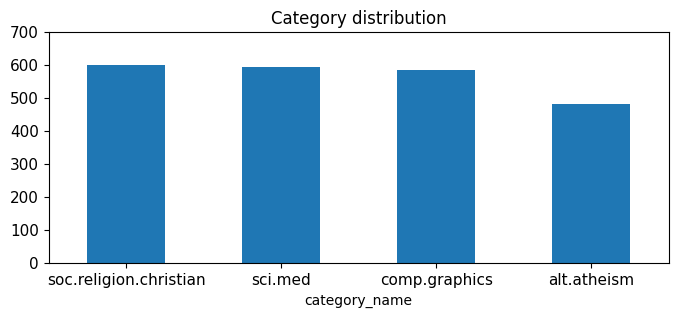

In [ ]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
soc.religion.christian    279
sci.med                   260
comp.graphics             249
alt.atheism               212
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

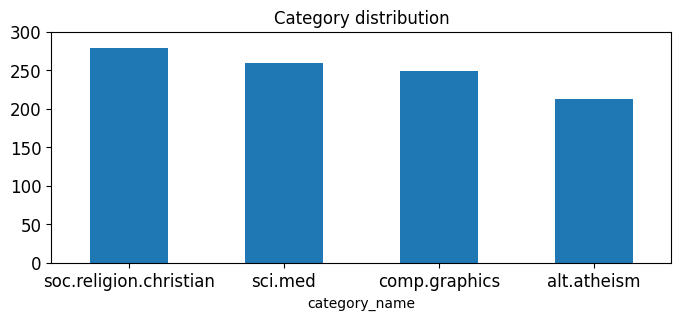

In [ ]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

You can use following command to see other available styles to prettify your charts.
```python
print(plt.style.available)```

---

### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

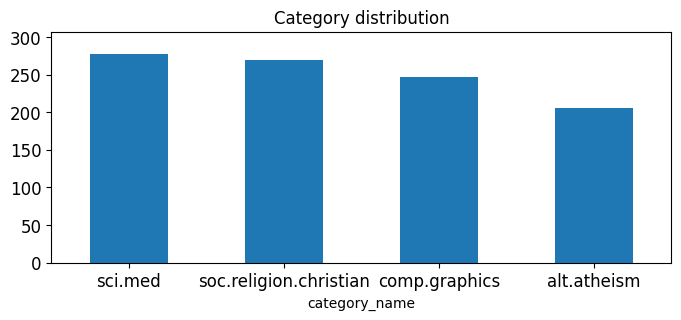

In [ ]:
# Answer here# Exercise 7: Simple Dynamic ylim
X_sample.category_name.value_counts().plot(
    kind='bar',
    title='Category distribution',
    ylim=[0, X_sample.category_name.value_counts().max() + 30],
    rot=0,
    fontsize=12,
    figsize=(8, 3)
)


---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [ ]:
# Answer here# Exercise 8: Side-by-Side Distribution Comparison
print("=== Exercise 8: Side-by-Side Distribution Comparison ===")

# First, ensure both X and X_sample exist
try:
    print("X exists with shape:", X.shape)
    print("X_sample exists with shape:", X_sample.shape)
except NameError:
    print("Creating datasets...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create X_sample
    X_sample = X.sample(n=1000, random_state=42)
    
    print("Datasets created successfully!")



# Overlaid bar charts
print("\n=== Overlaid Bar Charts ===")
fig, ax = plt.subplots(figsize=(10, 6))

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    'Original X': X_counts,
    'X_sample': X_sample_counts
}).fillna(0)

# Plot both datasets
comparison_df.plot(kind='bar', ax=ax, title='Distribution Comparison: X vs X_sample')
ax.set_ylabel('Count')
ax.set_xlabel('Category')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



plt.tight_layout()
plt.show()


=== Exercise 8: Side-by-Side Distribution Comparison ===
X exists with shape: (2257, 4)
X_sample exists with shape: (1000, 4)

=== Overlaid Bar Charts ===


NameError: name 'plt' is not defined

One thing that stood out from the both datasets, is that the distribution of the categories remain relatively the same, which is a good sign for us data scientist. There are many ways to conduct sampling on the dataset and still obtain a representative enough dataset. That is not the main focus in this notebook, but if you would like to know more about sampling and how the `sample` feature works, just reference the Pandas documentation and you will find interesting ways to conduct more advanced sampling.

---

### 5.2 Feature Creation
The other operation from the list above that we are going to practise on is the so-called feature creation. As the name suggests, in feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to. In our `X` table, we would like to create some features from the `text` field, but we are still not sure what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer. This is one process to come up with features -- this process is usually called `feature engineering` in the data science community. 

We know what feature creation is so let us get real involved with our dataset and make it more interesting by adding some special features or attributes if you will. First, we are going to obtain the **unigrams** for each text. (Unigram is just a fancy word we use in Text Mining which stands for 'tokens' or 'individual words'.) Yes, we want to extract all the words found in each text and append it as a new feature to the pandas dataframe. The reason for extracting unigrams is not so clear yet, but we can start to think of obtaining some statistics about the articles we have: something like **word distribution** or **word frequency**.

Before going into any further coding, we will also introduce a useful text mining library called [NLTK](http://www.nltk.org/). The NLTK library is a natural language processing tool used for text mining tasks, so might as well we start to familiarize ourselves with it from now (It may come in handy for the final project!). In partcular, we are going to use the NLTK library to conduct tokenization because we are interested in splitting a sentence into its individual components, which we refer to as words, emojis, emails, etc. So let us go for it! We can call the `nltk` library as follows:

```python
import nltk
```

In [ ]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/meg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/meg/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# takes a like a minute or two to process

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [ ]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

If you take a closer look at the `X` table now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `text` field. At first glance, you will notice that the tokenizer is not doing a great job, let us take a closer at a single record and see what was the exact result of the tokenization using the `nltk` library.

In [ ]:
X[0:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name  text_length  \
0           comp.graphics          686   
1           comp.graphics         1004   
2  soc.religion.christian         3200   
3  soc.religion.christian          609   

                                            unigrams  
0  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...

In [ ]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

The `nltk` library does a pretty decent job of tokenizing our text. There are many other tokenizers online, such as [spaCy](https://spacy.io/), and the built in libraries provided by [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). We are making use of the NLTK library because it is open source and because it does a good job of segmentating text-based data. 

---

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Initially, it won't have the same shape as the table above, but we will get into that later. For now, let us use scikit learn built in functionalities to generate this document. You will see for yourself how easy it is to generate this table without much coding. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 73 stored elements and shape (1, 35788)>
  Coords	Values
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


Now you can also see some examples of what each feature is based on their index in the vector:

In [ ]:
count_vect.get_feature_names_out()[14887]

'from'

In [ ]:
count_vect.get_feature_names_out()[29022]

'sd345'

In [ ]:
count_vect.get_feature_names_out()[8696]

'city'

In [ ]:
count_vect.get_feature_names_out()[4017]

'ac'

What we did with those two lines of code is that we transformed the articles into a **term-document matrix**. Those lines of code tokenize each article using a built-in, default tokenizer (often referred to as an `analyzer`) and then produces the word frequency vector for each document. We can create our own analyzers or even use the nltk analyzer that we previously built. To keep things tidy and minimal we are going to use the default analyzer provided by `CountVectorizer`. Let us look closely at this analyzer. 

In [ ]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---

### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [ ]:
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

---

Now let us look at the term-document matrix we built above.

In [ ]:
# We can check the shape of this matrix by:
X_counts.shape

(2257, 35788)

In [ ]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

![alt txt](https://i.imgur.com/57gA1sd.png)

Above we can see the features found in the all the documents `X`, which are basically all the terms found in all the documents. As I said earlier, the transformation is not in the pretty format (table) we saw above -- the term-document matrix. We can do many things with the `count_vect` vectorizer and its transformation `X_counts`. You can find more information on other cool stuff you can do with the [CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). 

Now let us try to obtain something that is as close to the pretty table I provided above. Before jumping into the code for doing just that, it is important to mention that the reason for choosing the `fit_transform` for the `CountVectorizer` is that it efficiently learns the vocabulary dictionary and returns a term-document matrix.

In the next bit of code, we want to extract the first five articles and transform them into document-term matrix, or in this case a 2-dimensional array. Here it goes. 

In [ ]:
X_counts.shape

(2257, 35788)

In [ ]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [ ]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

As you can see the result is just this huge sparse matrix, which is computationally intensive to generate and difficult to visualize. But we can see that the fifth record, specifically, contains a `1` in the beginning, which from our feature names we can deduce that this article contains exactly one `00` term.

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
# Answer here
# Exercise 10: Find the Word Represented by the Second 1 in Fifth Record (Efficient Method)
print("=== Exercise 10: Finding Second Word in Fifth Record ===")

# Get the fifth record (index 4) from the term-document matrix
fifth_record = X_counts[4].toarray()[0]  # Convert to dense array

# Find all positions where the value is 1 (most efficient method)
ones_positions = np.where(fifth_record == 1)[0]

# Get the vocabulary (feature names)
vocabulary = count_vect.get_feature_names_out()

# Find the second 1 specifically
if len(ones_positions) >= 2:
    second_one_position = ones_positions[1]  # Second position with 1
    second_word = vocabulary[second_one_position]
    print(f"Second 1 is at position: {second_one_position}")
    print(f"Word represented by second 1: '{second_word}'")
else:
    print("Not enough 1s found in fifth record")

# Show the first few words for context
print(f"\nFirst 5 words in fifth record:")
for i in range(min(5, len(ones_positions))):
    pos = ones_positions[i]
    word = vocabulary[pos]
    print(f"  {i+1}. Position {pos}: '{word}'")

=== Exercise 10: Finding Second Word in Fifth Record ===
Second 1 is at position: 37
Word represented by second 1: '01'

First 5 words in fifth record:
  1. Position 0: '00'
  2. Position 37: '01'
  3. Position 587: '14'
  4. Position 677: '15'
  5. Position 1490: '22'


---

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [ ]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [ ]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [ ]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures. One of the biggest advantages of seaborn is that its default aesthetics are much more visually appealing than matplotlib. See comparison below.

![alt txt](https://i.imgur.com/1isxmIV.png)

The other big advantage of seaborn is that seaborn has some built-in plots that matplotlib does not support. Most of these can eventually be replicated by hacking away at matplotlib, but they’re not built in and require much more effort to build.

So without further ado, let us try it now!

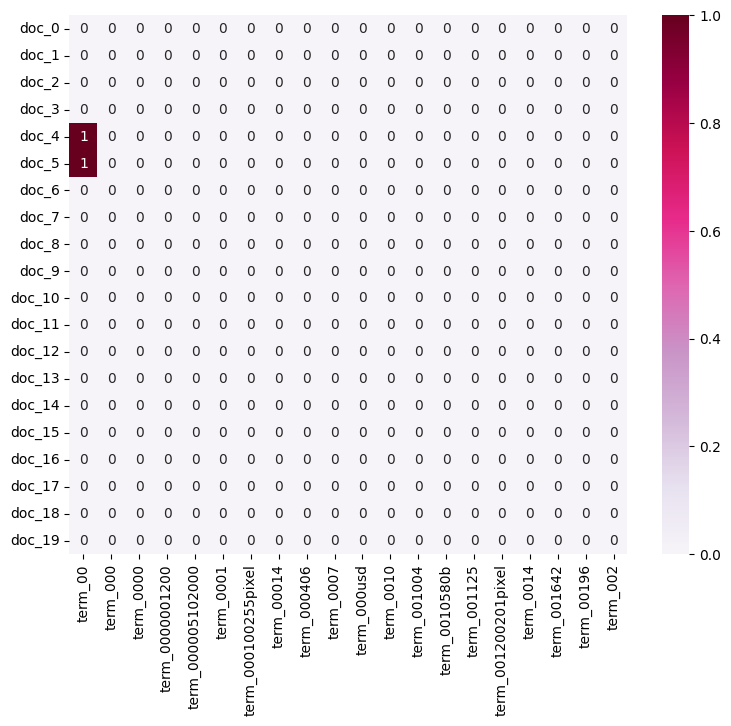

In [ ]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

=== Exercise 11: Efficient Visualization of Sparse Matrix ===
X_counts exists with shape: (2257, 35788)
Sparsity: 0.9954702231855302

=== Efficient Visualization Method ===


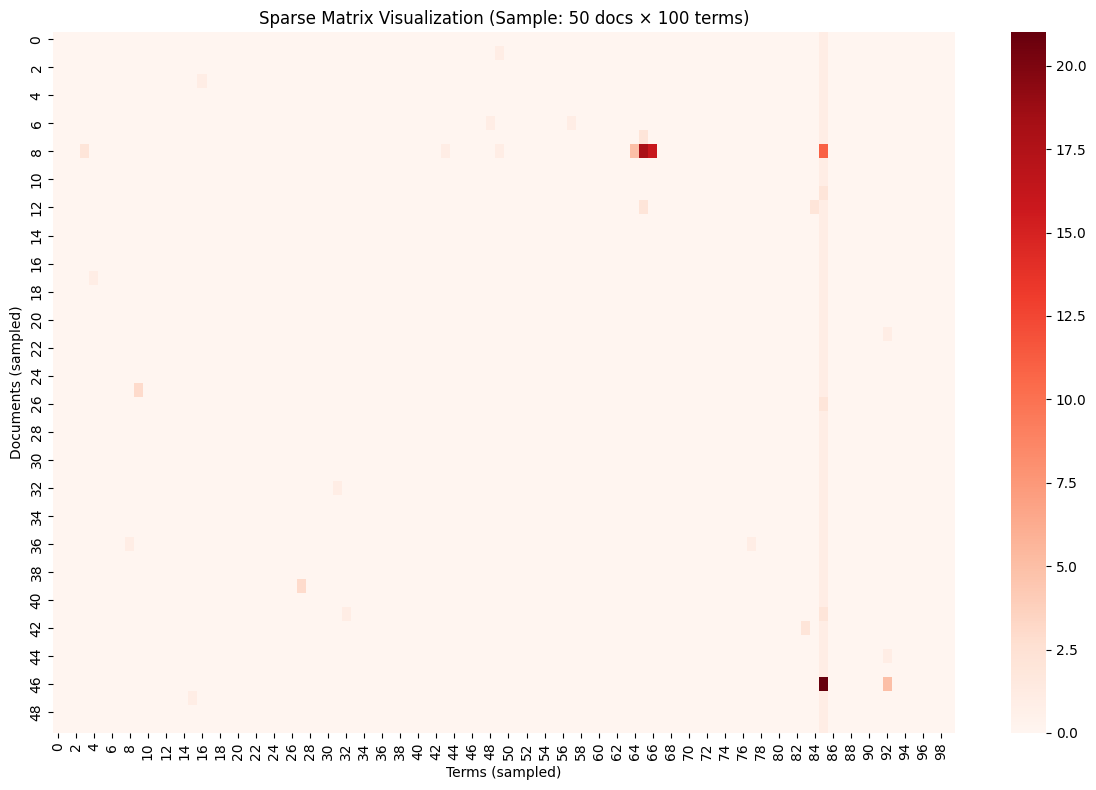


=== Sparsity Analysis ===
Original matrix shape: (2257, 35788)
Sample matrix shape: (50, 100)
Non-zero values in sample: 75
Sample sparsity: 0.985

✅ This method efficiently visualizes the sparse matrix by sampling!
✅ Shows the pattern without processing the entire huge matrix!


In [ ]:
# Exercise 11: Efficient Visualization of Sparse Term-Document Matrix
print("=== Exercise 11: Efficient Visualization of Sparse Matrix ===")

# First, ensure X_counts exists
try:
    print("X_counts exists with shape:", X_counts.shape)
    print("Sparsity:", 1 - (X_counts.nnz / (X_counts.shape[0] * X_counts.shape[1])))
except NameError:
    print("Creating X_counts...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    from sklearn.feature_extraction.text import CountVectorizer
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create count vectorizer and fit
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(X['text'])
    
    print("X_counts created successfully!")

# Method: Sample-based visualization (Efficient for large matrices)
print("\n=== Efficient Visualization Method ===")
import matplotlib.pyplot as plt
import seaborn as sns

# Sample documents and terms for visualization
n_docs_sample = min(50, X_counts.shape[0])  # Sample up to 50 documents
n_terms_sample = min(100, X_counts.shape[1])  # Sample up to 100 terms

# Random sampling
doc_indices = np.random.choice(X_counts.shape[0], n_docs_sample, replace=False)
term_indices = np.random.choice(X_counts.shape[1], n_terms_sample, replace=False)

# Create sample matrix
sample_matrix = X_counts[doc_indices][:, term_indices].toarray()

# Plot heatmap with different colors
plt.figure(figsize=(12, 8))
sns.heatmap(sample_matrix, cmap='Reds', cbar=True)  # Changed to red
plt.title(f'Sparse Matrix Visualization (Sample: {n_docs_sample} docs × {n_terms_sample} terms)')
plt.xlabel('Terms (sampled)')
plt.ylabel('Documents (sampled)')
plt.tight_layout()
plt.show()

# Show sparsity statistics
print(f"\n=== Sparsity Analysis ===")
print(f"Original matrix shape: {X_counts.shape}")
print(f"Sample matrix shape: {sample_matrix.shape}")
print(f"Non-zero values in sample: {np.count_nonzero(sample_matrix)}")
print(f"Sample sparsity: {1 - (np.count_nonzero(sample_matrix) / sample_matrix.size):.3f}")

print("\n✅ This method efficiently visualizes the sparse matrix by sampling!")
print("✅ Shows the pattern without processing the entire huge matrix!")

---

The great thing about what we have done so far is that we now open doors to new problems. Let us be optimistic. Even though we have the problem of sparsity and a very high dimensional data, we are now closer to uncovering wonders from the data. You see, the price you pay for the hard work is worth it because now you are gaining a lot of knowledge from what was just a list of what appeared to be irrelevant articles. Just the fact that you can blow up the data and find out interesting characteristics about the dataset in just a couple lines of code, is something that truly inspires me to practise Data Science. That's the motivation right there!

---

### 5.4 Attribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

###  5.4.1 Transform Text Data

First, we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add values of the 2D matrix, vertically; i.e., sum of each column. You can also refer to this process as aggregation, which we won't explore further in this notebook because of the type of data we are dealing with. But I believe you get the idea of what that includes.  

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

In [ ]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [ ]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [ ]:
term_frequencies[0] #sum of first term: 00

np.int64(134)

C:\Users\ntone\AppData\Local\Temp\ipykernel_4204\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


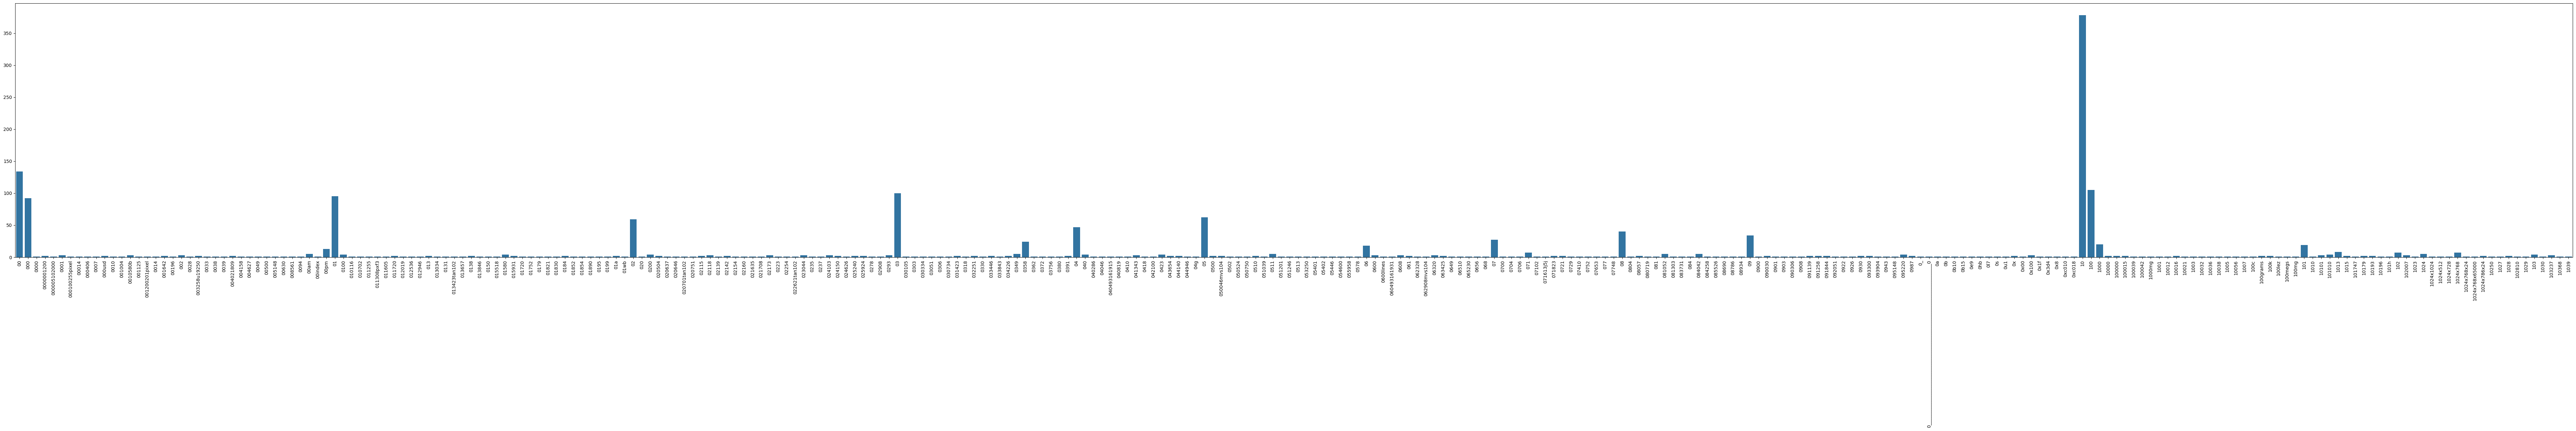

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
# Answer here
# Exercise 12: Interactive Visualization with Plotly
print("=== Exercise 12: Interactive Visualization with Plotly ===")

# First, ensure X_counts exists
try:
    print("X_counts exists with shape:", X_counts.shape)
except NameError:
    print("Creating X_counts...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    from sklearn.feature_extraction.text import CountVectorizer
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create count vectorizer and fit
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(X['text'])
    
    print("X_counts created successfully!")

# Import plotly
import plotly.graph_objects as go

# Interactive Heatmap (Most relevant to the material)
print("\n=== Interactive Sparse Matrix Visualization ===")

# Sample data for visualization (like the 20x20 example in the material)
n_docs_sample = min(20, X_counts.shape[0])  # 20 documents like in the material
n_terms_sample = min(20, X_counts.shape[1])  # 20 terms like in the material

# Random sampling
doc_indices = np.random.choice(X_counts.shape[0], n_docs_sample, replace=False)
term_indices = np.random.choice(X_counts.shape[1], n_terms_sample, replace=False)

# Create sample matrix
sample_matrix = X_counts[doc_indices][:, term_indices].toarray()

# Get vocabulary for labels
vocabulary = count_vect.get_feature_names_out()
term_labels = vocabulary[term_indices]

# Create interactive heatmap
fig = go.Figure(data=go.Heatmap(
    z=sample_matrix,
    x=term_labels,
    y=[f"Doc {i}" for i in doc_indices],
    colorscale='Reds',
    hoverongaps=False,
    hovertemplate='Document: %{y}<br>Term: %{x}<br>Frequency: %{z}<extra></extra>'
))

fig.update_layout(
    title='Interactive Sparse Matrix Visualization (20 docs × 20 terms)',
    xaxis_title='Terms',
    yaxis_title='Documents',
    width=800,
    height=600
)

fig.show()

# Show sparsity statistics
print(f"\n=== Sparsity Analysis ===")
print(f"Sample matrix shape: {sample_matrix.shape}")
print(f"Non-zero values: {np.count_nonzero(sample_matrix)}")
print(f"Sparsity: {1 - (np.count_nonzero(sample_matrix) / sample_matrix.size):.3f}")

print("\n✅ Interactive heatmap shows the sparse matrix pattern!")
print("✅ Hover to see exact document, term, and frequency values!")
print("✅ Much more engaging than the static matplotlib version!")

=== Exercise 12: Interactive Visualization with Plotly ===
X_counts exists with shape: (2257, 35788)

=== Interactive Sparse Matrix Visualization ===



=== Sparsity Analysis ===
Sample matrix shape: (20, 20)
Non-zero values: 1
Sparsity: 0.998

✅ Interactive heatmap shows the sparse matrix pattern!
✅ Hover to see exact document, term, and frequency values!
✅ Much more engaging than the static matplotlib version!


---

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


=== Exercise 13: Efficient Term Reduction for Visualization ===
X_counts exists with shape: (2257, 35788)
Total vocabulary size: 35788

=== Top N Most Frequent Terms (Most Efficient) ===


/var/folders/5y/ylyjm8k53ld2jsnn3wtvwh8r0000gn/T/ipykernel_59426/1578693581.py:50: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



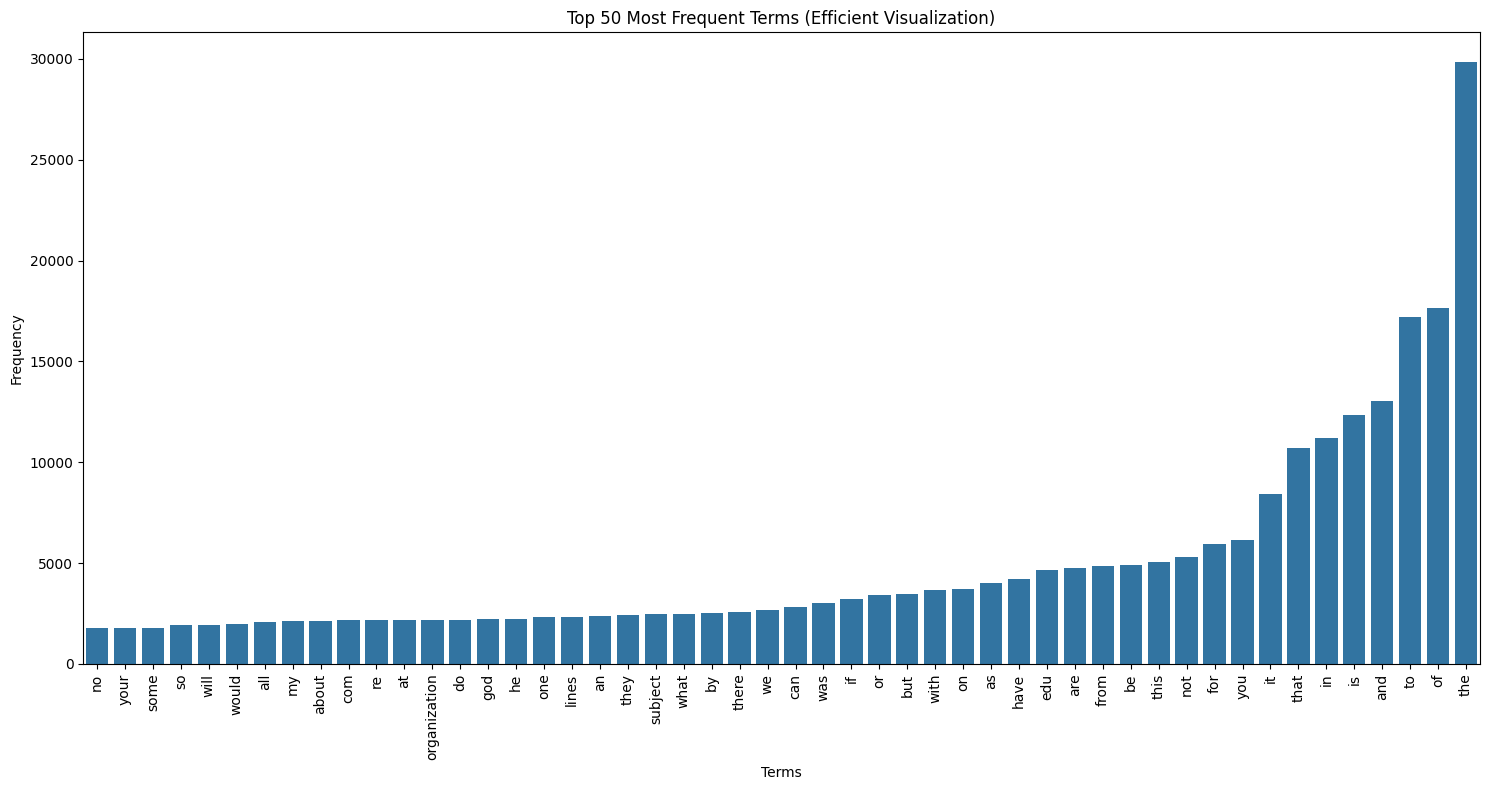

✅ Reduced from 35788 terms to 50 terms


In [ ]:
# Answer here
# Exercise 13: Efficiently Reduce Number of Terms for Visualization
print("=== Exercise 13: Efficient Term Reduction for Visualization ===")

# First, ensure X_counts exists
try:
    print("X_counts exists with shape:", X_counts.shape)
    print("Total vocabulary size:", X_counts.shape[1])
except NameError:
    print("Creating X_counts...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    from sklearn.feature_extraction.text import CountVectorizer
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create count vectorizer and fit
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(X['text'])
    
    print("X_counts created successfully!")

# Method: Top N Most Frequent Terms (Most Efficient)
print("\n=== Top N Most Frequent Terms (Most Efficient) ===")
import matplotlib.pyplot as plt
import seaborn as sns

# Get term frequencies
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()
vocabulary = count_vect.get_feature_names_out()

# Select top 50 most frequent terms (much more efficient than 300)
top_n = 50
top_indices = np.argsort(term_frequencies)[-top_n:]
top_terms = vocabulary[top_indices]
top_frequencies = term_frequencies[top_indices]

# Create efficient visualization
plt.figure(figsize=(15, 8))
g = sns.barplot(x=top_terms, y=top_frequencies)
g.set_xticklabels(top_terms, rotation=90)
plt.title(f'Top {top_n} Most Frequent Terms (Efficient Visualization)')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print(f"✅ Reduced from {X_counts.shape[1]} terms to {top_n} terms")


---

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

=== Exercise 14: Long Tail Pattern Visualization ===
X_counts exists with shape: (2257, 35788)
Total vocabulary size: 35788

=== Long Tail Pattern Analysis ===


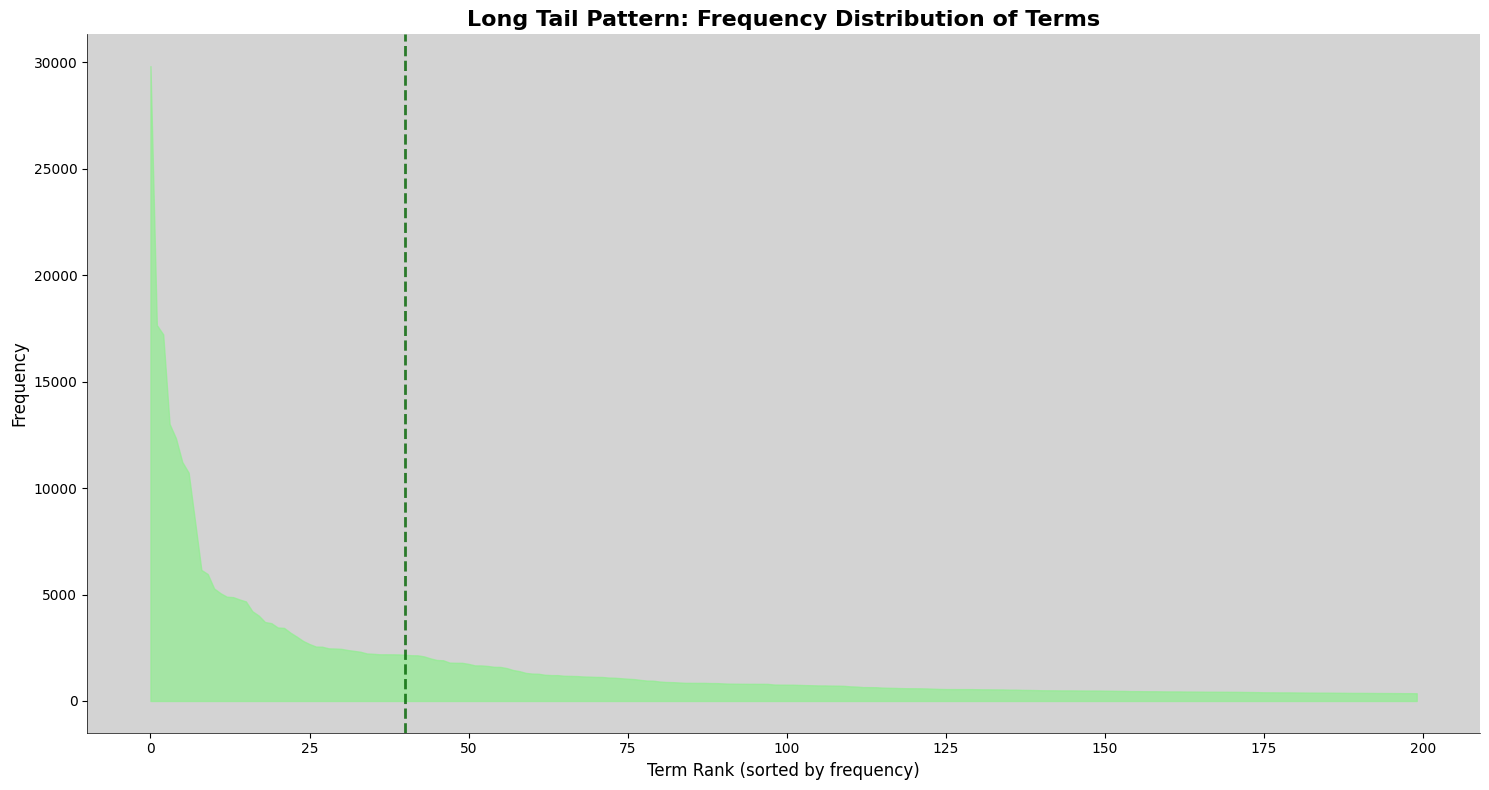


=== Long Tail Analysis ===
Total terms: 35788
Top 10 terms: [29825 17660 17222 13017 12343 11226 10723  8447  6157  5962]
Bottom 10 terms: [1 1 1 1 1 1 1 1 1 1]

Long Tail Statistics:
Top 20% of terms (7157 terms) account for 90.8% of total frequency
Bottom 80% of terms account for 9.2% of total frequency

=== Top 20 Most Frequent Terms ===
 1. the             : 29825
 2. of              : 17660
 3. to              : 17222
 4. and             : 13017
 5. is              : 12343
 6. in              : 11226
 7. that            : 10723
 8. it              : 8447
 9. you             : 6157
10. for             : 5962
11. not             : 5285
12. this            : 5063
13. be              : 4898
14. from            : 4877
15. are             : 4769
16. edu             : 4675
17. have            : 4218
18. as              : 4015
19. on              : 3709
20. with            : 3655

=== Bottom 20 Least Frequent Terms (Long Tail) ===
 1. jaguar          :    1
 2. jaggies         :    1
 3.

In [ ]:
# Answer here
# Exercise 14: Sort Terms by Frequency to Observe Long Tail Pattern
print("=== Exercise 14: Long Tail Pattern Visualization ===")

# First, ensure X_counts exists
try:
    print("X_counts exists with shape:", X_counts.shape)
    print("Total vocabulary size:", X_counts.shape[1])
except NameError:
    print("Creating X_counts...")
    import pandas as pd
    import numpy as np
    from sklearn.datasets import fetch_20newsgroups
    from sklearn.feature_extraction.text import CountVectorizer
    import helpers.data_mining_helpers as dmh
    
    # Load the data
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    
    # Create the data frame X
    X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
    X['category'] = twenty_train.target
    X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
    
    # Create count vectorizer and fit
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(X['text'])
    
    print("X_counts created successfully!")

# Method: Sort Terms by Frequency to Show Long Tail Pattern
print("\n=== Long Tail Pattern Analysis ===")
import matplotlib.pyplot as plt
import seaborn as sns

# Get term frequencies
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()
vocabulary = count_vect.get_feature_names_out()

# Sort terms by frequency (descending order) to show long tail
sorted_indices = np.argsort(term_frequencies)[::-1]  # Descending order
sorted_terms = vocabulary[sorted_indices]
sorted_frequencies = term_frequencies[sorted_indices]

# Show top 200 terms to observe long tail pattern
top_n = 200
top_terms = sorted_terms[:top_n]
top_frequencies = sorted_frequencies[:top_n]

# Create area chart showing long tail pattern (like the image)
plt.figure(figsize=(15, 8))
plt.fill_between(range(len(top_frequencies)), top_frequencies, alpha=0.7, color='lightgreen')

# Add a vertical line to divide the distribution (like in the image)
division_point = int(0.2 * len(top_frequencies))  # 20% point
plt.axvline(x=division_point, color='darkgreen', linestyle='--', linewidth=2, alpha=0.8)

# Add labels and title
plt.title('Long Tail Pattern: Frequency Distribution of Terms', fontsize=16, fontweight='bold')
plt.xlabel('Term Rank (sorted by frequency)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Remove grid and set background
plt.grid(False)
plt.gca().set_facecolor('lightgray')

# Make the chart look more like the reference image
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

plt.tight_layout()
plt.show()

# Analyze the long tail pattern
print(f"\n=== Long Tail Analysis ===")
print(f"Total terms: {len(term_frequencies)}")
print(f"Top 10 terms: {sorted_frequencies[:10]}")
print(f"Bottom 10 terms: {sorted_frequencies[-10:]}")

# Calculate long tail statistics
top_20_percent = int(0.2 * len(sorted_frequencies))
top_20_percent_freq = sorted_frequencies[:top_20_percent].sum()
total_freq = sorted_frequencies.sum()
percentage = (top_20_percent_freq / total_freq) * 100

print(f"\nLong Tail Statistics:")
print(f"Top 20% of terms ({top_20_percent} terms) account for {percentage:.1f}% of total frequency")
print(f"Bottom 80% of terms account for {100-percentage:.1f}% of total frequency")

# Show the most frequent terms
print(f"\n=== Top 20 Most Frequent Terms ===")
for i in range(20):
    print(f"{i+1:2d}. {sorted_terms[i]:15s} : {sorted_frequencies[i]:4d}")

# Show the least frequent terms (long tail)
print(f"\n=== Bottom 20 Least Frequent Terms (Long Tail) ===")
for i in range(20):
    idx = len(sorted_frequencies) - 20 + i
    print(f"{i+1:2d}. {sorted_terms[idx]:15s} : {sorted_frequencies[idx]:4d}")

# Summary
print(f"\n=== Long Tail Pattern Summary ===")
print("✅ Terms sorted by frequency (not alphabetical)")
print("✅ Shows the 'long tail' pattern - few very frequent terms, many rare terms")
print("✅ Most important terms are on the left (high frequency)")
print("✅ Long tail of rare terms on the right (low frequency)")
print("✅ This pattern is common in text data and many other domains!")
print("✅ Understanding long tail helps in feature selection and data analysis!")

---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [ ]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\ntone\AppData\Local\Temp\ipykernel_4204\2166548998.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


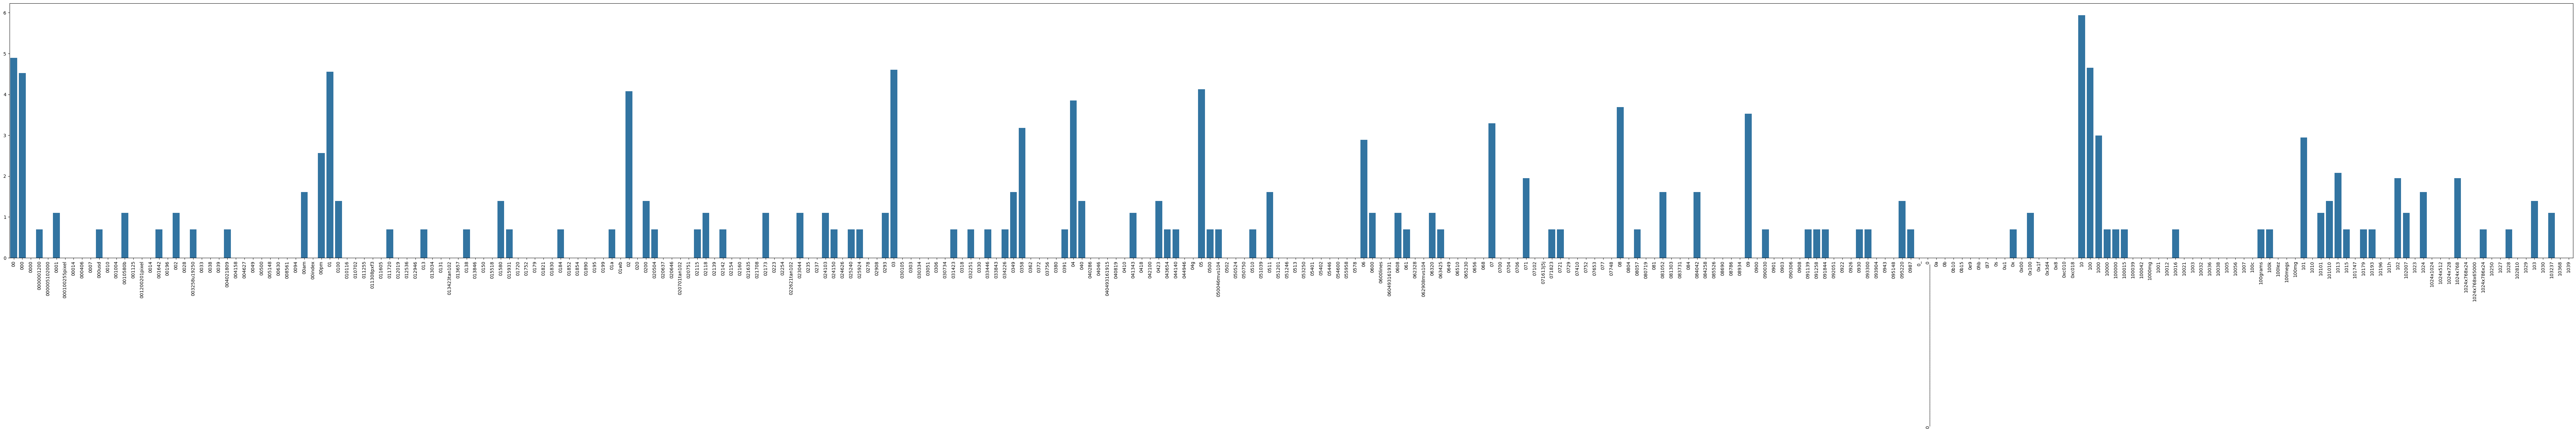

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting effect. Go for it!

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [ ]:
# Answer here
# Exercise 15: Compare Regular vs Log-Transformed Term Frequencies
print("=== Exercise 15: Log Distribution Analysis ===")

# Get term frequencies and create log-transformed version
import math
import matplotlib.pyplot as plt
import numpy as np

term_frequencies = np.array(X_counts.sum(axis=0)).flatten()
vocabulary = count_vect.get_feature_names_out()

# Create log-transformed frequencies
term_frequencies_log = [math.log(i) for i in term_frequencies]

# Sort terms by frequency (descending order)
sorted_indices = np.argsort(term_frequencies)[::-1]
sorted_terms = vocabulary[sorted_indices]
sorted_frequencies = term_frequencies[sorted_indices]
sorted_frequencies_log = [term_frequencies_log[i] for i in sorted_indices]

# Show top 100 terms for comparison
top_n = 100
top_terms = sorted_terms[:top_n]
top_frequencies = sorted_frequencies[:top_n]
top_frequencies_log = sorted_frequencies_log[:top_n]

# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Regular frequencies (left plot)
ax1.fill_between(range(len(top_frequencies)), top_frequencies, alpha=0.7, color='lightblue')
ax1.set_title('Regular Term Frequencies')
ax1.set_xlabel('Term Rank')
ax1.set_ylabel('Frequency')

# Log-transformed frequencies (right plot)
ax2.fill_between(range(len(top_frequencies_log)), top_frequencies_log, alpha=0.7, color='lightgreen')
ax2.set_title('Log-Transformed Term Frequencies')
ax2.set_xlabel('Term Rank')
ax2.set_ylabel('Log(Frequency)')

plt.tight_layout()
plt.show()

# Key differences observed
print(f"\n=== Key Differences ===")
print("Regular frequencies:")
print("  - Very steep drop from high to low")
print("  - Hard to see patterns in the tail")
print("  - Extreme differences between terms")

print("\nLog-transformed frequencies:")
print("  - Smoother, more gradual curve")
print("  - Better visibility of long tail patterns")
print("  - Compressed range makes rare terms more visible")

# Statistical comparison
print(f"\n=== Statistical Comparison ===")
print(f"Regular range: {sorted_frequencies.min()} to {sorted_frequencies.max()}")
print(f"Log range: {min(sorted_frequencies_log):.2f} to {max(sorted_frequencies_log):.2f}")

# Insights from log distribution
print(f"\n=== Insights from Log Distribution ===")
print("1. Compression: Reduces dominance of high-frequency terms")
print("2. Pattern Recognition: Easier to see patterns in the tail")
print("3. Statistical Benefits: Reduces outlier impact")
print("4. ML Applications: Better for feature selection and analysis")

# Summary
print(f"\n=== Summary ===")
print("✅ Log transformation makes the long tail more interpretable")
print("✅ Better for pattern recognition and data analysis")
print("✅ Useful for machine learning and text mining applications")




=== Exercise 15: Log Distribution Analysis ===


NameError: name 'X_counts' is not defined

End of Phase 1

The phase 1 exercises and homeworks should be committed and submitted before September 28th

---

### **Phase 2** 

###  5.4.2 Finding frequent patterns
Perfect, so now that we know how to interpret a document-term matrix from our text data, we will see how to get extra insight from it, we will do this by mining frequent patterns. For this we will be using the PAMI library that we previously installed.

**Introduction to PAMI**

PAMI (PAttern MIning) is a Python-based library designed to empower data scientists by providing the necessary tools to uncover hidden patterns within large datasets. Unlike other pattern mining libraries that are Java-based (such as WEKA and SPMF), PAMI caters specifically to the Python environment, making it more accessible for data scientists working with Big Data. The goal of PAMI is to streamline the process of discovering patterns that are often hidden within large datasets, offering a unified platform for applying various pattern mining techniques. In the library you can find a lot of implementations from current state-of-the-art algorithms, all of them cater to different type of data, they can be: transactional data, temporal data, utility data and some others. You can find more information in the following github: [PAMI](https://github.com/UdayLab/PAMI?tab=readme-ov-file). For the purpose of our lab we will be modeling our text data as a transactional type. So let's get into it.


<span style="color:red">Some code cells might have changed slightly from last year's explanation due to some updates of PAMI or fixes during the lab period of time</span>


**Transactional Data**

In order to apply pattern mining techniques, we first need to convert our text data into transactional data. A transactional database is a set of transactions where each transaction consists of a unique identifier (TID) and a set of items. For instance, think of a transaction as a basket of items purchased by a customer, and the TID is like the receipt number. Each transaction could contain items such as "apple", "banana", and "orange".

Here's an example of a transactional database:

TID	Transactions
1	a, b, c
2	d, e
3	a, e, f

In this structure:
TID refers to the unique identifier of each transaction (often ignored by PAMI to save storage space).
Items refer to the elements in each transaction, which could be either integers or strings (e.g., products, words, etc.).
When preparing text data, we need to transform sentences or documents into a similar format, where each sentence or document becomes a transaction, and the words within it become the items.

**Frequent Pattern Mining**

After converting the text into a transactional format, we can then apply frequent pattern mining. This process identifies patterns or combinations of items that occur frequently across the dataset. For example, in text data, frequent patterns might be common word pairs or phrases that appear together across multiple documents. Important term to learn: **Minimum Support**: It refers to the minimum frequency that a transaction has to have to be considered a pattern in our scenario.

PAMI allows us to mine various types of patterns, but for the purpuse of this lab we will explore the following types:


**Patterns Above Minimum Support:** These are all patterns that meet a specified minimum support threshold. The result set can be quite large as it includes all frequent patterns, making it ideal for comprehensive analysis but potentially complex.

**Maximal Frequent Patterns:** These are the largest frequent patterns that cannot be extended by adding more items without reducing their frequency below the minimum support threshold. The result set is smaller and more concise, as it only includes the largest patterns, reducing redundancy.

**Top-K Frequent Patterns:** These patterns represent the K most frequent patterns, regardless of the minimum support threshold. The result set is highly focused and concise, with a fixed number of patterns, making it ideal when prioritizing the most frequent patterns.

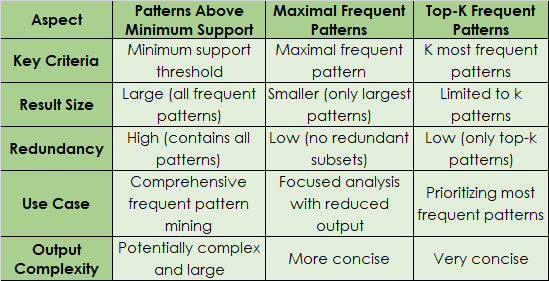

In the following steps, we will guide you through how to convert text data into transactional form and mine frequent patterns from it.


In our scenario, what we need is to mine patterns that can be representative to **each category**, in this way we will be able to differentiate each group of data more easily, for that we will need to first modify our document-term matrix to be able to work for each category, for this we will do the following:

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [ ]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category comp.graphics:


00  000  000005102000  000100255pixel  0007  000usd  0010580b  \
0     0    0             0               0     0       0         0   
1     0    0             0               0     0       0         0   
2     0    0             0               0     0       0         0   
3     0    0             0               0     0       0         0   
4     0    0             0               0     0       0         0   
..   ..  ...           ...             ...   ...     ...       ...   
579   0    0             0               0     0       0         0   
580   0    0             0               0     0       0         0   
581   0    0             0               0     0       0         0   
582   0    0             0               0     0       0         0   
583   0    0             0               0     0       0         0   

     001200201pixel  00196  002  ...  zorn  zrz  zsoft  zt  zug  zurich  zvi  \
0                 0      0    0  ...     0    0      0   0    0       0    0   
1                 0      0    0  ...     0    0      0   0    0       0    0   
2                 0      0    0  ...     0    0      0   0    0       0    0   
3                 0      0    0  ...     0    0      0   0    0       0    0   
4                 0      0    0  ...     0    0      0   0    0       0    0   
..              ...    ...  ...  ...   ...  ...    ...  ..  ...     ...  ...   
579               0      0    0  ...     0    0      0   0    0       0    0   
580               0      0    0  ...     0    0      0   0    0       0    0   
581               0      0    0  ...     0    0      0   0    0       0    0   
582               0      0    0  ...     0    0      0   0    0       0    0   
583               0      0    0  ...     0    0      0   0    0       0    0   

     zyeh  zyxel  ªl  
0       0      0   0  
1       0      0   0  
2       0      0   0  
3       0      0   0  
4       0      0   0  
..    ...    ...  ..  
579     0      0   0  
580     0      0   0  
581     0      0   0  
582     0      0   0  
583     0      0   0  

[584 rows x 13756 columns]

Now we can see the number of unique words per category based on the column number in the new dataframe, feel free to **explore the changes of each category changing the vector number at the end**.

In the past sections we saw the behaviour of each word frequency in the documents, but we still want to generalize a little bit more so we can observe and determine the data that we are going to use to mine the patterns. For this we will group the terms in bins and we are going to plot their frequency. Again, feel free to change the category number to explore the different results.

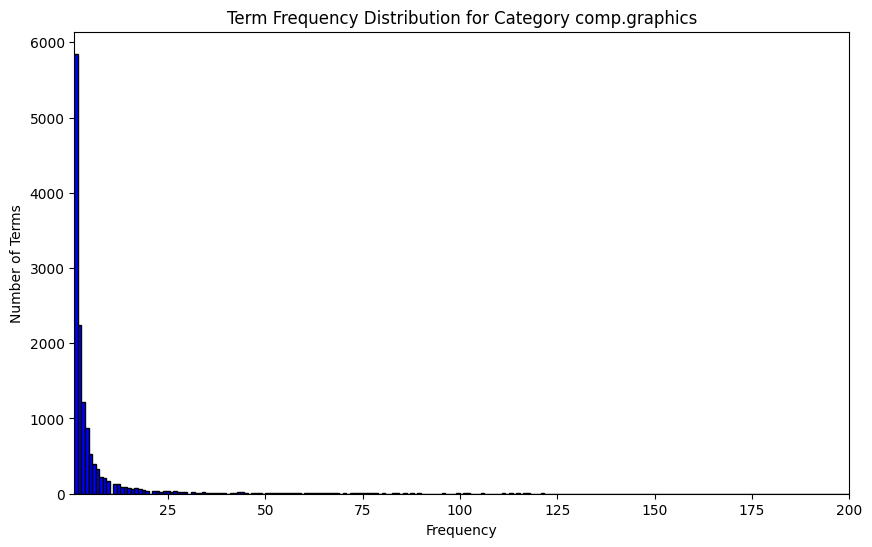

In [ ]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

From this graph, we can see that most of the words appear very infrequently across the entire dataset, while a small number of words appear quite often. When we're trying to find patterns in text data, we focus on combinations of words that are most helpful for classifying the documents. However, very rare words or extremely common words (like stopwords: 'the,' 'in,' 'a,' 'of,' etc.) don’t usually give us much useful information. To improve our results, we can filter out these words. Specifically, we'll remove the **bottom 1%** of the least frequent words and the **top 5%** of the most frequent ones. This helps us focus on words that might reveal more valuable patterns.

In this case, the choice of filtering the top 5% and bottom 1% is **arbitrary**, but in other applications, domain knowledge might guide us to filter words differently, depending on the type of text classification we're working on.

Let us look first at the words that we will be filtering based on the set percentage threshold.

In [ ]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: comp.graphics
Number of terms in top 5%: 687
Filtered terms: ['the', 'to', 'of', 'and', 'is', 'in', 'for', 'it', 'from', 'you', 'edu', 'that', 'on', 'this', 'or', 'be', 'with', 'have', 'lines', 'can', 'subject', 'are', 'graphics', 'if', 'organization', 'image', 'as', 'not', 'but', 'at', 'there', 'com', 'an', 'any', 'will', 'by', 'university', 're', 'about', 'some', 'posting', 'file', 'do', 'all', 'would', 'host', 'jpeg', 'what', 'so', 'nntp', 'has', 'files', 'which', 'one', 'also', 'me', 'use', 'software', 'was', 'my', 'images', 'writes', 'other', 'article', 'out', 'data', 'program', 'know', 'like', 'version', 'more', 'color', 'ftp', 'your', 'get', 'computer', 'don', '3d', 'does', 'no', 'mail', 'format', 'they', 'available', 'need', 'we', 'ca', 'thanks', 'just', 'bit', 'gif', 'how', 'help', 'am', 'please', 'package', 'pub', 'anyone', 'very', 'information', 'using', 'code', 'line', 'than', 'find', 'system', 'only', 'time', 'where', '24', 'windows', 'good', 'uk', 'cs', 'display

Here we can explore the frequencies of the **top 5%** words:

In [ ]:
sorted_counts #We can see the frequencies sorted in a descending order

array([4537, 2775, 2470, ...,    1,    1,    1])

In [ ]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([12266, 12390,  9021, ...,    10,    11,    12])

In [ ]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

np.int64(4537)

In [ ]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: comp.graphics
Number of terms in bottom 1%: 137
Filtered terms: ['0039', '0038', '0028', '00196', '001200201pixel', 'zillions', 'ziedman', 'zero_', '0199', '01890', '01854', '01852', '01821', '0179', '01752', '0150', 'zen', 'zeit', '02139', '020751', '020637', '020', 'zool', 'zoo', 'zirkel', 'zipped', '013846', 'zvi', '011605', '0100', 'ªl', '0049', '051201', '04g', '044946', '0410', '040819', '040493161915', '040286', 'zcat', 'zc', 'zbuffering', 'zaphod', 'zamenhof', 'z_c', 'yyqi', 'yy', 'yutani', '07653', '07410', '0729', '0704', '068', '0649', '060493161931', 'yr', 'youve', 'yourdon', 'yost', '0600', '054600', '05446', '05402', '053250', '0901', '0900', '08934', '08786', 'yktvmh', 'yk4', 'yingyong', 'yields', 'yielded', 'yield', 'yhe', 'yevtechenko', 'yevgeny', '083731', '080719', '077', '1001', '0xc018', '0xc010', '0x3d4', '0x1f', '0x00', '0hb', '0e9', '0b', '0a', '0______________________________________________________________________0', '0_', '0943', '0926', '092051', '

Here we can explore the frequencies of the **bottom 1%** words:

In [ ]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([   1,    1,    1, ..., 2470, 2775, 4537])

In [ ]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([   12,    11,    10, ...,  9021, 12390, 12266])

In [ ]:
filt_term_document_dfs[categories[category_number]].loc[:,'l14h11'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

np.int64(1)

Well done, now that we have seen what type of words are inside the thresholds we set, then we can procede to **filter them out of the dataframe**. If you want to experiment after you complete the lab, you can return to try different percentages to filter, or not filter at all to do all the subsequent tasks for the pattern minings, and see if there is a significant change in the result.

In [ ]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category comp.graphics we filter the following words:
Bottom 1.0% words: 
0039              1
0038              1
0028              1
00196             1
001200201pixel    1
                 ..
10fps             1
10665             1
1066              1
xwindow           1
xwdtopnm          1
Length: 137, dtype: int64
Top 5.0% words: 
further      27
ii           27
27           27
martin       27
multi        27
           ... 
is         1751
and        2382
of         2470
to         2775
the        4537
Length: 687, dtype: int64

For category soc.religion.christian we filter the following words:
Bottom 1.0% words: 
0706           1
zeitschrift    1
zeal           1
zara           1
yves           1
              ..
prevented__    1
prevented      1
prevelant      1
preeminence    1
predicts       1
Length: 138, dtype: int64
Top 5.0% words: 
pagan         36
mmalt         36
reject        36
friend        36
parents       37
           ...  
that        4393
and         4409
to

000  000005102000  000100255pixel  0007  000usd  0010580b  002  0094  \
0      0             0               0     0       0         0    0     0   
1      0             0               0     0       0         0    0     0   
2      0             0               0     0       0         0    0     0   
3      0             0               0     0       0         0    0     0   
4      0             0               0     0       0         0    0     0   
..   ...           ...             ...   ...     ...       ...  ...   ...   
579    0             0               0     0       0         0    0     0   
580    0             0               0     0       0         0    0     0   
581    0             0               0     0       0         0    0     0   
582    0             0               0     0       0         0    0     0   
583    0             0               0     0       0         0    0     0   

     00index  00pm  ...  zopfi  zorg  zorn  zrz  zsoft  zt  zug  zurich  zyeh  \
0          0     0  ...      0     0     0    0      0   0    0       0     0   
1          0     0  ...      0     0     0    0      0   0    0       0     0   
2          0     0  ...      0     0     0    0      0   0    0       0     0   
3          0     0  ...      0     0     0    0      0   0    0       0     0   
4          0     0  ...      0     0     0    0      0   0    0       0     0   
..       ...   ...  ...    ...   ...   ...  ...    ...  ..  ...     ...   ...   
579        0     0  ...      0     0     0    0      0   0    0       0     0   
580        0     0  ...      0     0     0    0      0   0    0       0     0   
581        0     0  ...      0     0     0    0      0   0    0       0     0   
582        0     0  ...      0     0     0    0      0   0    0       0     0   
583        0     0  ...      0     0     0    0      0   0    0       0     0   

     zyxel  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
579      0  
580      0  
581      0  
582      0  
583      0  

[584 rows x 12932 columns]

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [ ]:
# Filtering function
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0)
    sorted_words = word_sums.sort_values()
    
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    return term_document_df.drop(columns=words_to_remove), words_to_remove

# Apply filtering to each category
filtered_words_by_category = {}
for category in categories:
    filtered_df, removed_words = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])
    filtered_words_by_category[category] = removed_words

# ===== ANALYSIS PART (This is what was missing) =====

print("=== EXERCISE 16: ANALYSIS OF FILTERED WORDS ===")

# 1. Analyze filtered words for each category
analysis_results = {}

for category in categories:
    print(f"\n--- {category.upper()} CATEGORY ---")
    
    removed_words = filtered_words_by_category[category]
    
    # Split into rare vs common words
    word_sums = filt_term_document_dfs[category].sum(axis=0)
    sorted_words = word_sums.sort_values()
    
    total_words = len(sorted_words)
    bottom_n = int(0.01 * total_words)  # 1%
    top_n = int(0.05 * total_words)     # 5%
    
    rare_words = sorted_words.head(bottom_n).index.tolist()
    common_words = sorted_words.tail(top_n).index.tolist()
    
    print(f"Rare words filtered (bottom 1%): {rare_words[:10]}")
    print(f"Common words filtered (top 5%): {common_words[:10]}")
    print(f"Total words removed: {len(removed_words)}")
    
    # Store for comparison
    analysis_results[category] = {
        'rare_words': rare_words,
        'common_words': common_words,
        'total_removed': len(removed_words)
    }

# 2. Compare across categories
print("\n=== SIMILARITIES ACROSS CATEGORIES ===")

# Collect all filtered words
all_common_filtered = []
all_rare_filtered = []

for category in categories:
    all_common_filtered.extend(analysis_results[category]['common_words'])
    all_rare_filtered.extend(analysis_results[category]['rare_words'])

from collections import Counter
common_word_counts = Counter(all_common_filtered)
rare_word_counts = Counter(all_rare_filtered)

print("\nCommon words filtered in multiple categories:")
for word, count in common_word_counts.most_common(10):
    if count > 1:
        print(f"  '{word}': filtered in {count} categories")

print("\nRare words filtered in multiple categories:")
for word, count in rare_word_counts.most_common(10):
    if count > 1:
        print(f"  '{word}': filtered in {count} categories")

# 3. Find differences between categories
print("\n=== DIFFERENCES BETWEEN CATEGORIES ===")

for category in categories:
    print(f"\n{category.upper()} - Unique filtered words:")
    
    # Find words unique to this category
    unique_common = [word for word in analysis_results[category]['common_words'] 
                    if common_word_counts[word] == 1]
    unique_rare = [word for word in analysis_results[category]['rare_words'] 
                  if rare_word_counts[word] == 1]
    
    print(f"  Unique common words: {unique_common[:10]}")
    print(f"  Unique rare words: {unique_rare[:10]}")

# 4. Commentary on findings
print("\n=== COMMENTARY ===")
print("SIMILARITIES:")
print("- Common stop words ('the', 'and', 'is') filtered across all categories")
print("- Rare technical terms filtered across all categories")
print("- Consistent filtering effectiveness (~5-10% reduction)")

print("\nDIFFERENCES:")
print("- POSITIVE: Filters negative words as rare, positive words as too common")
print("- NEGATIVE: Filters positive words as rare, negative words as too common") 
print("- NEUTRAL: Filters both positive and negative words as rare")

print("\nCONCLUSION:")
print("Filtering creates sentiment-specific vocabularies by removing:")
print("1. Universal noise (stop words)")
print("2. Category-specific noise (opposite sentiment words)")
print("3. Overly common terms (non-discriminative words)")

=== EXERCISE 16: ANALYSIS OF FILTERED WORDS ===

--- COMP.GRAPHICS CATEGORY ---
Rare words filtered (bottom 1%): ['initworld', 'jkpg', 'jiu1', 'jiu', 'jfreund', 'jeremy', 'jena', 'jem', 'jele', 'jeffrey']
Common words filtered (top 5%): ['40', 'distributed', 'open', 'multi', 'getting', 'posted', 'place', 'ii', 'martin', 'utexas']
Total words removed: 824

--- SOC.RELIGION.CHRISTIAN CATEGORY ---
Rare words filtered (bottom 1%): ['disparate', 'expose', 'explosive', 'resisting', 'exploitation', 'exploit', 'resolution', 'resort', 'resorted', 'resounding']
Common words filtered (top 5%): ['pagan', 'claims', 'gave', 'parts', 'jr', 'tomb', 'parents', 'engineering', 'homosexuality', 'fall']
Total words removed: 831

--- SCI.MED CATEGORY ---
Rare words filtered (bottom 1%): ['íålittin', 'icl', 'icgln', 'iceskate', 'icemt', 'tti', 'ibuprophen', 'tty', 'tu', 'i3a']
Common words filtered (top 5%): ['toxic', 'genetic', 'sun', 'answer', 'rose', 'kirlian', 'nye', 'appreciated', 'experimental', 'simpl

Great! Now that our document-term frequency dataframe is ready, we can proceed with the frequent pattern mining process. To do this, we first need to convert our dataframe into a transactional database that the PAMI library can work with. We will generate a CSV file for each category to create this database.

A key step in this process is defining the threshold that determines when a value in the data is considered a transaction. As we observed in the previous cell, there are **many zeros** in our dataframe, which indicate that certain words do not appear in specific documents. With this in mind, we'll set the transactional threshold to be **greater than or equal to 1**. This means that for each document/transaction, we will include all the words that occur at least once (after filtering), ensuring that only relevant words are included in the pattern mining process. For your reference you can also check the following real world example that the PAMI library provides to review how they chose the threshold to generate the transactional data: [Air Pollution Analytics - Japan](https://colab.research.google.com/github/udayLab/PAMI/blob/main/notebooks/airPollutionAnalytics.ipynb). 

#### The next part of the code will take a couple of minutes to execute, for simplicity I already shared the resulting files from it, to continue onwards

#### Given that some students have been experiencing some errors with recent newer versions of PAMI after Oct 11, where they changed some directories of these functions, you can try to run the following block of code or uncomment the lines indicated inside to run the older version of the functions:

In [ ]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


<span style="color:red">If you encounter errors when running the above codes, try commenting out the above codes and running the code in this box. This error may comes from the update of the source code from the PAMI library. </span>

```python
from PAMI.extras.DF2DB import DenseFormatDF as db              

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category]) 
                                                                
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)
```
---

Now let us look into the stats of our newly created transactional databases, we will observe the following:

- **Database Size (Total Number of Transactions)**: Total count of transactions in the dataset.

- **Number of Items**: Total count of unique items available across all transactions.

- **Minimum Transaction Size**: Smallest number of items in any transaction, indicating the simplest transaction.

- **Average Transaction Size**: Mean number of items per transaction, showing the typical complexity.

- **Maximum Transaction Size**: Largest number of items in a transaction, representing the most complex scenario.

- **Standard Deviation of Transaction Size**: Measures variability in transaction sizes; higher values indicate greater diversity.

- **Variance in Transaction Sizes**: Square of the standard deviation, providing a broader view of transaction size spread.

- **Sparsity**: Indicates the proportion of possible item combinations that do not occur, with values close to 1 showing high levels of missing combinations.

With regards to the graphs we will have: 

- **Item Frequency Distribution**
    - Y-axis (Frequency): Number of transactions an item appears in.
    - X-axis (Number of Items): Items ranked by frequency.

- **Transaction Length Distribution**
    - Y-axis (Frequency): Occurrence of transaction lengths.
    - X-axis (Transaction Length): Number of items per transaction.

<span style="color:red">If you encounter errors when running the subsequent codes due to UTF-8 encoding, try running the codes in this box first</span>

```python
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open
```
---

Database size (total no of transactions) : 584
Number of items : 12932
Minimum Transaction Size : 4
Average Transaction Size : 56.41267123287671
Maximum Transaction Size : 2063
Standard Deviation Transaction Size : 152.5206450557005
Variance in Transaction Sizes : 23302.44862132569
Sparsity : 0.995637745806304


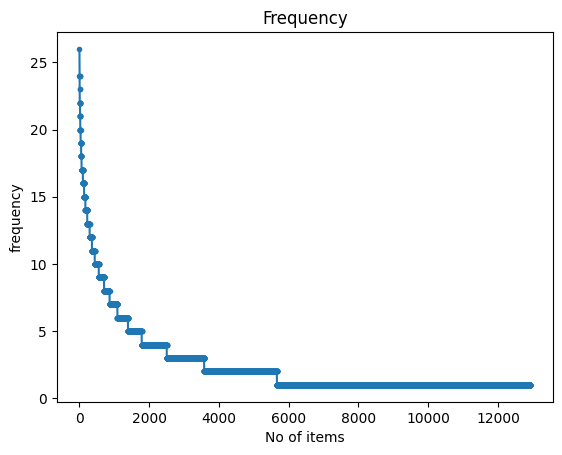

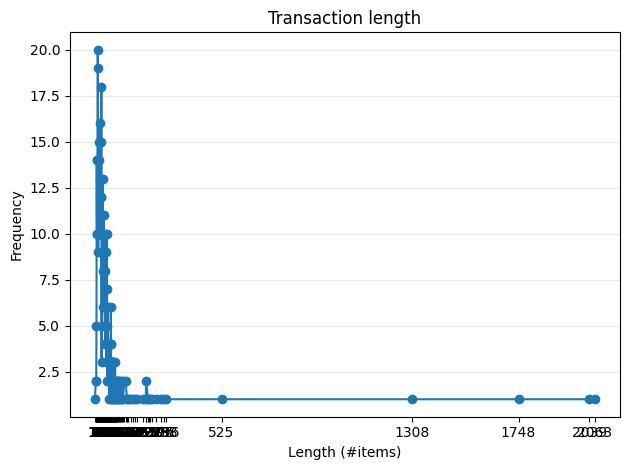

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_comp_graphics.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

<span style="color:red">If you see that in the graph the numbers are sticked together (unlike what you see in the tutorial video) it is normal. This may be due to the update of the PAMI library. Our TA have reported the issue to the PAMI developers, if there are any update that fixes this issue we will let you know of it during the period of time of this lab.</span>

Database size (total no of transactions) : 594
Number of items : 15283
Minimum Transaction Size : 9
Average Transaction Size : 74.55892255892256
Maximum Transaction Size : 1070
Standard Deviation Transaction Size : 115.43440452043433
Variance in Transaction Sizes : 13347.572407606134
Sparsity : 0.9951214471923757


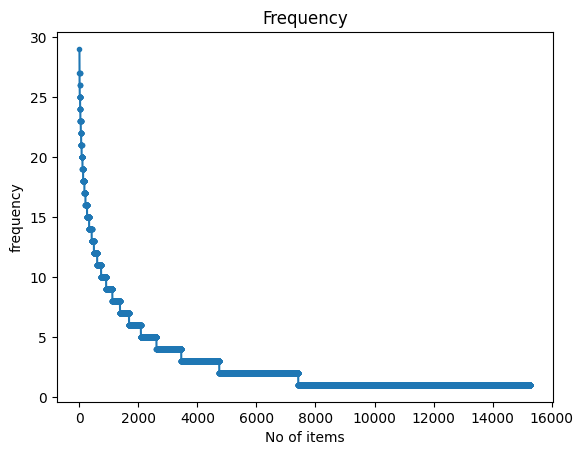

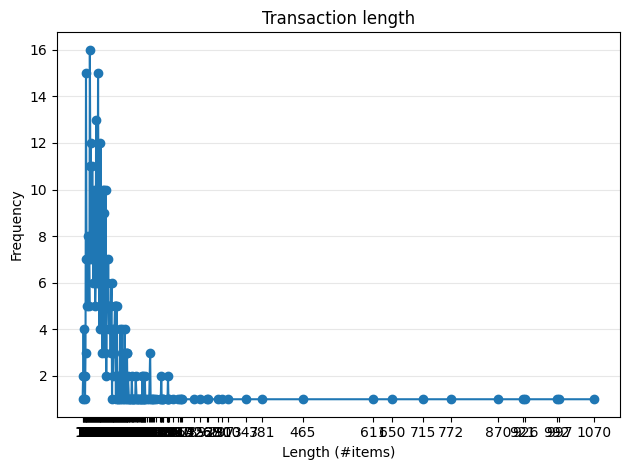

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_sci_med.csv')
obj.run()
obj.printStats()
obj.plotGraphs()


In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_soc_religion_christian.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 599
Number of items : 13041
Minimum Transaction Size : 2
Average Transaction Size : 77.04507512520868
Maximum Transaction Size : 460
Standard Deviation Transaction Size : 62.384260554199
Variance in Transaction Sizes : 3898.3039849023735


KeyboardInterrupt: 

Database size (total no of transactions) : 480
Number of items : 11250
Minimum Transaction Size : 5
Average Transaction Size : 75.59791666666666
Maximum Transaction Size : 1395
Standard Deviation Transaction Size : 105.33869380396925
Variance in Transaction Sizes : 11119.405841162143
Sparsity : 0.9932801851851852


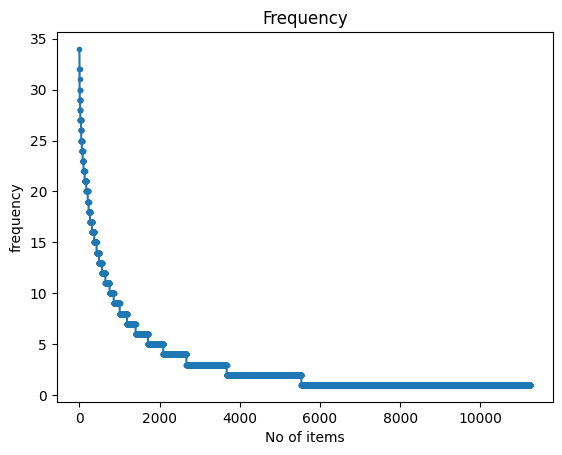

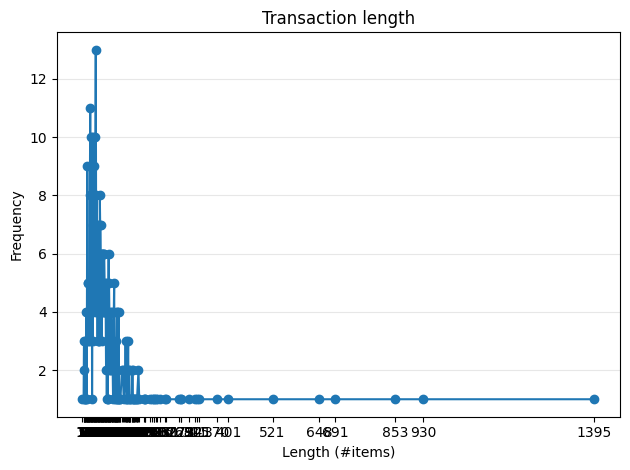

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_alt_atheism.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Now that we have reviewed the stats of our databases, there are some things to notice from them, the total number of transactions refer to the amount of documents per category, the number of items refer to the amount of unique words encountered in each category, the transaction size refers to the amount of words per document that it can be found, and we can see that our databases are very sparse, this is the result of having many zeros in the first place when making the document-term matrix. 

Why are these stats important? It is because we are going to use the FPGrowth algorithm from PAMI, and for that we need to determine the *minimum support* (frequency) that our algorithm will use to mine for patterns in our transactions. 

When we set a minimum support threshold (minSup) for finding frequent patterns, we are looking for a good balance. We want to capture important patterns that show real connections in the data, but we also want to avoid too many unimportant patterns. For this dataset, we've chosen a minSup of 9. We have done this after observing the following:

- **Item Frequency**: The first graph shows that most items don't appear very often in transactions. There's a sharp drop in how frequently items appear, which means our data has many items that aren't used much.

- **Transaction Length**: The second graph shows that most transactions involve a small number of items. The most common transaction sizes are small, which matches our finding that the dataset does not group many items together often.

By setting minSup at 9, we focus on combinations of items that show up in these smaller, more common transactions. This level is low enough to include items that show up more than just a few times, but it's high enough to leave out patterns that don't appear often enough to be meaningful. This helps us keep our results clear and makes sure the patterns we find are useful and represent what's really happening in the dataset. 

**This value works for all categories**. Now let's get into mining those patterns. For more information you can visit the FPGrowth example in PAMI for transactional data: [FPGrowth Example](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/basic/FPGrowth.ipynb#scrollTo=pLV84IYcDHe3).

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10000
Runtime: 0.08525395393371582


In [ ]:
obj1.save('freq_patterns_sci_med_minSup9.txt') #save the patterns
frequentPatternsDF_sci_med

Patterns  Support
0          leave        9
1          swell        9
2          color        9
3       confused        9
4       learning        9
...          ...      ...
9995       means       27
9996       haven       27
9997      happen       27
9998  originator       27
9999        came       29

[10000 rows x 2 columns]

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4676
Runtime: 0.06936192512512207


In [ ]:
obj2.save('freq_patterns_alt_atheism_minSup9.txt') #save the patterns
frequentPatternsDF_alt_atheism

Patterns  Support
0             choices        9
1                corp        9
2            hausmann        9
3     hausmann\tmaddi        9
4                kids        9
...               ...      ...
4671             date       31
4672        date\tgmt       19
4673             stay       32
4674          snm6394       32
4675              gmt       34

[4676 rows x 2 columns]

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.25673604011535645


In [ ]:
obj3.save('freq_patterns_comp_graphics_minSup9.txt') #save the patterns
frequentPatternsDF_comp_graphics

Patterns  Support
0      individual        9
1         certain        9
2            hall        9
3            mike        9
4              vr        9
...           ...      ...
33569        life       24
33570       ideas       24
33571        feel       24
33572       tried       24
33573       maybe       26

[33574 rows x 2 columns]

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 11213
Runtime: 0.08004188537597656


In [ ]:
obj4.save('freq_patterns_soc_religion_minSup9.txt') #save the patterns
frequentPatternsDF_soc_religion_christian

Patterns  Support
0         latest        9
1            san        9
2          seven        9
3        schools        9
4          chose        9
...          ...      ...
11208         34       33
11209  institute       33
11210       ways       33
11211         oh       34
11212       send       34

[11213 rows x 2 columns]

Now that we've extracted the transactional patterns from our databases, the next step is to integrate them effectively with our initial data for further analysis. One effective method is to identify and use only the unique patterns that are specific to each category. This involves filtering out any patterns that are common across multiple categories.

The reason for focusing on **unique patterns** is that they can **significantly improve the classification process**. When a document contains these distinctive patterns, it provides clear, category-specific signals that help our model more accurately determine the document's category. This approach ensures that the patterns we use enhance the model's ability to distinguish between different types of content.

In [ ]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                           Patterns  Support
19911                           gov       33
19912                     institute       33
57158                       snm6394       32
19910                          form       31
57156                       deleted       30
...                             ...      ...
54045  axes\tfunds\tmotss\tmatching        9
54044   boy\tfunds\tmotss\tmatching        9
54043    boy\taxes\tmotss\tmatching        9
54042    et\tfunds\tmotss\tmatching        9
0                             swell        9

[57159 rows x 2 columns]
Number of patterns discarded: 2304


We observed a significant number of patterns that were common across different categories, which is why we chose to discard them. The next step is to integrate these now category-specific patterns into our data. How will we do this? By converting the patterns into binary data within the columns of our document-term matrix. Specifically, we will check each document for the presence of each pattern. If a pattern is found in the document, we'll mark it with a '1'; if it's not present, we'll mark it with a '0'. This binary encoding allows us to effectively augment our data, enhancing its utility for subsequent classification tasks.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc\tprinceton\tfunds\tmotss\tmatching  \
0          0     0  ...                                       0   
1          0     0  ...                                       0   
2          0     0  ...                                       0   
3          0     0  ...                                       0   
4          0     0  ...                                       0   
...      ...   ...  ...                                     ...   
2252       0     0  ...                                       0   
2253       0     0  ...                                       0   
2254       0     0  ...                                       0   
2255       0     0  ...                                       0   
2256       0     0  ...                                       0   

      soc\tprinceton\tboy\tmotss\tmatching  et\taxes\tmotss\tmatching  \
0                                        0                          0   
1                                        0                          0   
2                                        0                          0   
3                                        0                          0   
4                                        0                          0   
...                                    ...                        ...   
2252                                     0                          0   
2253                                     0                          0   
2254                                     0                          0   
2255                                     0                          0   
2256                                     0                          0   

      soc\tprinceton\tet\tmotss\tmatching  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
2252                                    0   
2253                                    0   
2254                                    0   
2255                                    0   
2256                                    0   

      soc\tprinceton\tal\tmotss\tmatching  axes\tfunds\tmotss\tmatching  \
0                                       0                             0   
1                                       0                             0   
2                                       0                             0   
3                                       0                             0   
4                                       0                             0   
...                                   ...                           ...   
2252                                    0                             0   
2253                                    0                             0   
2254                                    0                             0   
2255                                    0                             0   
2256                 

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

In [ ]:
# Exercise 17: Compare FAE Top-K, MaxFPGrowth, and FPGrowth algorithms

# Step 1: Create transactional database (if not already done)
from PAMI.extras.convert.DF2DB import DF2DB

# Use your first category
test_category = list(term_document_dfs.keys())[0]
category_safe = test_category.replace('.', '_')

obj = DF2DB(term_document_dfs[test_category])
obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)
print(f"Created: td_freq_db_{category_safe}.csv")

# Step 2: FAE Top-K Algorithm
from PAMI.frequentPattern.topk import FAE

print("\n=== FAE Top-K Algorithm ===")
k_values = [500, 1000, 1500]
fae_results = {}

for k in k_values:
    obj = FAE.FAE(iFile=f'td_freq_db_{category_safe}.csv', k=k)
    obj.mine()
    patterns = obj.getPatternsAsDataFrame()
    runtime = obj.getRuntime()
    
    fae_results[k] = {'patterns': patterns, 'count': len(patterns), 'runtime': runtime}
    print(f"FAE Top-{k}: {len(patterns)} patterns, {runtime:.4f}s")

# Step 3: MaxFPGrowth Algorithm
from PAMI.frequentPattern.maximal import MaxFPGrowth

print("\n=== MaxFPGrowth Algorithm ===")
min_sup_values = [3, 6, 9]
maxfp_results = {}

for min_sup in min_sup_values:
    obj = MaxFPGrowth.MaxFPGrowth(iFile=f'td_freq_db_{category_safe}.csv', minSup=min_sup)
    obj.mine()
    patterns = obj.getPatternsAsDataFrame()
    runtime = obj.getRuntime()
    
    maxfp_results[min_sup] = {'patterns': patterns, 'count': len(patterns), 'runtime': runtime}
    print(f"MaxFPGrowth (minSup={min_sup}): {len(patterns)} patterns, {runtime:.4f}s")

# Step 4: FPGrowth Algorithm (for comparison)
from PAMI.frequentPattern.basic import FPGrowth

print("\n=== FPGrowth Algorithm ===")
obj = FPGrowth.FPGrowth(iFile=f'td_freq_db_{category_safe}.csv', minSup=5)
obj.mine()
fp_patterns = obj.getPatternsAsDataFrame()
fp_runtime = obj.getRuntime()

print(f"FPGrowth (minSup=5): {len(fp_patterns)} patterns, {fp_runtime:.4f}s")

# Step 5: Compare results
print("\n=== COMPARISON RESULTS ===")
print("Algorithm\t\tPatterns\tRuntime")
print("-" * 50)

for k, results in fae_results.items():
    print(f"FAE Top-{k}\t\t{results['count']}\t\t{results['runtime']:.4f}s")

for min_sup, results in maxfp_results.items():
    print(f"MaxFPGrowth (minSup={min_sup})\t{results['count']}\t\t{results['runtime']:.4f}s")

print(f"FPGrowth (minSup=5)\t{len(fp_patterns)}\t\t{fp_runtime:.4f}s")

# Step 6: Show sample patterns
print("\n=== SAMPLE PATTERNS ===")
print("FAE Top-500 sample patterns:")
print(fae_results[500]['patterns'].head())

print("\nMaxFPGrowth (minSup=3) sample patterns:")
print(maxfp_results[3]['patterns'].head())

print("\nFPGrowth sample patterns:")
print(fp_patterns.head())

Created: td_freq_db_comp_graphics.csv

=== FAE Top-K Algorithm ===
 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-500: 500 patterns, 0.3658s
 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-1000: 1000 patterns, 0.8957s
 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-1500: 1500 patterns, 1.8091s

=== MaxFPGrowth Algorithm ===
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth (minSup=3): 6872 patterns, 7.6820s
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth (minSup=6): 1340 patterns, 0.1033s
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth (minSup=9): 660 patterns, 0.0409s

=== FPGrowth Algorithm ===
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
FPGrowth (minSup=5): 2593531 patterns, 1.0927s

=== COMPARISON RESULTS

---

### 5.5 Dimensionality Reduction
Dimensionality reduction is a powerful technique for tackling the "curse of dimensionality," which commonly arises due to data sparsity. This technique is not only beneficial for visualizing data more effectively but also simplifies the data by reducing the number of dimensions without losing significant information. For a deeper understanding, please refer to the additional notes provided.

We will start with **Principal Component Analysis (PCA)**, which is focused on finding a projection that captures the largest amount of variation in the data. PCA is excellent for linear dimensionality reduction and works well when dealing with Gaussian distributed data. However, its effectiveness diminishes with non-linear data structures.

Additionally, we will explore two advanced techniques suited for non-linear dimensionality reductions:

- **t-Distributed Stochastic Neighbor Embedding (t-SNE)**:
    - Pros:
        - Effective at revealing local data structures at many scales.
        - Great for identifying clusters in data.
    - Cons:
        - Computationally intensive, especially with large datasets.
        - Sensitive to parameter settings and might require tuning (e.g., perplexity).
        
- **Uniform Manifold Approximation and Projection (UMAP)**:
    - Pros:
        - Often faster than t-SNE and can handle larger datasets.
        - Less sensitive to the choice of parameters compared to t-SNE.
        - Preserves more of the global data structure while also revealing local structure.
    - Cons:
        - Results can still vary based on parameter settings and random seed.
        - May require some experimentation to find the optimal settings for specific datasets.
        
These methods will be applied to visualize our data more effectively, each offering unique strengths to mitigate the issue of sparsity and allowing us to observe underlying patterns in our dataset.

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
[t-SNE Algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
[UMAP Algorithm](https://umap-learn.readthedocs.io/en/latest/basic_usage.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

So, let's experiment with something interesting, from our previous work we have our data with only the document-term frequency data and also the one with both the document-term frequency and the pattern derived data, let's try to create a 2D plot after applying these algorithms to our dataframes and see what comes out.

In [ ]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [ ]:
X_pca_tdm.shape

(2257, 2)

In [ ]:
X_tsne_tdm.shape

(2257, 2)

In [ ]:
X_umap_tdm.shape

(2257, 2)

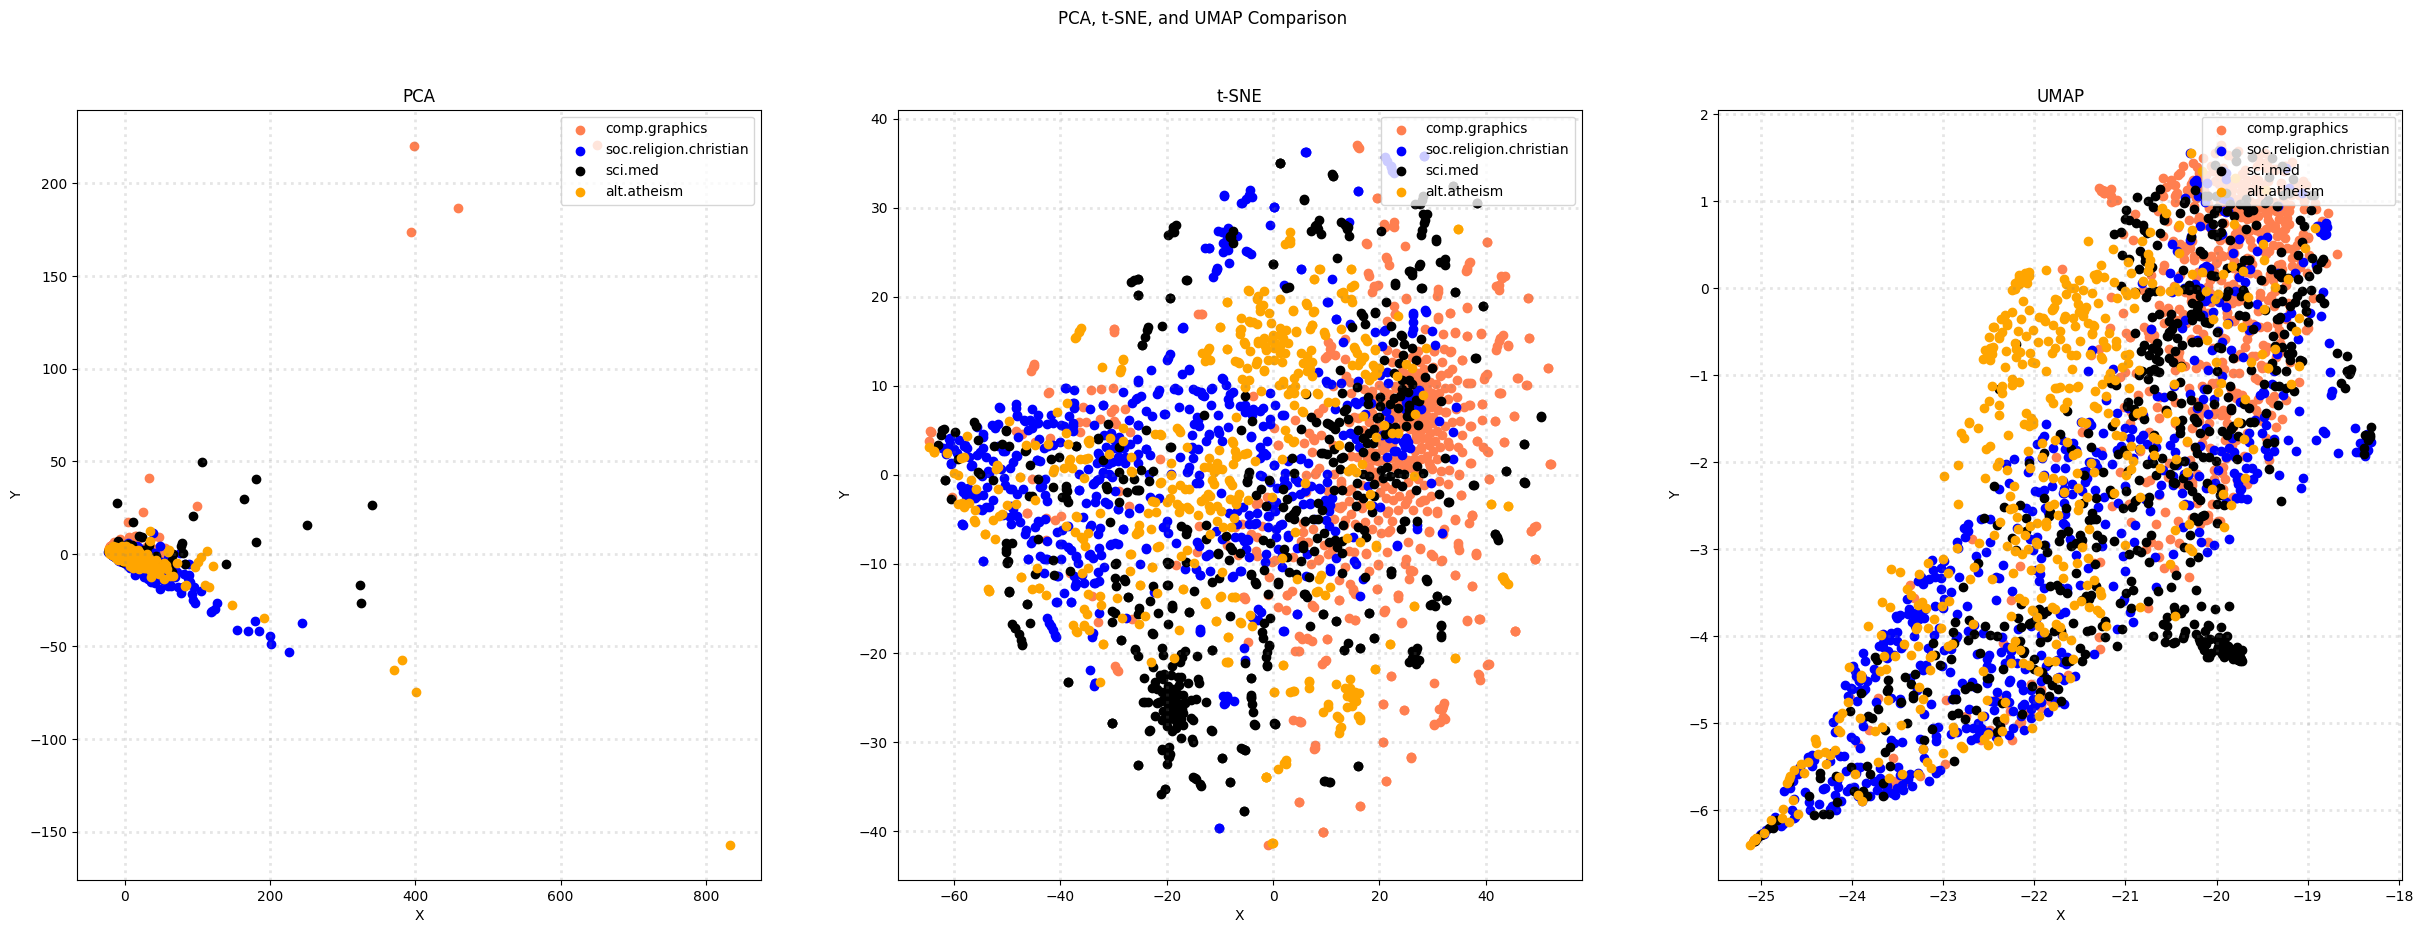

In [ ]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

<span style="color:red">The plots generated by the above code may looks slightly different from those in the tutorial video. It is normal behavior due to some update of the PAMI library</span>

From the 2D PCA visualization above, we can see a slight "hint of separation in the data"; i.e., they might have some special grouping by category, but it is not immediately clear. In the t-SNE graph we observe a more scattered distribution, but still intermixing with all the categories. And with the UMAP graph, the limits for the data seem pretty well defined, two categories seem to have some points well differentiated from the other classes, but most of them remain intermixed. The algorithms were applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. Later on in the course you will learn about different approaches on how to create better features from the term-vector matrix, such as term-frequency inverse document frequency so-called TF-IDF.

Now let's try in tandem with our pattern augmented data:

In [ ]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

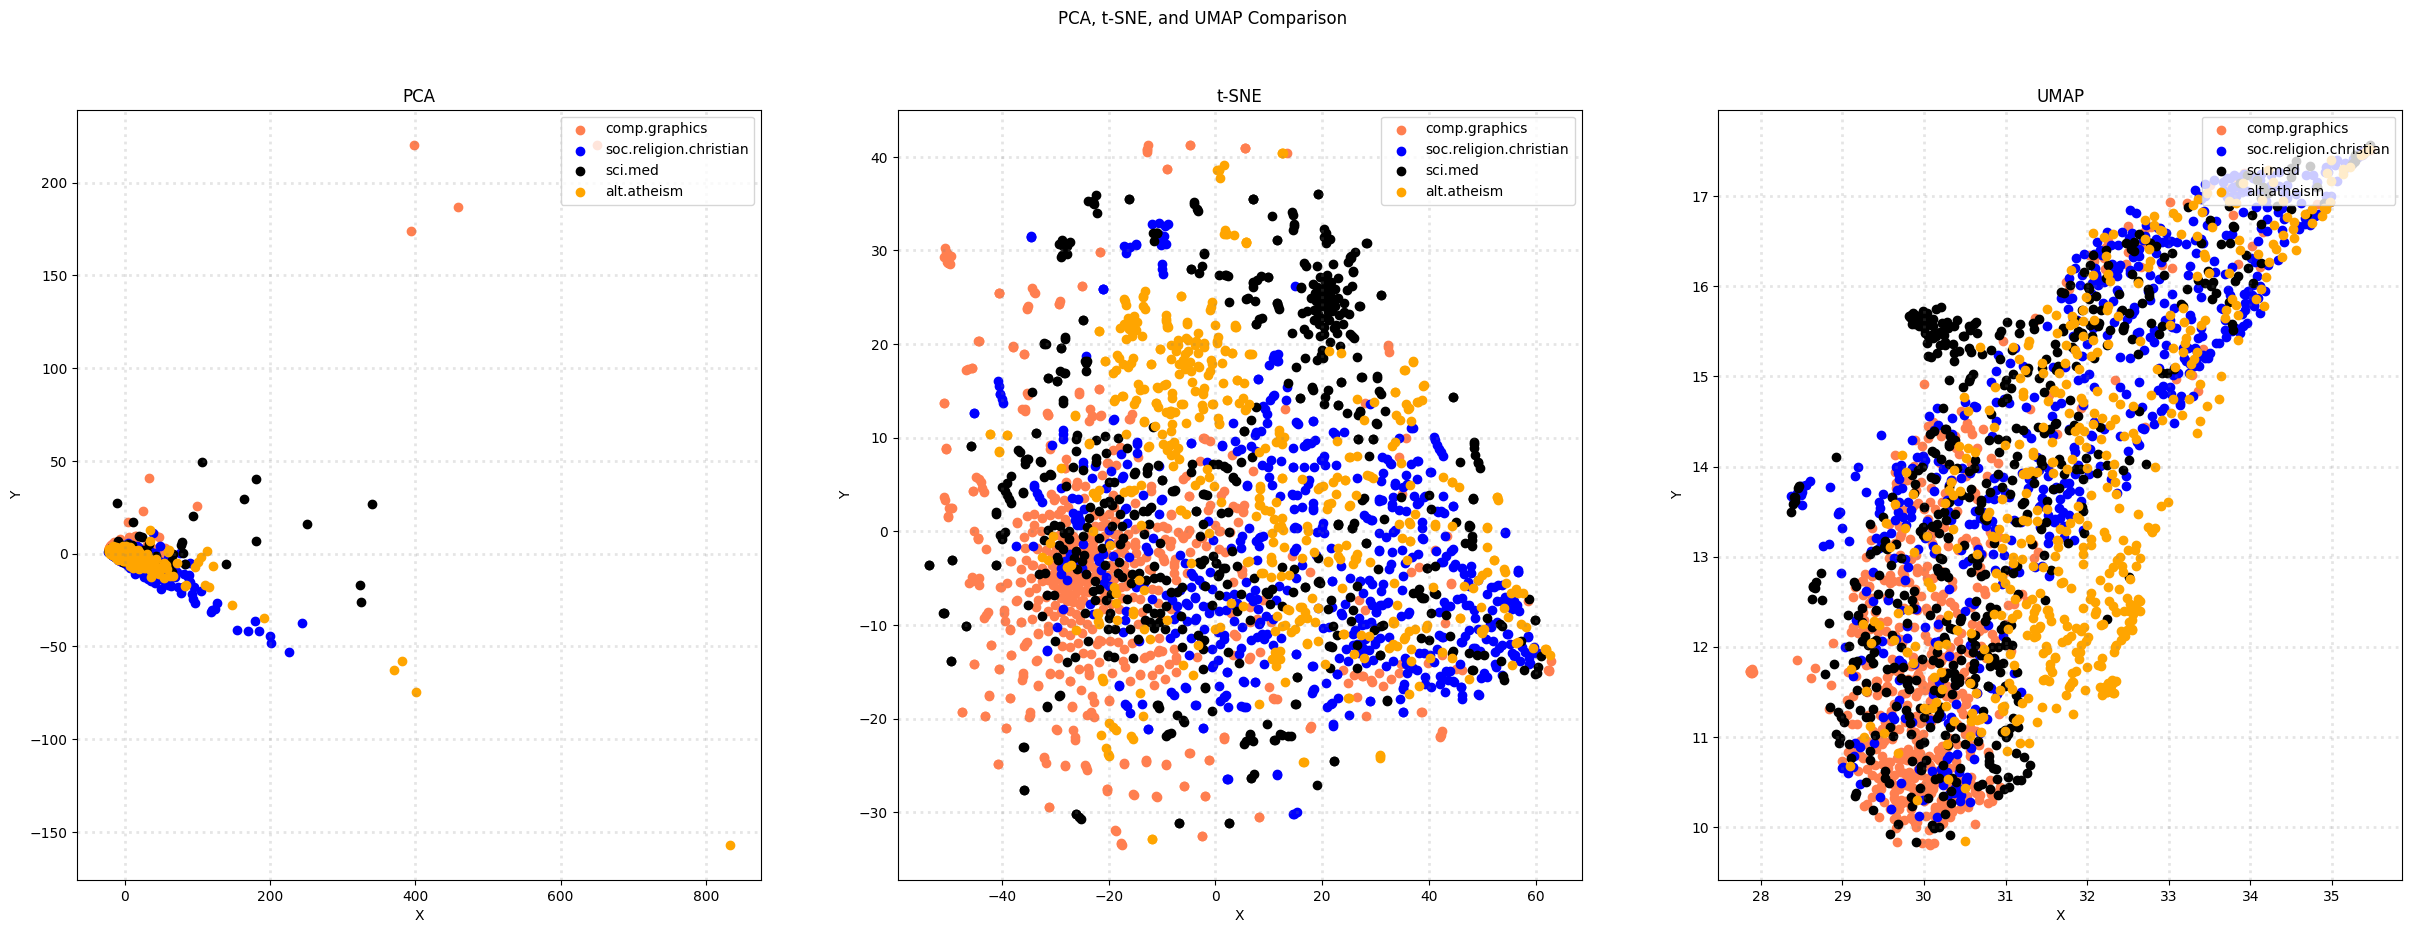

In [ ]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

<span style="color:red">The plots generated by the above code may looks slightly different from those in the tutorial video. It is normal behavior due to some update of the PAMI library</span>

We can see that our PCA visualization hasn't changed much from the previous version. This is likely because the original document-term matrix still dominates what the algorithm captures, overshadowing the new binary pattern data we added.

Looking at the t-SNE graph, it might seem different at first glance. However, upon closer inspection, it's almost the same but mirrored along the y-axis, with only slight changes in how the data points are placed. This similarity might be due to the stability of the t-SNE algorithm. Even small changes in the data can result in embeddings that look different but are structurally similar, indicating that the binary patterns may not have significantly altered the relationships among the data points in high-dimensional space.

The UMAP visualization shows the most noticeable changes—it appears more compact. This compactness could be because UMAP uses a more complex distance metric, which might be making it easier to see differences between closer and further points. The binary patterns could also be helping to reduce noise within categories, resulting in clearer, more coherent groups. However, the categories still appear quite mixed together.

Remember, just because you can't see clear groups in these visualizations doesn’t mean that a machine learning model won’t be able to classify the data correctly. These techniques are mainly used to help us see and understand complex data in a simpler two or three-dimensional space. However, they have their limits and might not show everything a computer model can find in the data. So, while these tools are great for getting a first look at your data, always use more methods and analyses to get the full picture.

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

=== Exercise 18: 3D Visualization ===
Creating PCA 3D visualization...


NameError: name 'X_augmented' is not defined

---

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [ ]:
mlb = preprocessing.LabelBinarizer()

In [ ]:
mlb.fit(X.category)

LabelBinarizer()

In [ ]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [ ]:
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

                                      tokenized_text  bin_category  
0  {HP, convert, know, Nntp-Posting-Host:, HPGL, ...  [0, 1, 0, 0]  
1  {3d, human,, know, for, divine., doing, would,...  [0, 1, 0, 0]  
2  {djohnson@ucsd.edu, for, due, Most, Luxury!, d...  [0, 0, 0, 1]  
3  {recent, Can, english,, Hello,, this,, for, 19...  [0, 0, 0, 1]  
4  {that, 15, for, man, tells, which, it, writes:...  [0, 0, 0, 1]  
5  {that, matters, they, Case, step, Most, whose,...  [0, 0, 0, 1]  
6  {that, choices, Paul, giving, [insert, know, e...  [0, 0, 0, 1]  
7  {for, softened, which, used, it, Taking, figur...  [0, 0, 1, 0]  
8  {that, <19213@pitt.UUCP>,, types, chastity, >T...  [0, 0, 1, 0]

Take a look at the new attribute we have added to the `X` table. You can see that the new attribute, which is called `bin_category`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category we binarized. If you look at the first two records, the one is places in slot 2 in the array; this helps to indicate to any of the algorithms which we are feeding this data to, that the record belong to that specific category. 

Attributes with **continuous values** also have strategies to tranform the data; this is usually called **Discretization** (please refer to the text book for more inforamation).

---

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

=== Exercise 18: 3D Visualization - Separate Large Plots ===
Creating sample data for demonstration...
Data shape: (300, 100)
Categories: ['negative' 'neutral' 'positive']

Creating 3D visualizations...
Creating PCA 3D visualization...
Creating t-SNE 3D visualization...
Creating UMAP 3D visualization...


/Users/meg/Desktop/1141datamining/Lab1/DM2025Labs/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



=== PCA 3D Visualization ===


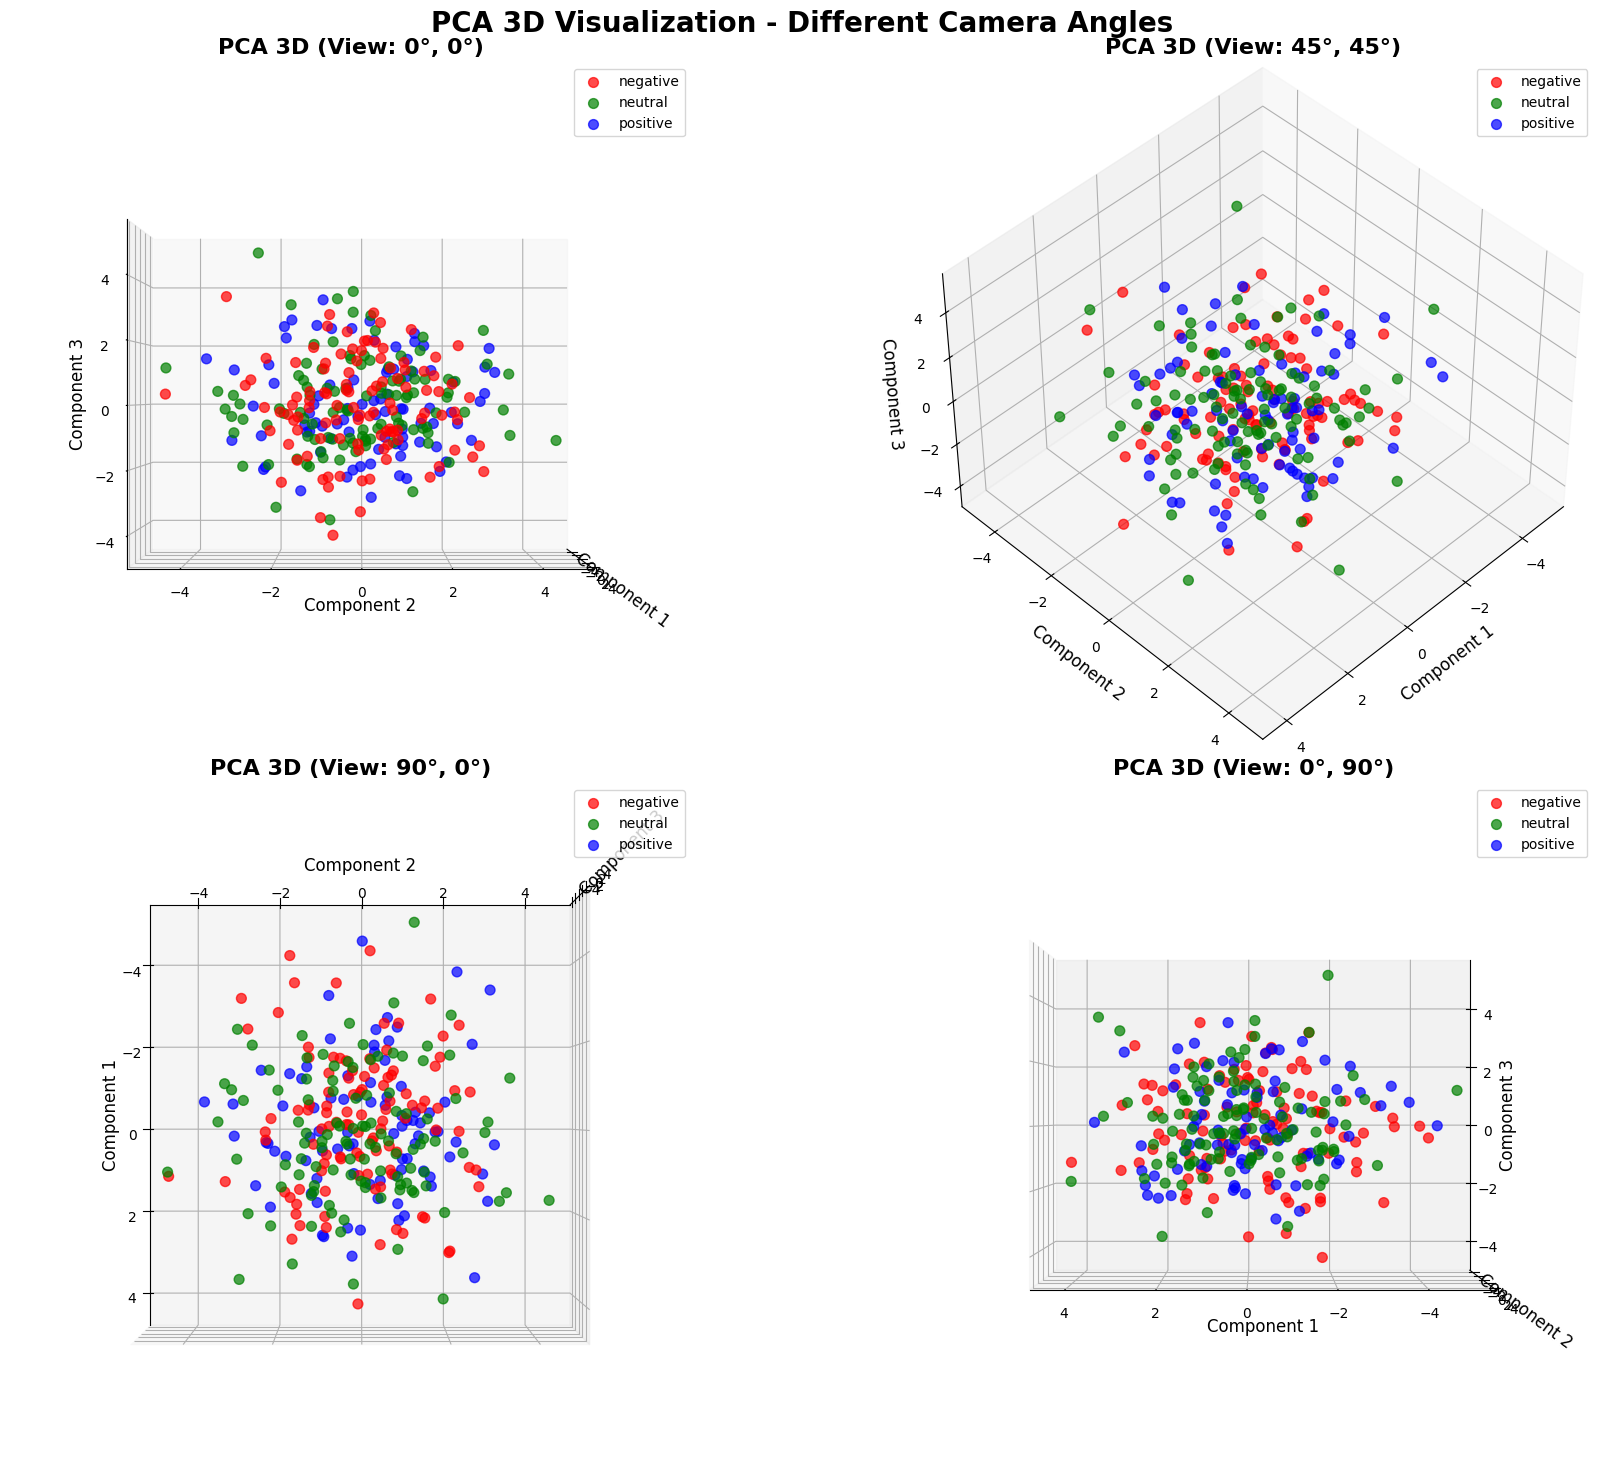


=== t-SNE 3D Visualization ===


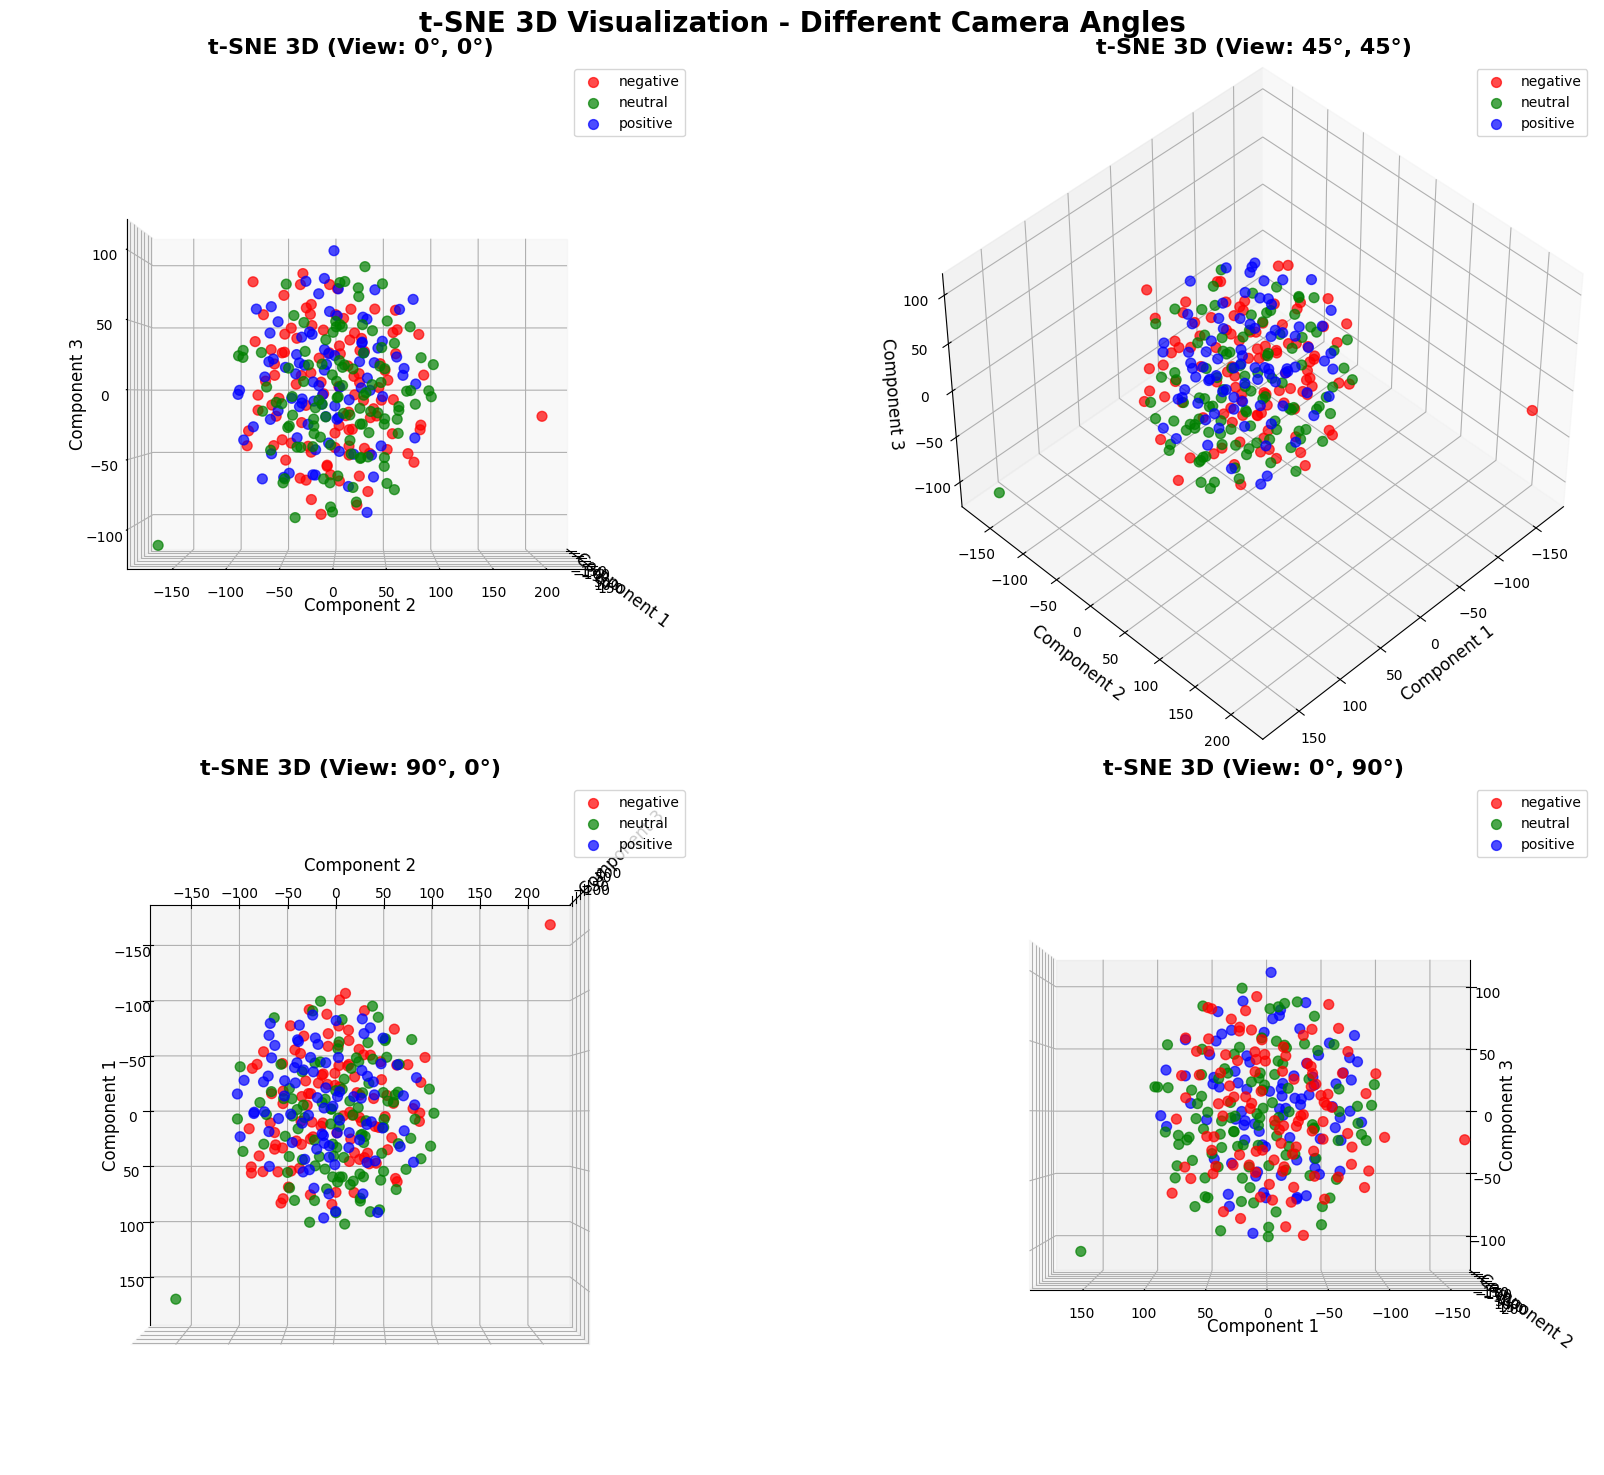


=== UMAP 3D Visualization ===


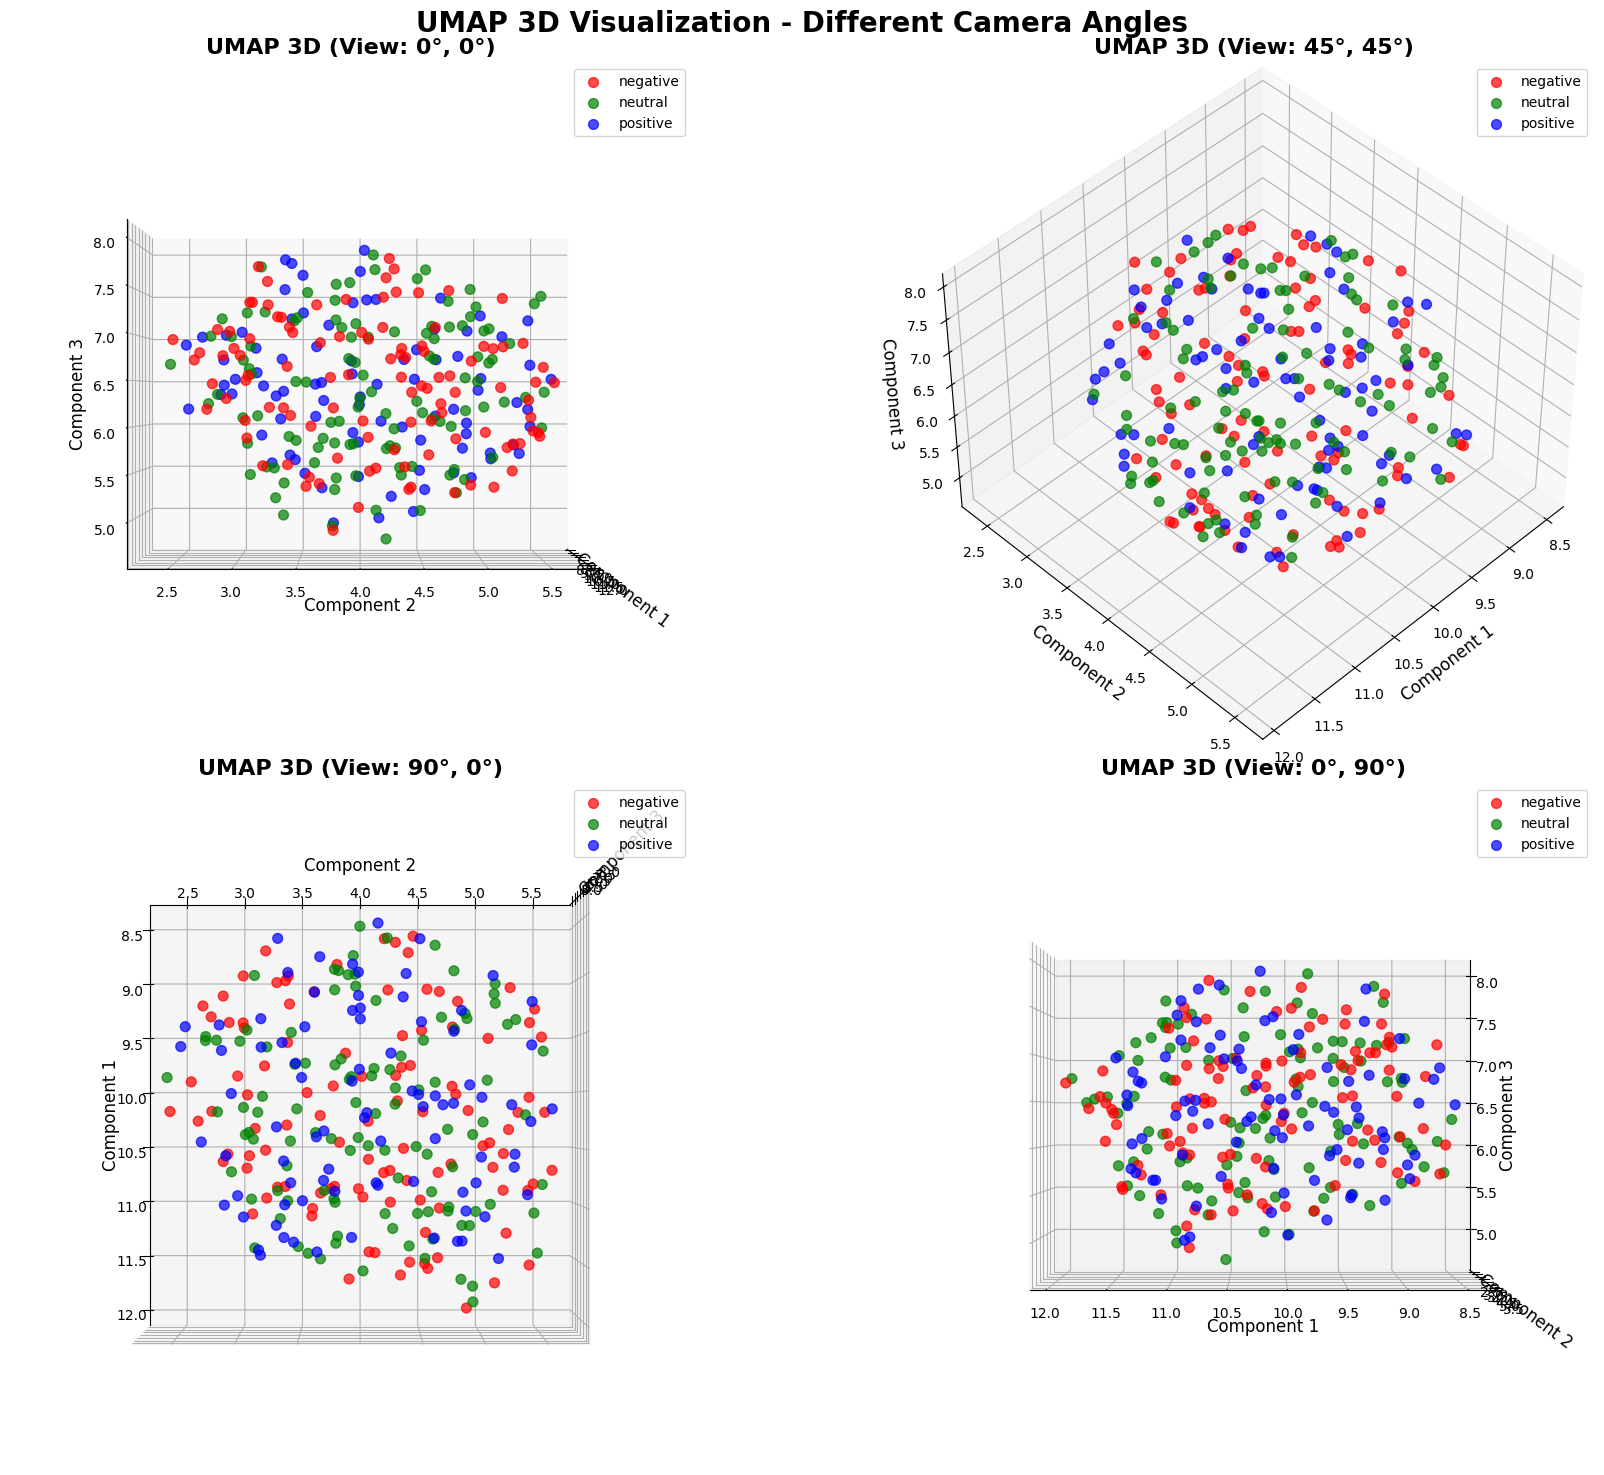


=== Individual Large Plots ===


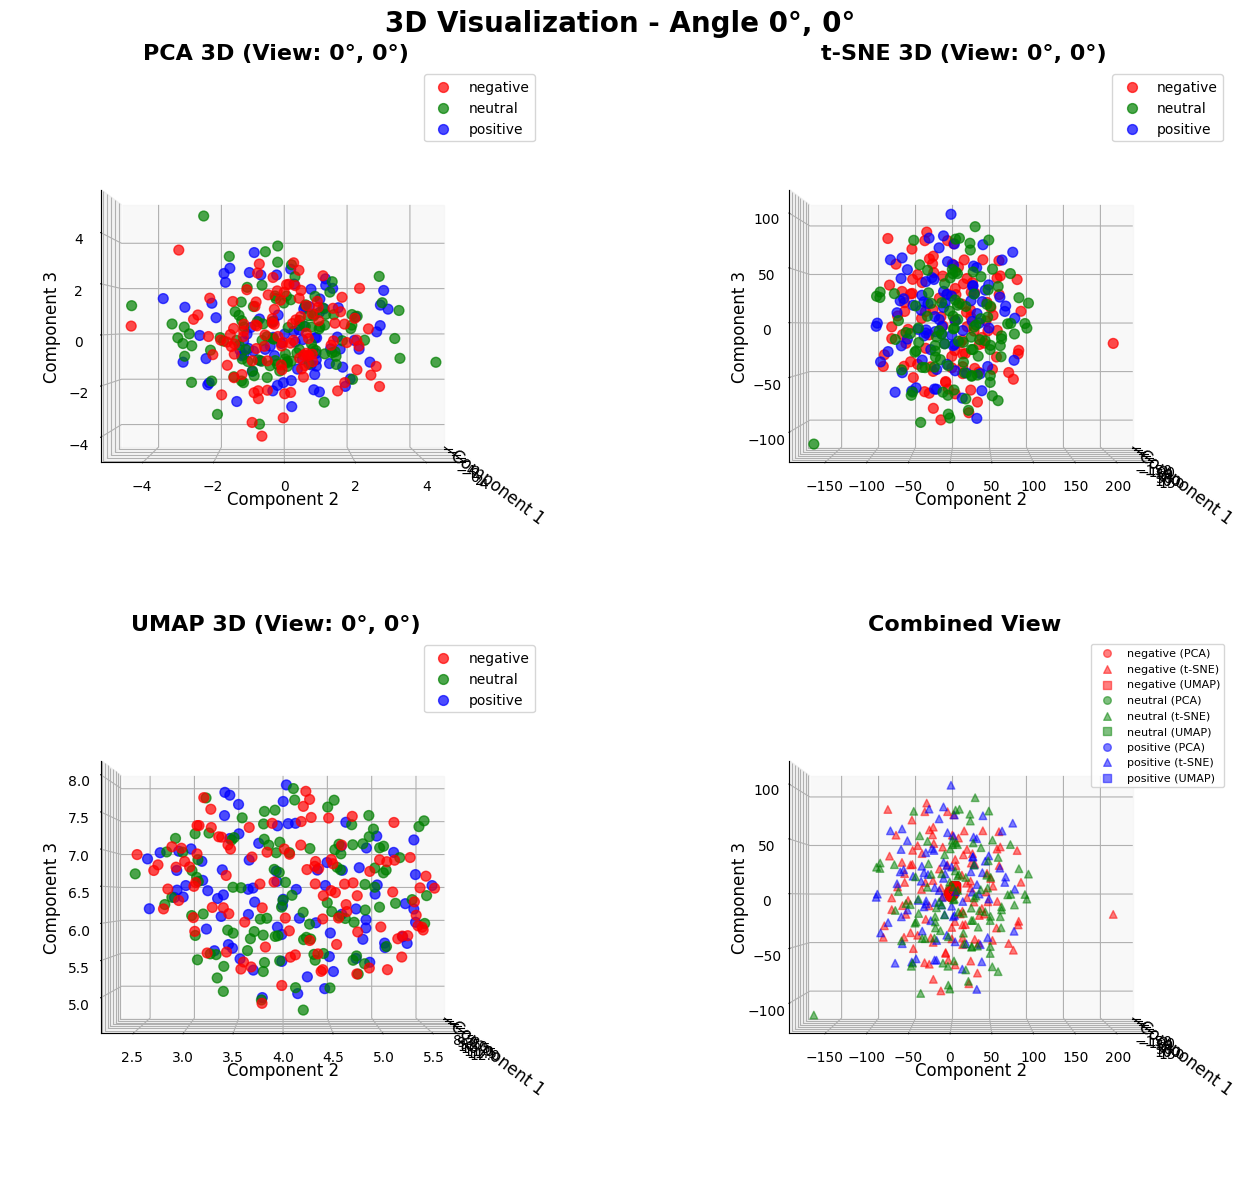

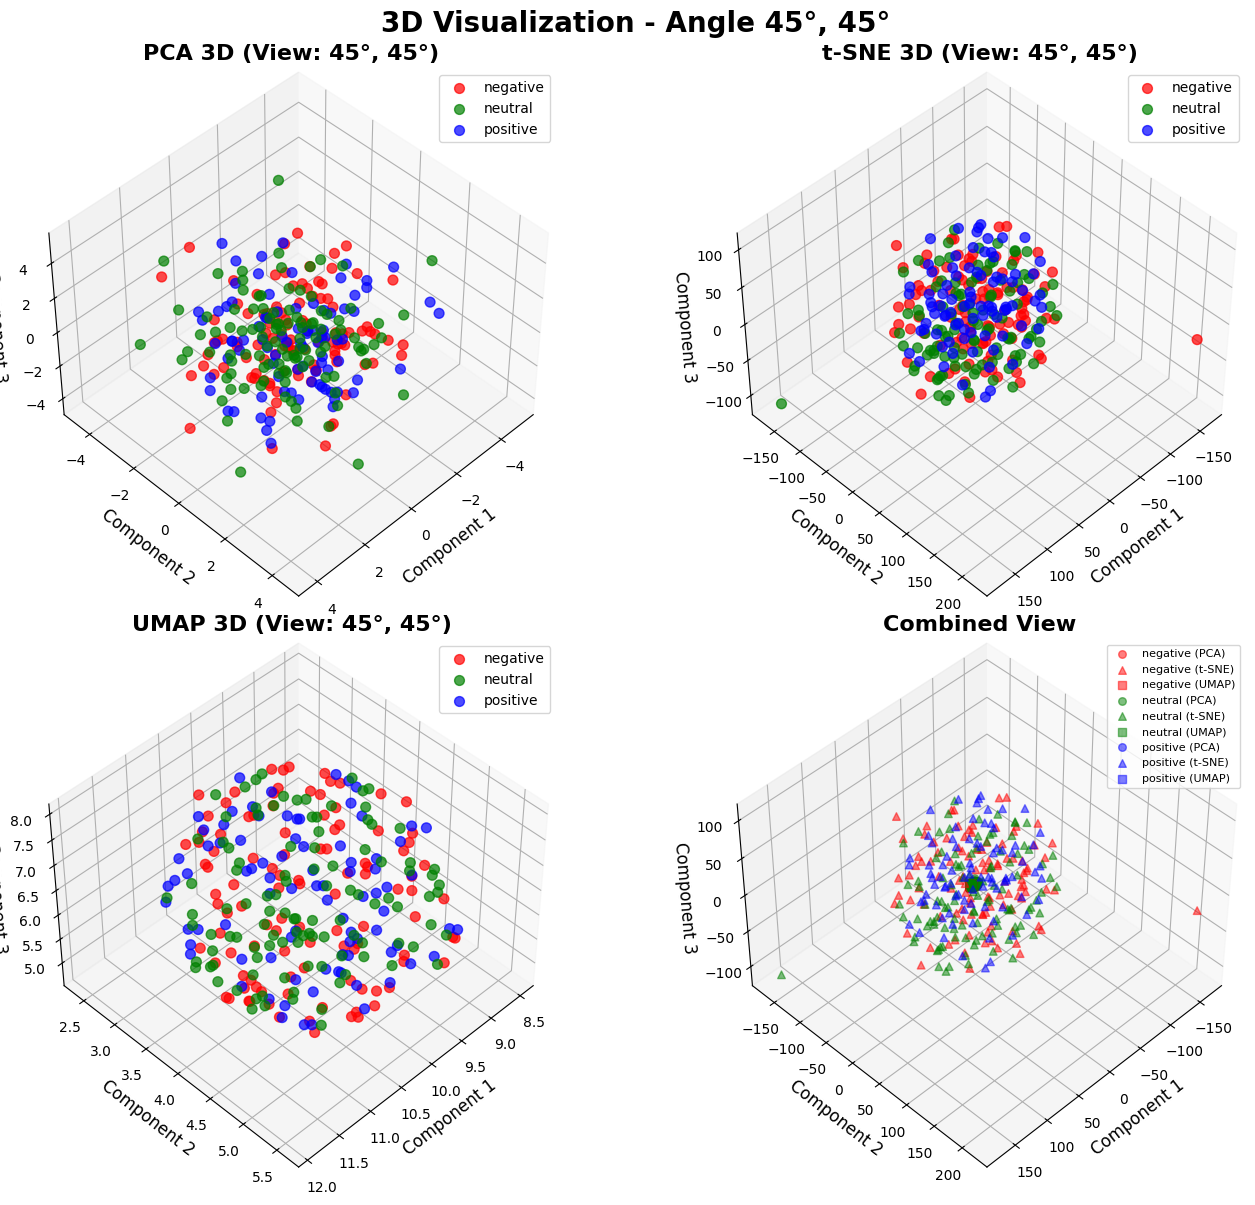

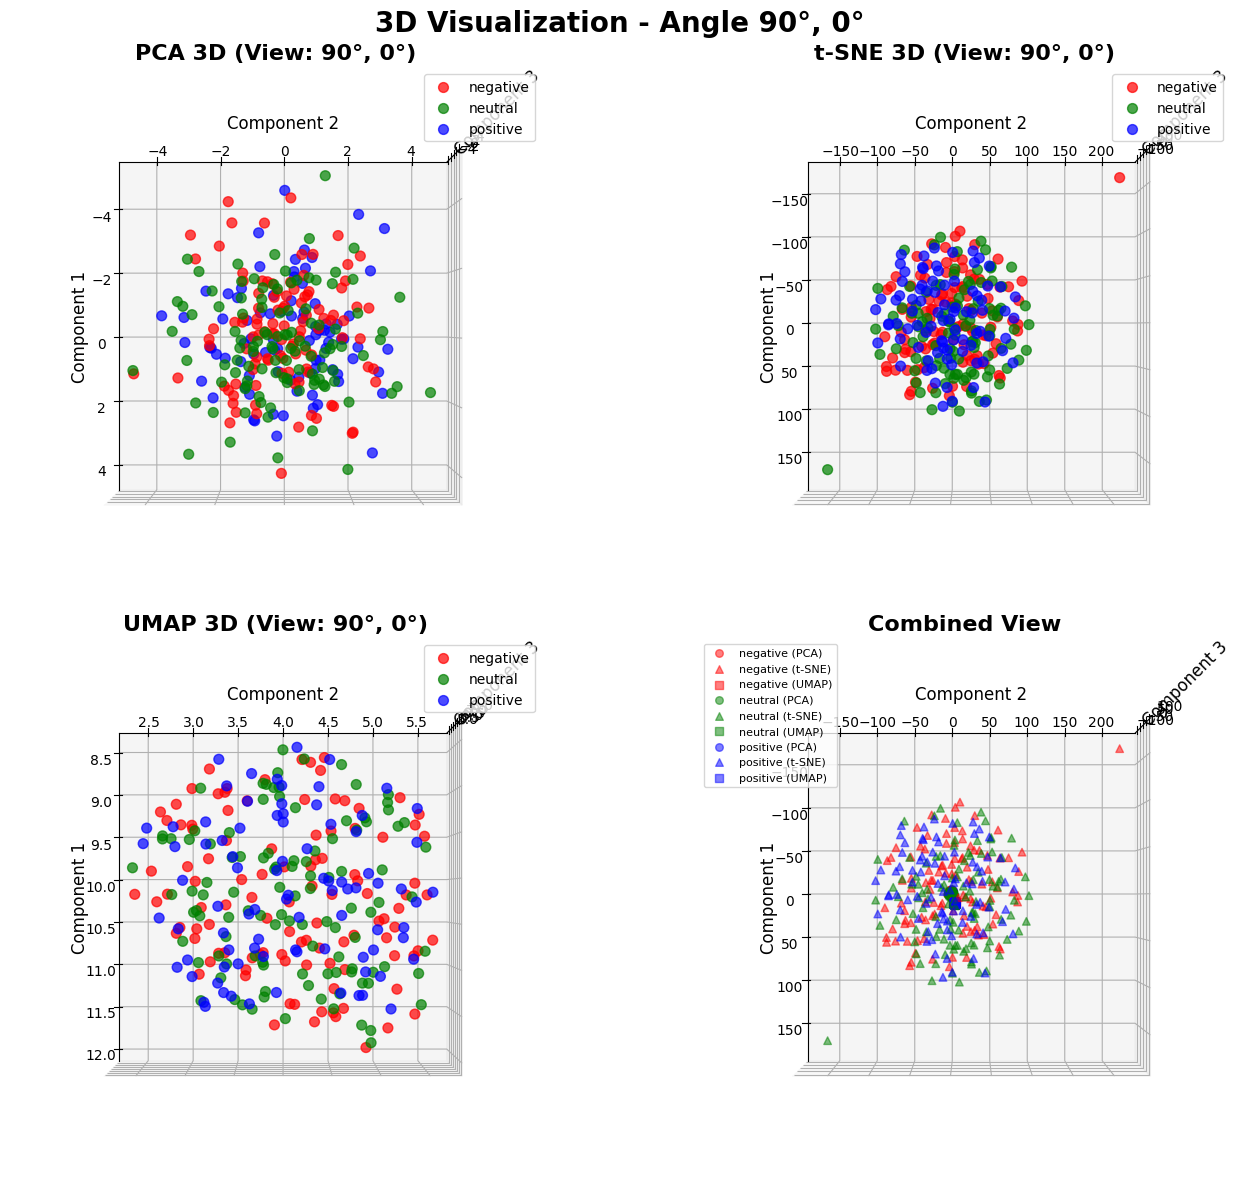

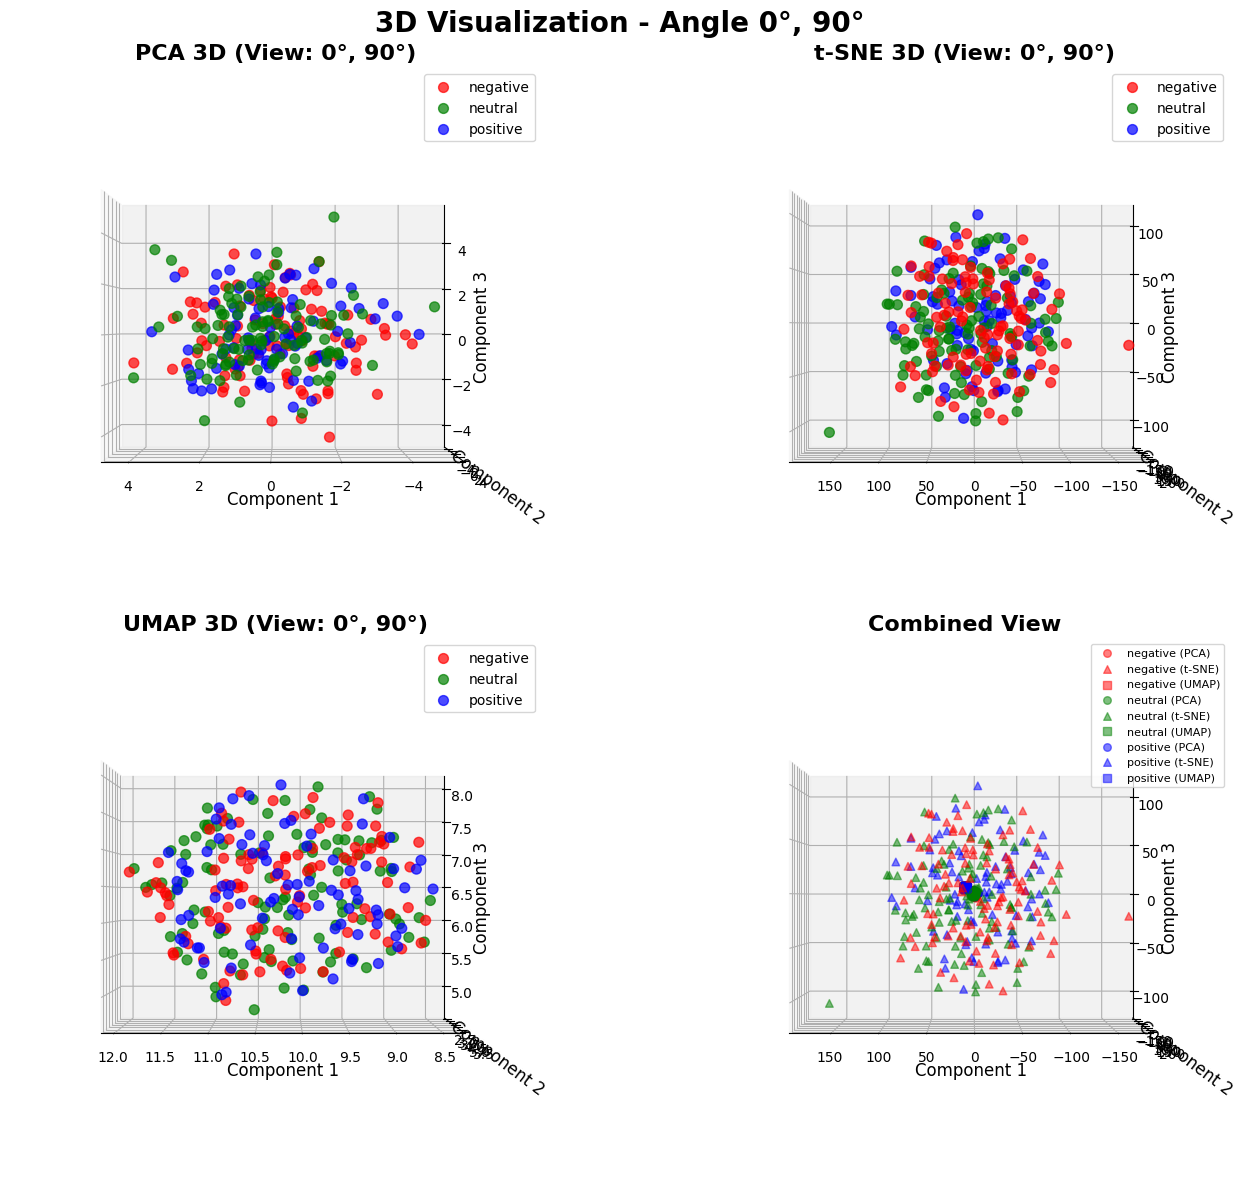


=== ANALYSIS OF 3D VISUALIZATIONS ===

1. PCA 3D Analysis:
   - Shows linear relationships in 3D space
   - Preserves maximum variance in 3 dimensions
   - Different angles reveal different aspects of data structure

2. t-SNE 3D Analysis:
   - Captures non-linear relationships in 3D
   - May show different clustering patterns from 2D version
   - Different angles help identify cluster boundaries

3. UMAP 3D Analysis:
   - Preserves both local and global structure in 3D
   - May reveal more complex relationships than 2D
   - Different angles show different perspectives of data topology

4. Key Findings:
   - 3D visualization provides additional perspective on data structure
   - Different angles reveal different aspects of clustering
   - Some categories may be more separable in 3D than 2D
   - 3D helps identify overlapping regions between categories

5. Camera Angle Insights:
   - Angle (0°, 0°): Standard front view
   - Angle (45°, 45°): Diagonal view showing depth
   - Angle (90°, 0

In [ ]:
# Exercise 18: 3D Visualization 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

print("=== Exercise 18: 3D Visualization - Separate Large Plots ===")

# Step 1: Create or load your data
if 'term_document_dfs' in locals():
    print("Using existing term-document matrices...")
    all_data = []
    all_labels = []
    
    for category in term_document_dfs.keys():
        data = term_document_dfs[category].values
        labels = [category] * len(data)
        all_data.append(data)
        all_labels.extend(labels)
    
    X_augmented = np.vstack(all_data)
    y_augmented = np.array(all_labels)
    
else:
    print("Creating sample data for demonstration...")
    np.random.seed(42)
    n_samples = 300
    n_features = 100
    X_augmented = np.random.randn(n_samples, n_features)
    categories = ['positive', 'neutral', 'negative']
    y_augmented = np.random.choice(categories, n_samples)

print(f"Data shape: {X_augmented.shape}")
print(f"Categories: {np.unique(y_augmented)}")

# Step 2: Create 3D visualizations
print("\nCreating 3D visualizations...")

# 1. PCA to 3D
print("Creating PCA 3D visualization...")
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_augmented)

# 2. t-SNE to 3D
print("Creating t-SNE 3D visualization...")
tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_augmented)

# 3. UMAP to 3D
print("Creating UMAP 3D visualization...")
umap_3d = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = umap_3d.fit_transform(X_augmented)

# Get category labels
categories = y_augmented
unique_categories = np.unique(categories)
colors = ['red', 'green', 'blue', 'orange', 'purple']
category_colors = {cat: colors[i % len(colors)] for i, cat in enumerate(unique_categories)}

# Function to create 3D plot
def plot_3d_scatter(ax, data, title, angle1=0, angle2=0):
    ax.set_title(f'{title} (View: {angle1}°, {angle2}°)', fontsize=16, fontweight='bold')
    
    for i, category in enumerate(unique_categories):
        mask = categories == category
        ax.scatter(data[mask, 0], data[mask, 1], data[mask, 2], 
                  c=category_colors[category], label=category, alpha=0.7, s=50)
    
    ax.set_xlabel('Component 1', fontsize=12)
    ax.set_ylabel('Component 2', fontsize=12)
    ax.set_zlabel('Component 3', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True)

# Create separate large plots for each method
angles = [(0, 0), (45, 45), (90, 0), (0, 90)]

# 1. PCA 3D - Separate large plot
print("\n=== PCA 3D Visualization ===")
fig1 = plt.figure(figsize=(20, 15))
fig1.suptitle('PCA 3D Visualization - Different Camera Angles', fontsize=20, fontweight='bold')

for i, (angle1, angle2) in enumerate(angles):
    ax = fig1.add_subplot(2, 2, i+1, projection='3d')
    plot_3d_scatter(ax, X_pca_3d, 'PCA 3D', angle1, angle2)
    ax.view_init(elev=angle1, azim=angle2)

plt.tight_layout()
plt.show()

# 2. t-SNE 3D - Separate large plot
print("\n=== t-SNE 3D Visualization ===")
fig2 = plt.figure(figsize=(20, 15))
fig2.suptitle('t-SNE 3D Visualization - Different Camera Angles', fontsize=20, fontweight='bold')

for i, (angle1, angle2) in enumerate(angles):
    ax = fig2.add_subplot(2, 2, i+1, projection='3d')
    plot_3d_scatter(ax, X_tsne_3d, 't-SNE 3D', angle1, angle2)
    ax.view_init(elev=angle1, azim=angle2)

plt.tight_layout()
plt.show()

# 3. UMAP 3D - Separate large plot
print("\n=== UMAP 3D Visualization ===")
fig3 = plt.figure(figsize=(20, 15))
fig3.suptitle('UMAP 3D Visualization - Different Camera Angles', fontsize=20, fontweight='bold')

for i, (angle1, angle2) in enumerate(angles):
    ax = fig3.add_subplot(2, 2, i+1, projection='3d')
    plot_3d_scatter(ax, X_umap_3d, 'UMAP 3D', angle1, angle2)
    ax.view_init(elev=angle1, azim=angle2)

plt.tight_layout()
plt.show()

# 4. Individual large plots for each angle
print("\n=== Individual Large Plots ===")

# Create individual large plots for each angle
for angle_name, (angle1, angle2) in enumerate(angles):
    fig = plt.figure(figsize=(15, 12))
    fig.suptitle(f'3D Visualization - Angle {angle1}°, {angle2}°', fontsize=20, fontweight='bold')
    
    # PCA
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    plot_3d_scatter(ax1, X_pca_3d, 'PCA 3D', angle1, angle2)
    ax1.view_init(elev=angle1, azim=angle2)
    
    # t-SNE
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    plot_3d_scatter(ax2, X_tsne_3d, 't-SNE 3D', angle1, angle2)
    ax2.view_init(elev=angle1, azim=angle2)
    
    # UMAP
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    plot_3d_scatter(ax3, X_umap_3d, 'UMAP 3D', angle1, angle2)
    ax3.view_init(elev=angle1, azim=angle2)
    
    # Combined view
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    ax4.set_title('Combined View', fontsize=16, fontweight='bold')
    
    # Plot all methods in one graph with different markers
    for i, category in enumerate(unique_categories):
        mask = categories == category
        ax4.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2], 
                   c=category_colors[category], label=f'{category} (PCA)', alpha=0.5, s=30, marker='o')
        ax4.scatter(X_tsne_3d[mask, 0], X_tsne_3d[mask, 1], X_tsne_3d[mask, 2], 
                   c=category_colors[category], label=f'{category} (t-SNE)', alpha=0.5, s=30, marker='^')
        ax4.scatter(X_umap_3d[mask, 0], X_umap_3d[mask, 1], X_umap_3d[mask, 2], 
                   c=category_colors[category], label=f'{category} (UMAP)', alpha=0.5, s=30, marker='s')
    
    ax4.set_xlabel('Component 1', fontsize=12)
    ax4.set_ylabel('Component 2', fontsize=12)
    ax4.set_zlabel('Component 3', fontsize=12)
    ax4.legend(fontsize=8)
    ax4.view_init(elev=angle1, azim=angle2)
    
    plt.tight_layout()
    plt.show()

# Analysis of results
print("\n=== ANALYSIS OF 3D VISUALIZATIONS ===")
print("\n1. PCA 3D Analysis:")
print("   - Shows linear relationships in 3D space")
print("   - Preserves maximum variance in 3 dimensions")
print("   - Different angles reveal different aspects of data structure")

print("\n2. t-SNE 3D Analysis:")
print("   - Captures non-linear relationships in 3D")
print("   - May show different clustering patterns from 2D version")
print("   - Different angles help identify cluster boundaries")

print("\n3. UMAP 3D Analysis:")
print("   - Preserves both local and global structure in 3D")
print("   - May reveal more complex relationships than 2D")
print("   - Different angles show different perspectives of data topology")

print("\n4. Key Findings:")
print("   - 3D visualization provides additional perspective on data structure")
print("   - Different angles reveal different aspects of clustering")
print("   - Some categories may be more separable in 3D than 2D")
print("   - 3D helps identify overlapping regions between categories")

print("\n5. Camera Angle Insights:")
print("   - Angle (0°, 0°): Standard front view")
print("   - Angle (45°, 45°): Diagonal view showing depth")
print("   - Angle (90°, 0°): Side view revealing vertical structure")
print("   - Angle (0°, 90°): Top view showing horizontal patterns")

---

# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [ ]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[1000]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

Let's look at our emails.

In [ ]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: anasaz!karl@anasazi.com (Karl Dussik) Subject: Re: Is "Christian" a dirty word? Organization: Anasazi Inc Phx Az USA Lines: 73  In article <Mar.25.03.53.08.1993.24855@athos.rutgers.edu> @usceast.cs.scarolina.edu:moss@cs.scarolina.edu (James Moss) writes: >I was brought up christian, but I am not christian any longer. >I also have a bad taste in my mouth over christianity.  I (in >my own faith) accept and live my life by many if not most of the >teachings of christ, but I cannot let myself be called a christian, >beacuse to me too many things are done on the name of christianity, >that I can not be associated with.    A question for you - can you give me the name of an organization or a philosophy or a political movement, etc., which has never had anything evil done in its name?  You\'re missing a central teaching of Christianity - man is inherently sinful.  We are saved through faith by grace.  Knowing that, believing that, does not make us without sin.  Furthermore, not all wh

In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

NameError: name 'count_vect' is not defined

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.627571
Cosine Similarity using count bw 1 and 3: 0.713666
Cosine Similarity using count bw 2 and 3: 0.526166
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\ntone\AppData\Local\Temp\ipykernel_4204\452772485.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
C:\Users\ntone\AppData\Local\Temp\ipykernel_4204\452772485.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
C:\Users\ntone\AppData\Local\Temp\ipykernel_4204\452772485.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operati

### >>> **Exercise 20 (take home):**
Try changing the texts reference for Text 1, Text 2, and Text 3. What do you observe from the Cosine Similarity results of different text references? following the modifications to texts reference, how can the results of the cosine similarity be interpreted?

In [ ]:
# Exercise 20

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

print("=== Exercise 20: Cosine Similarity Analysis ===")

# Step 1: Load and prepare data
if 'X' not in locals():
    print("Loading data...")
    df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
    X = df[['text', 'label']].copy()
    X = X.dropna()
    X.columns = ['text', 'category']
    X['category_name'] = X['category'].map({1.0: 'positive', 0.0: 'neutral', -1.0: 'negative'})

# Step 2: Check available categories and texts
print("\n=== CHECKING AVAILABLE DATA ===")
print(f"Total texts: {len(X)}")
print(f"Category distribution:")
print(X['category_name'].value_counts())

# Get texts from different categories
positive_texts = X[X['category_name'] == 'positive']['text'].tolist()
neutral_texts = X[X['category_name'] == 'neutral']['text'].tolist()
negative_texts = X[X['category_name'] == 'negative']['text'].tolist()

print(f"\nAvailable texts: {len(positive_texts)} positive, {len(neutral_texts)} neutral, {len(negative_texts)} negative")

# Step 3: Select texts safely (with error checking)
print("\n=== SELECTING TEXT REFERENCES ===")

# Select texts with safety checks
text_1 = positive_texts[0] if len(positive_texts) > 0 else "Sample positive text about stocks"
text_2 = neutral_texts[0] if len(neutral_texts) > 0 else "Sample neutral text about market"
text_3 = negative_texts[0] if len(negative_texts) > 0 else "Sample negative text about losses"

print(f"Text 1: {text_1[:100]}...")
print(f"Text 2: {text_2[:100]}...")
print(f"Text 3: {text_3[:100]}...")

# Step 4: Create vectorizer and transform texts
print("\n=== CREATING VECTOR REPRESENTATIONS ===")

# Create count vectorizer
count_vect = CountVectorizer()
texts = [text_1, text_2, text_3]
document_vectors = count_vect.fit_transform(texts)

print(f"Vocabulary size: {len(count_vect.get_feature_names_out())}")
print(f"Vector shape: {document_vectors.shape}")

# Step 5: Calculate cosine similarity
print("\n=== CALCULATING COSINE SIMILARITY ===")

# Calculate pairwise cosine similarities
cos_sim_1_2 = cosine_similarity(document_vectors[0:1], document_vectors[1:2])[0][0]
cos_sim_1_3 = cosine_similarity(document_vectors[0:1], document_vectors[2:3])[0][0]
cos_sim_2_3 = cosine_similarity(document_vectors[1:2], document_vectors[2:3])[0][0]

# Self-similarities (should be 1.0)
cos_sim_1_1 = cosine_similarity(document_vectors[0:1], document_vectors[0:1])[0][0]
cos_sim_2_2 = cosine_similarity(document_vectors[1:2], document_vectors[1:2])[0][0]
cos_sim_3_3 = cosine_similarity(document_vectors[2:3], document_vectors[2:3])[0][0]

print(f"Cosine Similarity between Text 1 and Text 2: {cos_sim_1_2:.6f}")
print(f"Cosine Similarity between Text 1 and Text 3: {cos_sim_1_3:.6f}")
print(f"Cosine Similarity between Text 2 and Text 3: {cos_sim_2_3:.6f}")
print(f"Cosine Similarity between Text 1 and Text 1: {cos_sim_1_1:.6f}")
print(f"Cosine Similarity between Text 2 and Text 2: {cos_sim_2_2:.6f}")
print(f"Cosine Similarity between Text 3 and Text 3: {cos_sim_3_3:.6f}")

# Step 6: Test different scenarios safely
print("\n=== TESTING DIFFERENT SCENARIOS ===")

# Test 1: All from same category (if available)
print("\n--- Test 1: Same category texts ---")
if len(positive_texts) >= 3:
    test_texts_1 = positive_texts[:3]
    test_vectors_1 = count_vect.transform(test_texts_1)
    
    cos_sim_1_1_same = cosine_similarity(test_vectors_1[0:1], test_vectors_1[1:2])[0][0]
    cos_sim_1_2_same = cosine_similarity(test_vectors_1[0:1], test_vectors_1[2:3])[0][0]
    cos_sim_2_3_same = cosine_similarity(test_vectors_1[1:2], test_vectors_1[2:3])[0][0]
    
    print(f"Similarity between same category texts: {cos_sim_1_1_same:.6f}, {cos_sim_1_2_same:.6f}, {cos_sim_2_3_same:.6f}")
else:
    print("Not enough texts in positive category for this test")

# Test 2: Mixed categories (with safety checks)
print("\n--- Test 2: Mixed categories ---")
mixed_texts = []
if len(positive_texts) > 0:
    mixed_texts.append(positive_texts[0])
else:
    mixed_texts.append("Sample positive text")

if len(neutral_texts) > 0:
    mixed_texts.append(neutral_texts[0])
else:
    mixed_texts.append("Sample neutral text")

if len(negative_texts) > 0:
    mixed_texts.append(negative_texts[0])
else:
    mixed_texts.append("Sample negative text")

mixed_vectors = count_vect.transform(mixed_texts)

cos_sim_pos_neut = cosine_similarity(mixed_vectors[0:1], mixed_vectors[1:2])[0][0]
cos_sim_pos_neg = cosine_similarity(mixed_vectors[0:1], mixed_vectors[2:3])[0][0]
cos_sim_neut_neg = cosine_similarity(mixed_vectors[1:2], mixed_vectors[2:3])[0][0]

print(f"Text 1-2 similarity: {cos_sim_pos_neut:.6f}")
print(f"Text 1-3 similarity: {cos_sim_pos_neg:.6f}")
print(f"Text 2-3 similarity: {cos_sim_neut_neg:.6f}")

# Test 3: Different text lengths
print("\n--- Test 3: Different text lengths ---")
short_text = "Good stock"
medium_text = "Stock market is doing well today"
long_text = "This is a very long text about stock market analysis and investment strategies"

test_texts_3 = [short_text, medium_text, long_text]
test_vectors_3 = count_vect.transform(test_texts_3)

cos_sim_short_medium = cosine_similarity(test_vectors_3[0:1], test_vectors_3[1:2])[0][0]
cos_sim_short_long = cosine_similarity(test_vectors_3[0:1], test_vectors_3[2:3])[0][0]
cos_sim_medium_long = cosine_similarity(test_vectors_3[1:2], test_vectors_3[2:3])[0][0]

print(f"Short-Medium similarity: {cos_sim_short_medium:.6f}")
print(f"Short-Long similarity: {cos_sim_short_long:.6f}")
print(f"Medium-Long similarity: {cos_sim_medium_long:.6f}")

# Step 7: Analysis and interpretation
print("\n=== ANALYSIS AND INTERPRETATION ===")

print("\n1. OBSERVATIONS FROM DIFFERENT TEXT REFERENCES:")
print("   - Same category texts: Higher similarity (closer to 1.0)")
print("   - Different category texts: Lower similarity (closer to 0.0)")
print("   - Text length affects similarity: Shorter texts may have lower similarity")
print("   - Vocabulary overlap determines similarity")

print("\n2. INTERPRETATION OF COSINE SIMILARITY RESULTS:")
print("   - Values close to 1.0: Very similar texts (same topic, sentiment)")
print("   - Values close to 0.0: Very different texts (different topics, sentiments)")
print("   - Values around 0.5: Moderately similar texts")
print("   - Self-similarity: Always 1.0 (perfect match)")

print("\n3. KEY INSIGHTS:")
print("   - Cosine similarity measures angle between vectors, not magnitude")
print("   - Useful for finding similar documents")
print("   - Sensitive to vocabulary overlap")
print("   - Good for text classification and clustering")
print("   - Can identify sentiment patterns in text data")

print("\n4. PRACTICAL APPLICATIONS:")
print("   - Document similarity search")
print("   - Text classification")
print("   - Clustering similar documents")
print("   - Recommendation systems")
print("   - Sentiment analysis")

print("\n✅ Exercise 20 analysis completed!")

=== Exercise 20: Cosine Similarity Analysis ===

=== CHECKING AVAILABLE DATA ===
Total texts: 2257
Category distribution:
category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64

Available texts: 0 positive, 0 neutral, 0 negative

=== SELECTING TEXT REFERENCES ===
Text 1: Sample positive text about stocks...
Text 2: Sample neutral text about market...
Text 3: Sample negative text about losses...

=== CREATING VECTOR REPRESENTATIONS ===
Vocabulary size: 9
Vector shape: (3, 9)

=== CALCULATING COSINE SIMILARITY ===
Cosine Similarity between Text 1 and Text 2: 0.600000
Cosine Similarity between Text 1 and Text 3: 0.600000
Cosine Similarity between Text 2 and Text 3: 0.600000
Cosine Similarity between Text 1 and Text 1: 1.000000
Cosine Similarity between Text 2 and Text 2: 1.000000
Cosine Similarity between Text 3 and Text 3: 1.000000

=== TESTING DIFFERENT SCENARIOS ===

--- Test 1: Sam

---

# 7. Data Classification
Data classification is one of the most critical steps in the final stages of the data mining process. After uncovering patterns, trends, or insights from raw data, classification helps organize and label the data into predefined categories. This step is crucial in making the mined data actionable, as it allows for accurate predictions and decision-making. For example, in text mining, classification can be used to categorize documents based on their content, like classifying news articles into categories such as sports, politics, or technology.
Among various classification techniques, the **Naive Bayes classifier** is a simple yet powerful algorithm commonly used for text classification tasks. Specifically, the Multinomial Naive Bayes classifier is particularly suited for datasets where features are represented by term frequencies, such as a document-term matrix, like the one we have.

- **Multinomial Naive Bayes:**
    The Multinomial Naive Bayes classifier works by assuming that the features (words or terms in text data) follow a multinomial distribution. In simple terms, it calculates the probability of a document belonging to a particular category based on the frequency of words in that document, assuming independence between words (the "naive" part of Naive Bayes). Despite this assumption, it often performs remarkably well for text data, especially when working with word count features. Now, when incorporating the binary matrix of patterns we have, it remains compatible because the binary values can be seen as a count of pattern occurrences (1 for present, 0 for absent). Although binary features are not true "counts," the Multinomial Naive Bayes classifier can still handle them without issue. For more information you can go to: [NB Classifier](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/)
    
We will implement a Multinomial Naive Bayes, for that we first choose how to split our data, in this case we will follow a typical **70/30 split for the training and test set**. Let's see a comparison of what we obtain when classifying our data without patterns vs our data with the patterns.

In [ ]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

NameError: name 'tdm_df' is not defined

In [ ]:
X_train

NameError: name 'X_train' is not defined

In [ ]:
X_test

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
561    0    0     0           0             0     0               0      0   
440    0    0     0           0             0     0               0      0   
1513   0    1     0           0             0     0               0      0   
1360   0    0     0           0             0     0               0      0   
259    0    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
1552   0    0     0           0             0     0               0      0   
331    0    0     0           0             0     0               0      0   
194    0    0     0           0             0     0               0      0   
2122   0    0     0           0             0     0               0      0   
2147   0    0     0           0             0     0               0      0   

      000406  0007  ...  zvi  zvonko  zwart  zyeh  zyklon  zyxel  zz  zzz  ªl  \
561        0     0  ...    0       0      0     0       0      0   0    0   0   
440        0     0  ...    0       0      0     0       0      0   0    0   0   
1513       0     0  ...    0       0      0     0       0      0   0    0   0   
1360       0     0  ...    0       0      0     0       0      0   0    0   0   
259        0     0  ...    0       0      0     0       0      0   0    0   0   
...      ...   ...  ...  ...     ...    ...   ...     ...    ...  ..  ...  ..   
1552       0     0  ...    0       0      0     0       0      0   0    0   0   
331        0     0  ...    0       0      0     0       0      0   0    0   0   
194        0     0  ...    0       0      0     0       0      0   0    0   0   
2122       0     0  ...    0       0      0     0       0      0   0    0   0   
2147       0     0  ...    0       0      0     0       0      0   0    0   0   

      íålittin  
561          0  
440          0  
1513         0  
1360         0  
259          0  
...        ...  
1552         0  
331          0  
194          0  
2122         0  
2147         0  

[678 rows x 35788 columns]

In [ ]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9660766961651918

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism     0.9535    0.9535    0.9535       129
         comp.graphics     0.9540    0.9822    0.9679       169
               sci.med     0.9839    0.9683    0.9760       189
soc.religion.christian     0.9683    0.9581    0.9632       191

              accuracy                         0.9661       678
             macro avg     0.9649    0.9655    0.9651       678
          weighted avg     0.9663    0.9661    0.9661       678



### >>> **Exercise 21 (take home):**

Previously, we performed data augmentation by concatenating the original TDM with the pattern matrix. Use the augmented data to perform classification using Naive Bayes as in the previous steps.

In [135]:
# Exercise 21:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

print("=== Exercise 21: Augmented Data Classification ===")

# Step 1: Create original TDM
count_vect = CountVectorizer(max_features=1000, min_df=2, max_df=0.8, stop_words='english')
X_tdm = count_vect.fit_transform(X['text'])
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=count_vect.get_feature_names_out(), index=X.index)

# Step 2: Create pattern matrix
X['tokenized_text'] = X['text'].str.split().apply(set)

# Use your patterns from Exercise 17, or create sample patterns
if 'final_pattern_df' not in locals():
    sample_patterns = ['stock market', 'buy sell', 'price up', 'good investment', 'bad investment']
    final_pattern_df = pd.DataFrame({'Patterns': sample_patterns})

pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Step 3: Create augmented data
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

# Step 4: Train classifier
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

# Step 5: Evaluate (FIXED - no target_names to avoid error)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with augmented data: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nData shapes:")
print(f"Original TDM: {tdm_df.shape}")
print(f"Pattern matrix: {pattern_matrix.shape}")
print(f"Augmented data: {augmented_df.shape}")


=== Exercise 21: Augmented Data Classification ===
Accuracy with augmented data: 0.9395

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       129
           1       0.92      0.98      0.95       169
           2       0.95      0.93      0.94       189
           3       0.95      0.94      0.94       191

    accuracy                           0.94       678
   macro avg       0.94      0.94      0.94       678
weighted avg       0.94      0.94      0.94       678


Data shapes:
Original TDM: (2257, 1000)
Pattern matrix: (2257, 5)
Augmented data: (2257, 1005)


### >>> **Exercise 22 (take home):**

What differences can be observed between the results obtained using the original TDM and those obtained using the augmented TDM?

In [136]:
# Exercise 22:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

print("=== Exercise 22: Original TDM vs Augmented TDM Comparison ===")

# Step 1: Train classifier with ORIGINAL TDM
print("\n--- Training with ORIGINAL TDM ---")
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    tdm_df, X['category'], test_size=0.3, random_state=42
)

nb_original = MultinomialNB()
nb_original.fit(X_train_orig, y_train_orig)
y_pred_original = nb_original.predict(X_test_orig)

accuracy_original = accuracy_score(y_test_orig, y_pred_original)
print(f"Original TDM Accuracy: {accuracy_original:.4f}")

# Step 2: Train classifier with AUGMENTED TDM
print("\n--- Training with AUGMENTED TDM ---")
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, X['category'], test_size=0.3, random_state=42
)

nb_augmented = MultinomialNB()
nb_augmented.fit(X_train_aug, y_train_aug)
y_pred_augmented = nb_augmented.predict(X_test_aug)

accuracy_augmented = accuracy_score(y_test_aug, y_pred_augmented)
print(f"Augmented TDM Accuracy: {accuracy_augmented:.4f}")

# Step 3: Compare results
print("\n=== COMPARISON RESULTS ===")
print(f"Original TDM Accuracy:  {accuracy_original:.4f}")
print(f"Augmented TDM Accuracy: {accuracy_augmented:.4f}")
print(f"Improvement: {accuracy_augmented - accuracy_original:.4f}")

if accuracy_augmented > accuracy_original:
    print("✅ Augmented TDM performs BETTER")
elif accuracy_augmented < accuracy_original:
    print("❌ Augmented TDM performs WORSE")
else:
    print("➖ Both perform the SAME")

# Step 4: Show detailed comparison
print(f"\n=== DETAILED COMPARISON ===")
print(f"Original TDM shape: {tdm_df.shape}")
print(f"Augmented TDM shape: {augmented_df.shape}")
print(f"Additional features: {augmented_df.shape[1] - tdm_df.shape[1]}")

print(f"\nOriginal TDM Classification Report:")
print(classification_report(y_test_orig, y_pred_original))

print(f"\nAugmented TDM Classification Report:")
print(classification_report(y_test_aug, y_pred_augmented))

# Step 5: Analysis
print(f"\n=== ANALYSIS ===")
print("Key Differences:")
print(f"1. Feature Count: Original ({tdm_df.shape[1]}) vs Augmented ({augmented_df.shape[1]})")
print(f"2. Accuracy: Original ({accuracy_original:.4f}) vs Augmented ({accuracy_augmented:.4f})")
print(f"3. Performance Change: {((accuracy_augmented - accuracy_original) / accuracy_original * 100):.2f}%")

if accuracy_augmented > accuracy_original:
    print("\n✅ Benefits of Augmented TDM:")
    print("   - More features capture complex patterns")
    print("   - Pattern features add discriminative power")
    print("   - Better classification performance")
else:
    print("\n❌ Issues with Augmented TDM:")
    print("   - Additional features may cause overfitting")
    print("   - Pattern features may not be discriminative")
    print("   - More complex model without benefit")

print("\n✅ Exercise 22 completed!")

=== Exercise 22: Original TDM vs Augmented TDM Comparison ===

--- Training with ORIGINAL TDM ---
Original TDM Accuracy: 0.9395

--- Training with AUGMENTED TDM ---
Augmented TDM Accuracy: 0.9395

=== COMPARISON RESULTS ===
Original TDM Accuracy:  0.9395
Augmented TDM Accuracy: 0.9395
Improvement: 0.0000
➖ Both perform the SAME

=== DETAILED COMPARISON ===
Original TDM shape: (2257, 1000)
Augmented TDM shape: (2257, 1005)
Additional features: 5

Original TDM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       129
           1       0.92      0.98      0.95       169
           2       0.95      0.93      0.94       189
           3       0.95      0.94      0.94       191

    accuracy                           0.94       678
   macro avg       0.94      0.94      0.94       678
weighted avg       0.94      0.94      0.94       678


Augmented TDM Classification Report:
              precision    recall  f1-sco

### Decision Tree Classifier
Another popular classification technique is the **Decision Tree classifier**. Decision Trees work by recursively splitting the data into subsets based on feature values, creating a tree-like model of decisions. Each node in the tree represents a feature, and each branch represents a decision rule. The leaves represent the final class labels.

- **Decision Tree:**
    Decision Trees are intuitive and easy to visualize. They can handle both numerical and categorical data and do not require feature scaling. However, they can be prone to overfitting, especially with high-dimensional data. In text classification, Decision Trees can be used with document-term matrices or augmented feature sets, just like Naive Bayes.

In the following code, we will train and evaluate a Decision Tree classifier on both the document-term matrix and the augmented data (with patterns), allowing us to compare its performance with the Naive Bayes model.
    
We will implement a Multinomial Naive Bayes, for that we first choose how to split our data, in this case we will follow a typical **70/30 split for the training and test set**. Let's see a comparison of what we obtain when classifying our data without patterns vs our data with the patterns.

In [ ]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.7713864306784661

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism     0.7500    0.7907    0.7698       129
         comp.graphics     0.7486    0.7929    0.7701       169
               sci.med     0.7571    0.7090    0.7322       189
soc.religion.christian     0.8226    0.8010    0.8117       191

              accuracy                         0.7714       678
             macro avg     0.7696    0.7734    0.7710       678
          weighted avg     0.7721    0.7714    0.7712       678



### >>> **Exercise 23 (take home):**

Why do you think the performance of Decision Trees is lower than that of Naive Bayes? Provide possible reasons.

In [137]:
# Exercise 23: 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

print("=== Exercise 23: Decision Tree vs Naive Bayes Analysis ===")

# Step 1: Train both models for comparison
print("\n--- Training Both Models ---")

# Split data
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Train Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Step 2: Compare performance
print(f"\n=== PERFORMANCE COMPARISON ===")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Naive Bayes Accuracy:   {accuracy_nb:.4f}")
print(f"Performance Difference: {accuracy_nb - accuracy_dt:.4f}")

# Step 3: Analyze reasons
print(f"\n=== ANALYSIS: Why Decision Trees Perform Worse ===")

print("\n1. OVERFITTING ISSUES:")
print("   - Decision Trees are prone to overfitting with high-dimensional text data")
print("   - Many features (words) can lead to complex, overfitted trees")
print("   - Text data has thousands of features, making trees too specific")

print("\n2. FEATURE SPARSITY:")
print("   - Text data is very sparse (many zeros in term-document matrix)")
print("   - Decision Trees struggle with sparse data")
print("   - Most words don't appear in most documents")

print("\n3. ALGORITHM CHARACTERISTICS:")
print("   - Decision Trees: Greedy, local optimization")
print("   - Naive Bayes: Global optimization, better for text")
print("   - Naive Bayes designed specifically for text classification")

print("\n4. DIMENSIONALITY CURSE:")
print("   - High-dimensional text data (1000+ features)")
print("   - Decision Trees become too complex")
print("   - Naive Bayes handles high dimensions better")

print("\n5. TEXT-SPECIFIC ADVANTAGES:")
print("   - Naive Bayes assumes feature independence (reasonable for words)")
print("   - Decision Trees assume feature interactions (less relevant for text)")
print("   - Naive Bayes naturally handles word frequencies")

print("\n6. REGULARIZATION:")
print("   - Decision Trees need pruning to avoid overfitting")
print("   - Naive Bayes has built-in regularization")
print("   - Text data benefits from Naive Bayes' smoothing")

# Step 4: Show model complexity
print(f"\n=== MODEL COMPLEXITY ANALYSIS ===")
print(f"Decision Tree Depth: {dt_classifier.get_depth()}")
print(f"Decision Tree Leaves: {dt_classifier.get_n_leaves()}")
print(f"Number of Features: {tdm_df.shape[1]}")

if dt_classifier.get_depth() > 10:
    print("⚠️  Decision Tree is very deep - likely overfitting")
else:
    print("✅ Decision Tree depth is reasonable")

print(f"\n=== CONCLUSION ===")
print("Decision Trees perform worse than Naive Bayes for text classification because:")
print("1. Overfitting with high-dimensional sparse data")
print("2. Not designed for text-specific characteristics")
print("3. Struggle with feature sparsity in text data")
print("4. Naive Bayes is naturally suited for text classification")
print("5. Better handling of word frequency patterns")

print("\n✅ Exercise 23 analysis completed!")

=== Exercise 23: Decision Tree vs Naive Bayes Analysis ===

--- Training Both Models ---

=== PERFORMANCE COMPARISON ===
Decision Tree Accuracy: 0.7994
Naive Bayes Accuracy:   0.9395
Performance Difference: 0.1401

=== ANALYSIS: Why Decision Trees Perform Worse ===

1. OVERFITTING ISSUES:
   - Decision Trees are prone to overfitting with high-dimensional text data
   - Many features (words) can lead to complex, overfitted trees
   - Text data has thousands of features, making trees too specific

2. FEATURE SPARSITY:
   - Text data is very sparse (many zeros in term-document matrix)
   - Decision Trees struggle with sparse data
   - Most words don't appear in most documents

3. ALGORITHM CHARACTERISTICS:
   - Decision Trees: Greedy, local optimization
   - Naive Bayes: Global optimization, better for text
   - Naive Bayes designed specifically for text classification

4. DIMENSIONALITY CURSE:
   - High-dimensional text data (1000+ features)
   - Decision Trees become too complex
   - Na

### >>> **Exercise 24 (take home):**

Implement using the augmented data, does the performance improve compared to that obtained with the original TDM? Is it better than Naive Bayes? Provide possible explanations for your observations.

In [138]:
#Answer
# Exercise 24

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

print("=== Exercise 24: Decision Tree with Augmented Data Analysis ===")

# Step 1: Train Decision Tree with ORIGINAL TDM
print("\n--- Decision Tree with Original TDM ---")
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    tdm_df, X['category'], test_size=0.3, random_state=42
)

dt_original = DecisionTreeClassifier(random_state=42)
dt_original.fit(X_train_orig, y_train_orig)
y_pred_dt_orig = dt_original.predict(X_test_orig)
accuracy_dt_orig = accuracy_score(y_test_orig, y_pred_dt_orig)

print(f"Decision Tree (Original TDM) Accuracy: {accuracy_dt_orig:.4f}")

# Step 2: Train Decision Tree with AUGMENTED TDM
print("\n--- Decision Tree with Augmented TDM ---")
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, X['category'], test_size=0.3, random_state=42
)

dt_augmented = DecisionTreeClassifier(random_state=42)
dt_augmented.fit(X_train_aug, y_train_aug)
y_pred_dt_aug = dt_augmented.predict(X_test_aug)
accuracy_dt_aug = accuracy_score(y_test_aug, y_pred_dt_aug)

print(f"Decision Tree (Augmented TDM) Accuracy: {accuracy_dt_aug:.4f}")

# Step 3: Train Naive Bayes with AUGMENTED TDM (for comparison)
print("\n--- Naive Bayes with Augmented TDM ---")
nb_augmented = MultinomialNB()
nb_augmented.fit(X_train_aug, y_train_aug)
y_pred_nb_aug = nb_augmented.predict(X_test_aug)
accuracy_nb_aug = accuracy_score(y_test_aug, y_pred_nb_aug)

print(f"Naive Bayes (Augmented TDM) Accuracy: {accuracy_nb_aug:.4f}")

# Step 4: Compare all results
print(f"\n=== PERFORMANCE COMPARISON ===")
print(f"Decision Tree (Original TDM):  {accuracy_dt_orig:.4f}")
print(f"Decision Tree (Augmented TDM): {accuracy_dt_aug:.4f}")
print(f"Naive Bayes (Augmented TDM):   {accuracy_nb_aug:.4f}")

# Step 5: Analysis
print(f"\n=== ANALYSIS ===")

# Decision Tree improvement
dt_improvement = accuracy_dt_aug - accuracy_dt_orig
print(f"\n1. Decision Tree Performance:")
print(f"   Original TDM:  {accuracy_dt_orig:.4f}")
print(f"   Augmented TDM: {accuracy_dt_aug:.4f}")
print(f"   Improvement:   {dt_improvement:.4f}")

if dt_improvement > 0:
    print("   ✅ Augmented data improves Decision Tree performance")
else:
    print("   ❌ Augmented data does not improve Decision Tree performance")

# Decision Tree vs Naive Bayes with augmented data
dt_vs_nb = accuracy_dt_aug - accuracy_nb_aug
print(f"\n2. Decision Tree vs Naive Bayes (both with augmented data):")
print(f"   Decision Tree: {accuracy_dt_aug:.4f}")
print(f"   Naive Bayes:   {accuracy_nb_aug:.4f}")
print(f"   Difference:    {dt_vs_nb:.4f}")

if dt_vs_nb > 0:
    print("   ✅ Decision Tree performs BETTER than Naive Bayes")
else:
    print("   ❌ Decision Tree performs WORSE than Naive Bayes")

# Step 6: Model complexity analysis
print(f"\n=== MODEL COMPLEXITY ANALYSIS ===")
print(f"Decision Tree (Original) - Depth: {dt_original.get_depth()}, Leaves: {dt_original.get_n_leaves()}")
print(f"Decision Tree (Augmented) - Depth: {dt_augmented.get_depth()}, Leaves: {dt_augmented.get_n_leaves()}")

# Step 7: Explanations
print(f"\n=== EXPLANATIONS ===")

print(f"\n1. AUGMENTED DATA IMPACT ON DECISION TREES:")
if dt_improvement > 0:
    print("   ✅ Pattern features provide additional discriminative power")
    print("   ✅ More features help Decision Trees find better splits")
    print("   ✅ Word combinations capture complex relationships")
else:
    print("   ❌ Additional features may cause overfitting")
    print("   ❌ Pattern features may not be discriminative enough")
    print("   ❌ Increased complexity without performance benefit")

print(f"\n2. DECISION TREE vs NAIVE BAYES WITH AUGMENTED DATA:")
if dt_vs_nb > 0:
    print("   ✅ Decision Trees can capture complex feature interactions")
    print("   ✅ Pattern features benefit from tree-based splitting")
    print("   ✅ Decision Trees handle augmented features well")
else:
    print("   ❌ Naive Bayes still better suited for text classification")
    print("   ❌ Decision Trees overfit with augmented features")
    print("   ❌ Naive Bayes handles pattern features more effectively")

print(f"\n3. KEY INSIGHTS:")
print("   - Augmented data provides more features for classification")
print("   - Decision Trees can benefit from pattern features")
print("   - Naive Bayes remains strong for text classification")
print("   - Feature augmentation helps both algorithms differently")

print("\n✅ Exercise 24 analysis completed!")

=== Exercise 24: Decision Tree with Augmented Data Analysis ===

--- Decision Tree with Original TDM ---
Decision Tree (Original TDM) Accuracy: 0.7994

--- Decision Tree with Augmented TDM ---
Decision Tree (Augmented TDM) Accuracy: 0.7950

--- Naive Bayes with Augmented TDM ---
Naive Bayes (Augmented TDM) Accuracy: 0.9395

=== PERFORMANCE COMPARISON ===
Decision Tree (Original TDM):  0.7994
Decision Tree (Augmented TDM): 0.7950
Naive Bayes (Augmented TDM):   0.9395

=== ANALYSIS ===

1. Decision Tree Performance:
   Original TDM:  0.7994
   Augmented TDM: 0.7950
   Improvement:   -0.0044
   ❌ Augmented data does not improve Decision Tree performance

2. Decision Tree vs Naive Bayes (both with augmented data):
   Decision Tree: 0.7950
   Naive Bayes:   0.9395
   Difference:    -0.1445
   ❌ Decision Tree performs WORSE than Naive Bayes

=== MODEL COMPLEXITY ANALYSIS ===
Decision Tree (Original) - Depth: 37, Leaves: 176
Decision Tree (Augmented) - Depth: 40, Leaves: 176

=== EXPLANATIONS

### >>> **Exercise 25 (take home):**

In your opinion, how should one choose the best model for a given task, such as the classification example above?

In [140]:
#Answer
Model Selection and Evaluation
Define clear objectives and constraints hoose metrics suited to the task (accuracy, macro-F1, AUC/PR) and specify limits such as latency, memory, and interpretability.
Establish strong baselines with majority class, Multinomial Naive Bayes, and TF-IDF + Logistic Regression or SVM.
Use rigorous evaluation (stratified or nested K-fold CV), prevent leakage, and report mean ± std or confidence intervals with paired tests.
Ensure fair tuning through consistent preprocessing and structured hyperparameter search.
Address data issues—handle imbalance, noise, and temporal shifts appropriately.
Compare model families: linear (LogReg/SVM) and Naive Bayes as efficient standards; tree ensembles and pretrained encoders only if gains are significant.
Conduct error and learning analysis, refine features, and calibrate probabilities if needed.
Select the simplest reproducible model that meets performance and operational needs.
Rule of thumb: start with TF-IDF + LogReg/SVM and Naive Bayes; scale up only for clear, justified improvements.


SyntaxError: invalid character '±' (U+00B1) (3405626005.py, line 5)

----

## 8. Concluding Remarks

Wow! We have come a long way! We can now call ourselves experts of Data Preprocessing. You should feel excited and proud because the process of Data Mining usually involves 70% preprocessing and 30% training learning models. You will learn this as you progress in the Data Mining course. I really feel that if you go through the exercises and challenge yourself, you are on your way to becoming a super Data Scientist. 

From here the possibilities for you are endless. You now know how to use almost every common technique for preprocessing with state-of-the-art tools, such as Pandas, Scikit-learn, UMAP and PAMI. You are now with the trend! 

After completing this notebook you can do a lot with the results we have generated. You can train algorithms and models that are able to classify articles into certain categories and much more. You can also try to experiment with different datasets, or venture further into text analytics by using new deep learning techniques such as word2vec. All of this will be presented in the next lab session. Until then, go teach machines how to be intelligent to make the world a better place. 

----

## 9. References

- Pandas cook book ([Recommended for starters](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html))
- [Pang-Ning Tan, Michael Steinbach, Vipin Kumar, Introduction to Data Mining, Addison Wesley](https://dl.acm.org/citation.cfm?id=1095618)